In [8]:
import pandas as pd

# Load the Excel sheet into a DataFrame
df = pd.read_excel('work.xlsx')

# Define the temperature ranges
temperature_ranges = [(40, 50), (50, 53), (53, 56), (56, 59), (59, 62), (62, 65),
                      (65, 68), (68, 71), (71, 74), (74, 77), (77, 80), (80, 83),
                      (83, 86), (86, 90)]

# Create a new column for temperature range
df['TemperatureRange'] = pd.cut(df['temp'], bins=[start-1 for start, _ in temperature_ranges] + [temperature_ranges[-1][-1]], 
                                labels=[f'{start}-{end-1}' for start, end in temperature_ranges])

# Pivot the DataFrame to get the desired structure
result_df = df.pivot_table(index='Legend', columns='TemperatureRange', 
                           values='StepStatus', aggfunc=lambda x: 'nok' if (x == 0).any() else 'ok')

# Set the titles
title1 = 'ECP051'
title2 = 'HTD\\230623_ECP051 DUT-3-16-2 751540127723 NAR00003'
title3 = 'Temperature Step / °C'

# Remove the legend column name
result_df.columns.name = None

# Remove the temperature ranges column name
result_df.index.name = None

# Print the titles with spacing
print(title1)
print(title2)
print()
print(title3.center(len(result_df.columns) * 9))
print()

# Print the resulting dataframe without the index and with centered values
print(result_df.to_string( justify='center', col_space=6, na_rep='-'))


ECP051
HTD\230623_ECP051 DUT-3-16-2 751540127723 NAR00003

                                                    Temperature Step / °C                                                     

             40-49  50-52  53-55  56-58  59-61  62-64  65-67  68-70  71-73  74-76  77-79  80-82  83-85  86-89 
A2B             ok     ok     ok     ok     ok     ok     ok     ok     ok     ok     ok     ok    nok    nok 
ANC             ok     ok     ok     ok     ok     ok     ok     ok     ok     ok     ok     ok    nok    nok 
AUX             ok     ok     ok     ok     ok     ok     ok     ok     ok     ok     ok     ok    nok    nok 
BT              ok     ok     ok     ok     ok     ok     ok     ok     ok     ok     ok     ok     ok    nok 
CLIMA           ok     ok     ok     ok     ok     ok     ok     ok     ok     ok     ok     ok     ok     ok 
DMM             ok     ok     ok     ok     ok     ok     ok     ok     ok     ok     ok     ok     ok     ok 
END TEST         -      -      -    

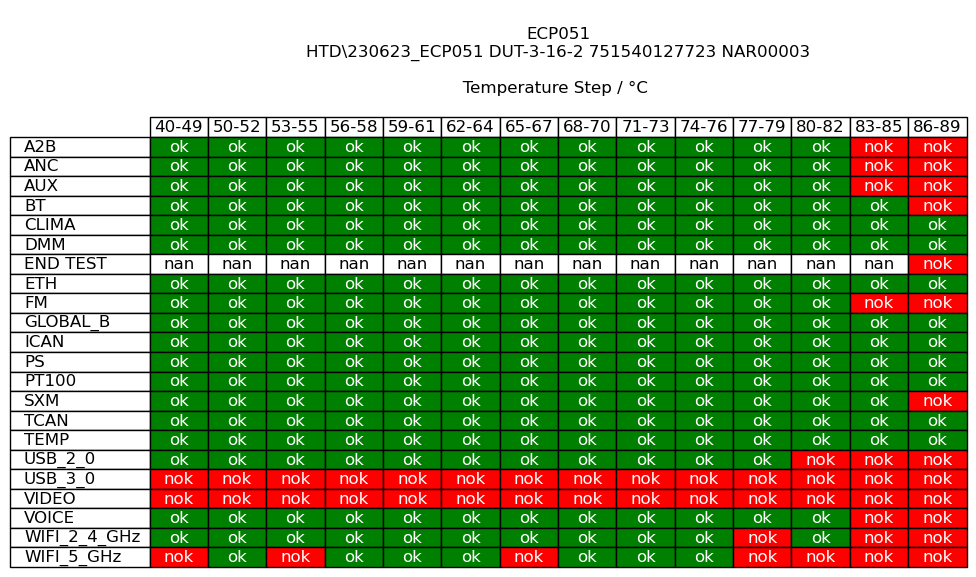

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the Excel sheet into a DataFrame
df = pd.read_excel('analog_data.xlsx')

# Define the temperature ranges
temperature_ranges = [(40, 50), (50, 53), (53, 56), (56, 59), (59, 62), (62, 65),
                      (65, 68), (68, 71), (71, 74), (74, 77), (77, 80), (80, 83),
                      (83, 86), (86, 90)]

# Create a new column for temperature range
df['TemperatureRange'] = pd.cut(df['temp'], bins=[start-1 for start, _ in temperature_ranges] + [temperature_ranges[-1][-1]], 
                                labels=[f'{start}-{end-1}' for start, end in temperature_ranges])

# Pivot the DataFrame to get the desired structure
result_df = df.pivot_table(index='Legend', columns='TemperatureRange', 
                           values='StepStatus', aggfunc=lambda x: 'nok' if (x == 0).any() else 'ok')

# Set the titles
title1 = 'ECP051'
title2 = 'HTD\\230623_ECP051 DUT-3-16-2 751540127723 NAR00003'
title3 = 'Temperature Step / °C'

# Remove the legend column name
result_df.columns.name = None

# Remove the temperature ranges column name
result_df.index.name = None

# Define a colormap for colors
cmap = ListedColormap(['green', 'red'])

# Plot the DataFrame with colors
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table = ax.table(cellText=result_df.values, colLabels=result_df.columns, rowLabels=result_df.index, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)
table.auto_set_column_width([0] + list(range(1, len(result_df.columns) + 1)))
for i, key in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    if cell.get_text().get_text() == 'nok':
        cell.set_facecolor('red')
        cell.get_text().set_color('white')
    elif cell.get_text().get_text() == 'ok':
        cell.set_facecolor('green')
        cell.get_text().set_color('white')
plt.title(f'\n{title1}\n{title2}\n\n{title3.center(len(result_df.columns) * 6)}', pad=50)
plt.tight_layout()
plt.show()


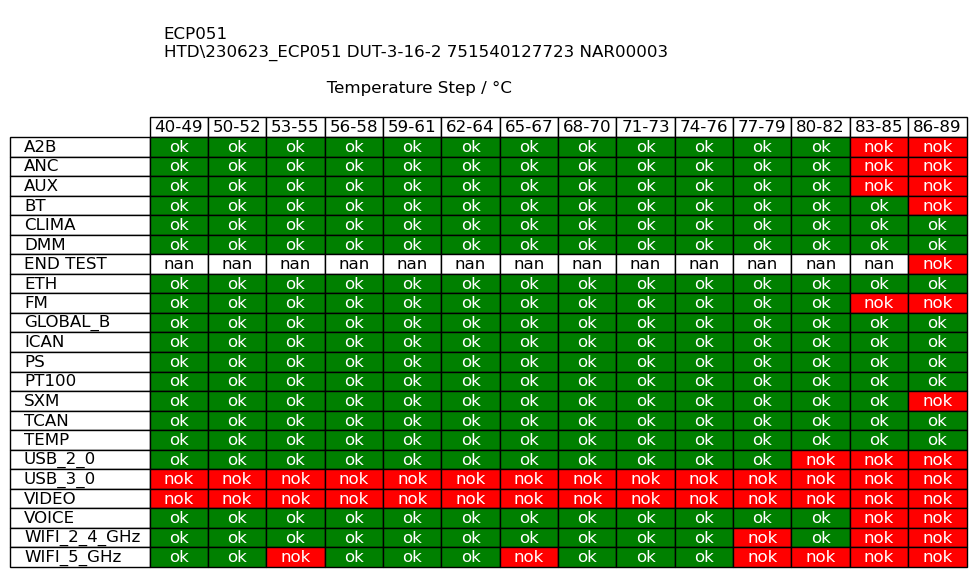

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the Excel sheet into a DataFrame
df = pd.read_excel('work.xlsx')

# Define the temperature ranges
temperature_ranges = [(40, 50), (50, 53), (53, 56), (56, 59), (59, 62), (62, 65),
                      (65, 68), (68, 71), (71, 74), (74, 77), (77, 80), (80, 83),
                      (83, 86), (86, 90)]

# Create a new column for temperature range
df['TemperatureRange'] = pd.cut(df['temp'], bins=[start-1 for start, _ in temperature_ranges] + [temperature_ranges[-1][-1]], 
                                labels=[f'{start}-{end-1}' for start, end in temperature_ranges])

# Pivot the DataFrame to get the desired structure
result_df = df.pivot_table(index='Legend', columns='TemperatureRange', 
                           values='StepStatus', aggfunc=lambda x: '-' if pd.isnull(x).all() else 'nok' if (x == 0).any() else 'ok')

# Set the titles
title1 = 'ECP051'
title2 = 'HTD\\230623_ECP051 DUT-3-16-2 751540127723 NAR00003'
title3 = 'Temperature Step / °C'

# Remove the legend column name
result_df.columns.name = None

# Remove the temperature ranges column name
result_df.index.name = None

# Define a colormap for colors
cmap = ListedColormap(['green', 'red'])

# Plot the DataFrame with colors
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table = ax.table(cellText=result_df.values, colLabels=result_df.columns, rowLabels=result_df.index, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)
table.auto_set_column_width([0] + list(range(1, len(result_df.columns) + 1)))
for i, key in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    if cell.get_text().get_text() == 'nok':
        cell.set_facecolor('red')
        cell.get_text().set_color('white')
    elif cell.get_text().get_text() == 'ok':
        cell.set_facecolor('green')
        cell.get_text().set_color('white')
    elif cell.get_text().get_text() == '-':
        cell.set_facecolor('lightgrey')
plt.gca().set_title(f'\n{title1}\n{title2}\n\n{title3.center(len(result_df.columns) * 6)}', pad=50, loc='left')
plt.tight_layout()
plt.show()


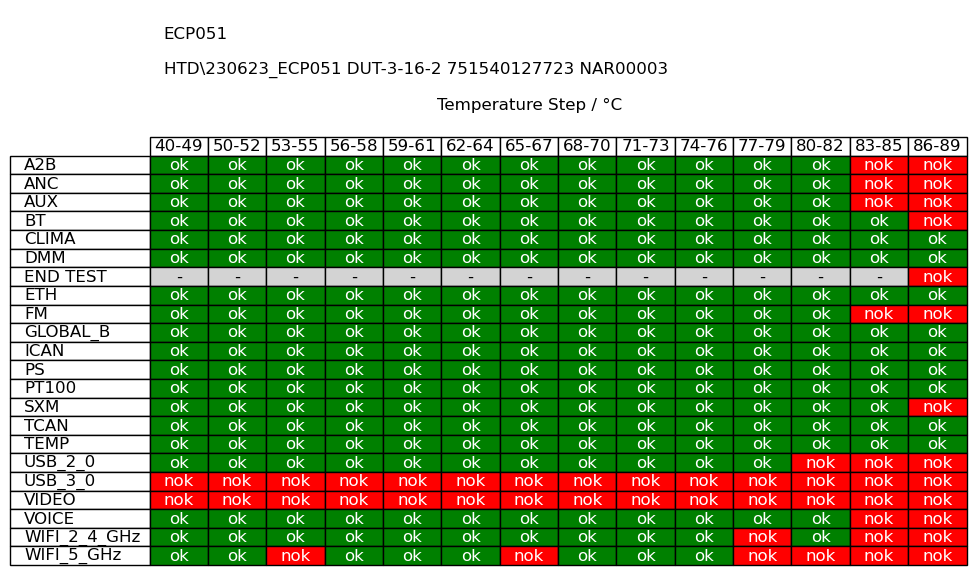

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the Excel sheet into a DataFrame
df = pd.read_excel('work.xlsx')

# Define the temperature ranges
temperature_ranges = [(40, 50), (50, 53), (53, 56), (56, 59), (59, 62), (62, 65),
                      (65, 68), (68, 71), (71, 74), (74, 77), (77, 80), (80, 83),
                      (83, 86), (86, 90)]

# Create a new column for temperature range
df['TemperatureRange'] = pd.cut(df['temp'], bins=[start-1 for start, _ in temperature_ranges] + [temperature_ranges[-1][-1]], 
                                labels=[f'{start}-{end-1}' for start, end in temperature_ranges])

# Pivot the DataFrame to get the desired structure
result_df = df.pivot_table(index='Legend', columns='TemperatureRange', 
                           values='StepStatus', aggfunc=lambda x: 'nok' if (x == 0).any() else 'ok')

# Fill missing values with "-"
result_df = result_df.fillna('-')

# Set the titles
title1 = 'ECP051'
title2 = 'HTD\\230623_ECP051 DUT-3-16-2 751540127723 NAR00003'
title3 = 'Temperature Step / °C'

# Remove the legend column name
result_df.columns.name = None

# Remove the temperature ranges column name
result_df.index.name = None

# Define a colormap for colors
cmap = ListedColormap(['green', 'red'])

# Plot the DataFrame with colors
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table = ax.table(cellText=result_df.values, colLabels=result_df.columns, rowLabels=result_df.index, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)
table.auto_set_column_width([0] + list(range(1, len(result_df.columns) + 1)))
for i, key in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    if cell.get_text().get_text() == 'nok':
        cell.set_facecolor('red')
        cell.get_text().set_color('white')
    elif cell.get_text().get_text() == 'ok':
        cell.set_facecolor('green')
        cell.get_text().set_color('white')
    elif cell.get_text().get_text() == '-':
        cell.set_facecolor('lightgrey')
plt.gca().set_title(f'\n{title1}\n\n{title2}\n\n{title3.center(len(result_df.columns) * 9)}', pad=50, loc='left')
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd

# Load the Excel sheet into a DataFrame
df = pd.read_excel('work.xlsx')

# Define the temperature ranges
temperature_ranges = [(0,48),(40, 50), (50, 53), (53, 56), (56, 59), (59, 62), (62, 65),
                      (65, 68), (68, 71), (71, 74), (74, 77), (77, 80), (80, 83),
                      (83, 86), (86, 90)]

# Create a new column for temperature range
df['TemperatureRange'] = pd.cut(df['temp'], bins=[start-1 for start, _ in temperature_ranges] + [temperature_ranges[-1][-1]], 
                                labels=[f'{start}-{end-1}' for start, end in temperature_ranges])

print(df)

               Timestamp      Legend  StepStatus  temp  volt  curr  \
0      230623.074547.141         A2B           1    23  14.0  1.68   
1      230623.074948.528         A2B           1    23  14.0  1.85   
2      230623.075314.021         A2B           1    24  14.0  1.74   
3      230623.075701.521         A2B           1    24  14.0  1.87   
4      230623.080030.328         A2B           1    24  14.0  1.94   
...                  ...         ...         ...   ...   ...   ...   
29345  230624.041847.935  WIFI_5_GHz           1    87  14.0  1.96   
29346  230624.042546.637  WIFI_5_GHz           1    87  14.0  1.89   
29347  230624.043250.513  WIFI_5_GHz           1    87  14.0  1.94   
29348  230624.044800.921  WIFI_5_GHz           0    87  14.0  1.85   
29349  230624.050810.347  WIFI_5_GHz           0    87  14.0  1.86   

      TemperatureRange  
0                 0-47  
1                 0-47  
2                 0-47  
3                 0-47  
4                 0-47  
...      

In [7]:
bins = [39,49,52,55,58,61,64,67,70,73,76,79,82,85]+[53,56,59,62,65,68,71,74,77,80,83,86,90]
print(bins)

[39, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 53, 56, 59, 62, 65, 68, 71, 74, 77, 80, 83, 86, 90]


In [8]:
import pandas as pd

# Read the Excel file into a DataFrame
df = pd.read_excel('work.xlsx')

# Sort the DataFrame by the Timestamp column in ascending order
df = df.sort_values('Timestamp')

# Round the values in the temp column to zero decimal places
df['temp'] = df['temp'].round(0).astype(int)

# Print the modified DataFrame
print(df)


               Timestamp      Legend  StepStatus  temp  volt  curr
0      230623.074106.284         A2B           1    23  14.0  1.68
1      230623.074109.407         A2B           1    24  14.0  1.85
2      230623.074113.281         A2B           1    24  14.0  1.74
3      230623.074117.211         A2B           1    24  14.0  1.87
4      230623.074121.042         A2B           1    24  14.0  1.94
...                  ...         ...         ...   ...   ...   ...
29345  230624.051850.804  WIFI_5_GHz           1    87  14.0  1.96
29346  230624.051852.510  WIFI_5_GHz           1    87  14.0  1.89
29347  230624.051855.272  WIFI_5_GHz           1    87  14.0  1.94
29348  230624.051856.791  WIFI_5_GHz           0    87  14.0  1.85
29349  230624.052100.686  WIFI_5_GHz           0    87  14.0  1.86

[29350 rows x 6 columns]


In [20]:
import pandas as pd

# Read the Excel file into a DataFrame
df = pd.read_excel('work.xlsx')

# Sort the DataFrame by the Timestamp column in ascending order
df = df.sort_values('Timestamp')

# Round the values in the temp column to zero decimal places and convert to integers
df['temp'] = df['temp'].round(0).astype(int)

# Get unique values from the temp column and store them in a list
unique_temp_values = df['temp'].unique().tolist()

# Print the list of unique temp values
print(unique_temp_values)

# Calculate differences between consecutive values in the unique_temp_values list
differences = []
for i in range(len(unique_temp_values) - 1):
    diff = unique_temp_values[i+1] - unique_temp_values[i]
    differences.append(diff)

# Print the list of differences
print(differences)



[23, 24, 27, 31, 34, 36, 37, 38, 39, 41, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 26, 45, 29, 33, 35, 40, 42, 25, 30, 32, 43]
[1, 3, 4, 3, 2, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -61, 19, -16, 4, 2, 5, 2, -17, 5, 2, 11]


In [24]:
import pandas as pd

# Read the Excel file into a DataFrame
df = pd.read_excel('work.xlsx')

# Sort the DataFrame by the Timestamp column in ascending order
df = df.sort_values('Timestamp')

# Round the values in the temp column to zero decimal places and convert to integers
df['temp'] = df['temp'].round(0).astype(int)

# Initialize variables
first_recurring_values = []

# Iterate over the temp column values
for value in df['temp']:
    # Check if the value is not the same as the previous value
    if len(first_recurring_values) == 0 or value != first_recurring_values[-1]:
        first_recurring_values.append(value)

# Print the list of first recurring values
print(first_recurring_values)


               Timestamp      Legend  StepStatus  temp  volt  curr
0      230623.074106.284         A2B           1    23  14.0  1.68
1      230623.074109.407         A2B           1    24  14.0  1.85
2      230623.074113.281         A2B           1    24  14.0  1.74
3      230623.074117.211         A2B           1    24  14.0  1.87
4      230623.074121.042         A2B           1    24  14.0  1.94
...                  ...         ...         ...   ...   ...   ...
29345  230624.051850.804  WIFI_5_GHz           1    87  14.0  1.96
29346  230624.051852.510  WIFI_5_GHz           1    87  14.0  1.89
29347  230624.051855.272  WIFI_5_GHz           1    87  14.0  1.94
29348  230624.051856.791  WIFI_5_GHz           0    87  14.0  1.85
29349  230624.052100.686  WIFI_5_GHz           0    87  14.0  1.86

[29350 rows x 6 columns]

[23, 24, 27, 31, 34, 36, 37, 38, 39, 41, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 

In [31]:
import pandas as pd

# Read the Excel file into a DataFrame
df = pd.read_excel('work.xlsx')

# Sort the DataFrame by the Timestamp column in ascending order
df = df.sort_values('Timestamp')

# Round the values in the temp column to zero decimal places and convert to integers
df['temp'] = df['temp'].round(0).astype(int)

# Initialize variables
first_recurring_values = []

# Iterate over the temp column values
for value in df['temp']:
    # Check if the value is not the same as the previous value
    if len(first_recurring_values) == 0 or value != first_recurring_values[-1]:
        first_recurring_values.append(value)

# Calculate differences between consecutive values in the first_recurring_values list
differences = []
for i in range(len(first_recurring_values) - 1):
    diff = first_recurring_values[i+1] - first_recurring_values[i]
    differences.append(abs(diff))

# Print the list of first recurring values
print(first_recurring_values)

# Print the list of differences
print(differences)


[23, 24, 27, 31, 34, 36, 37, 38, 39, 41, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 23, 24, 26, 31, 34, 36, 37, 38, 39, 41, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 24, 23, 24, 29, 33, 35, 36, 37, 38, 39, 40, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 24, 23, 24, 25, 29, 33, 35, 36, 37, 38, 39, 41, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 25, 24, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 51,

In [34]:
import pandas as pd

# Read the Excel file into a DataFrame
df = pd.read_excel('work.xlsx')

# Sort the DataFrame by the Timestamp column in ascending order
df = df.sort_values('Timestamp')

# Round the values in the temp column to zero decimal places and convert to integers
df['temp'] = df['temp'].round(0).astype(int)

# Initialize variables
first_recurring_values = []
value_counts = {}

# Iterate over the temp column values
for value in df['temp']:
    # Check if the value is not the same as the previous value
    if len(first_recurring_values) == 0 or value != first_recurring_values[-1]:
        first_recurring_values.append(value)
        value_counts[value] = 1
    else:
        value_counts[value] += 1

# Calculate differences between consecutive values in the first_recurring_values list
differences = []
for i in range(len(first_recurring_values) - 1):
    diff = first_recurring_values[i+1] - first_recurring_values[i]
    differences.append(abs(diff))

# Print the list of first recurring values
print(first_recurring_values)

# Print the list of differences
print(differences)

# Print the list of value counts
counts = [value_counts[value] for value in first_recurring_values]
print(counts)


[23, 24, 27, 31, 34, 36, 37, 38, 39, 41, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 23, 24, 26, 31, 34, 36, 37, 38, 39, 41, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 24, 23, 24, 29, 33, 35, 36, 37, 38, 39, 40, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 24, 23, 24, 25, 29, 33, 35, 36, 37, 38, 39, 41, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 25, 24, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 51,

In [35]:
import pandas as pd

# Read the Excel file into a DataFrame
df = pd.read_excel('work.xlsx')

# Round the values in the temp column to zero decimal places and convert to integers
df['temp'] = df['temp'].round(0).astype(int)

# Identify the break points
break_points = df['temp'].diff().fillna(0).ne(0).cumsum()

# Group the consecutive values into ranges and create tuples
ranges = []
for _, group in df.groupby(break_points):
    if len(group) > 1:
        range_tuple = (group['temp'].min(), group['temp'].max())
        ranges.append(range_tuple)

# Print the ranges as tuples
for range_tuple in ranges:
    print(range_tuple)


(24, 24)
(38, 38)
(39, 39)
(47, 47)
(48, 48)
(49, 49)
(51, 51)
(52, 52)
(53, 53)
(54, 54)
(56, 56)
(57, 57)
(58, 58)
(59, 59)
(60, 60)
(62, 62)
(63, 63)
(64, 64)
(66, 66)
(67, 67)
(68, 68)
(69, 69)
(70, 70)
(71, 71)
(72, 72)
(74, 74)
(75, 75)
(76, 76)
(77, 77)
(78, 78)
(80, 80)
(81, 81)
(82, 82)
(83, 83)
(84, 84)
(86, 86)
(87, 87)
(23, 23)
(24, 24)
(38, 38)
(39, 39)
(47, 47)
(48, 48)
(49, 49)
(50, 50)
(51, 51)
(52, 52)
(53, 53)
(54, 54)
(56, 56)
(57, 57)
(58, 58)
(59, 59)
(60, 60)
(62, 62)
(63, 63)
(64, 64)
(65, 65)
(66, 66)
(67, 67)
(69, 69)
(70, 70)
(71, 71)
(72, 72)
(74, 74)
(75, 75)
(76, 76)
(77, 77)
(78, 78)
(80, 80)
(81, 81)
(82, 82)
(83, 83)
(84, 84)
(85, 85)
(86, 86)
(87, 87)
(23, 23)
(24, 24)
(38, 38)
(39, 39)
(47, 47)
(48, 48)
(49, 49)
(50, 50)
(51, 51)
(52, 52)
(54, 54)
(56, 56)
(57, 57)
(59, 59)
(60, 60)
(62, 62)
(63, 63)
(64, 64)
(66, 66)
(67, 67)
(68, 68)
(69, 69)
(71, 71)
(72, 72)
(73, 73)
(74, 74)
(75, 75)
(77, 77)
(78, 78)
(79, 79)
(80, 80)
(81, 81)
(82, 82)
(83, 83)
(

In [3]:


import pandas as pd

# Read the Excel file into a DataFrame
df = pd.read_excel('work.xlsx')


# Sort the DataFrame by the Timestamp column in ascending order
df = df.sort_values('Timestamp')

# Round the values in the temp column to zero decimal places and convert to integers
df['temp'] = df['temp'].round(0).astype(int)

# Extract the 'temp' column values as a list
values = df['temp'].tolist()



# Initialize variables
repeating_counts = []
current_count = 1

# Iterate over the values starting from the second element
for i in range(1, len(values)):
    # Check if the current value is the same as the previous value
    if values[i] == values[i-1]:
        current_count += 1
    else:
        repeating_counts.append(current_count)
        current_count = 1

# Append the count of the last repeating sequence
repeating_counts.append(current_count)

# Print the list of repeating counts
print(repeating_counts)


[1, 4, 1, 1, 1, 1, 1, 4, 14, 1, 1, 1, 2, 7, 12, 1, 11, 11, 2, 20, 1, 2, 20, 2, 2, 19, 1, 2, 5, 16, 1, 10, 12, 2, 20, 2, 2, 20, 1, 3, 19, 2, 3, 18, 1, 7, 14, 2, 10, 10, 1, 3, 8, 3, 2, 1, 1, 1, 1, 1, 4, 14, 1, 1, 1, 1, 2, 6, 12, 2, 11, 10, 2, 20, 1, 2, 20, 2, 2, 19, 1, 2, 5, 16, 2, 9, 13, 1, 20, 2, 2, 20, 1, 3, 19, 2, 3, 18, 1, 7, 14, 2, 9, 11, 2, 2, 8, 1, 2, 3, 1, 1, 1, 1, 1, 3, 14, 1, 1, 1, 1, 2, 7, 11, 2, 12, 10, 1, 21, 1, 2, 20, 1, 2, 20, 1, 2, 5, 16, 1, 10, 12, 2, 20, 1, 3, 19, 2, 2, 20, 1, 4, 17, 2, 6, 15, 2, 9, 11, 1, 2, 8, 1, 3, 2, 1, 1, 1, 1, 1, 1, 4, 16, 1, 1, 1, 1, 2, 7, 13, 1, 13, 11, 2, 23, 1, 2, 22, 1, 3, 21, 2, 1, 6, 18, 2, 10, 13, 2, 22, 2, 3, 21, 1, 3, 22, 1, 4, 20, 2, 7, 16, 1, 12, 11, 2, 2, 12, 1, 54, 120, 133, 11, 15, 15, 15, 15, 15, 15, 14, 31, 29, 45, 75, 195, 766, 15, 30, 14, 16, 30, 31, 60, 105, 364, 639, 89, 610, 14, 15, 533, 88, 1119, 74, 85, 1103, 71, 119, 1073, 61, 90, 280, 881, 72, 536, 669, 85, 1099, 74, 131, 1084, 62, 149, 1068, 72, 193, 994, 91, 355, 818, 

In [5]:
import pandas as pd

# Read the Excel file into a DataFrame
df = pd.read_excel('work.xlsx')

# Sort the DataFrame by the Timestamp column in ascending order
df = df.sort_values('Timestamp')

# Round the values in the temp column to zero decimal places and convert to integers
df['temp'] = df['temp'].round(0).astype(int)

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

# Initialize variables
first_recurring_values = []

# Iterate over the filtered temp column values
for value in filtered_df['temp']:
    # Check if the value is not the same as the previous value
    if len(first_recurring_values) == 0 or value != first_recurring_values[-1]:
        first_recurring_values.append(value)

# Calculate differences between consecutive values in the first_recurring_values list
differences = []
for i in range(len(first_recurring_values) - 1):
    diff = first_recurring_values[i+1] - first_recurring_values[i]
    differences.append(abs(diff))

# Print the list of first recurring values
print(first_recurring_values)

# Print the list of differences
print(differences)


[23, 24, 27, 31, 34, 36, 37, 38, 39, 41, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87]
[1, 3, 4, 3, 2, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [17]:
import pandas as pd

# Read the Excel file into a DataFrame
df = pd.read_excel('work.xlsx')

# Sort the DataFrame by the Timestamp column in ascending order
df = df.sort_values('Timestamp')

# Round the values in the temp column to zero decimal places and convert to integers
df['temp'] = df['temp'].round(0).astype(int)

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

# Initialize variables
first_recurring_values = filtered_df['temp'].tolist()
differences = [first_recurring_values[i+1] - first_recurring_values[i] for i in range(len(first_recurring_values)-1)]

# Create list of tuple pairs based on the differences
tuple_pairs = []
start_position = None

for i in range(len(differences)):
    if differences[i] == 1:
        if start_position is None:
            start_position = i
    elif start_position is not None:
        tuple_pairs.append((first_recurring_values[start_position], first_recurring_values[i]))
        start_position = None

# Add the last tuple pair if applicable
if start_position is not None and start_position < len(first_recurring_values) - 1:
    tuple_pairs.append((first_recurring_values[start_position], first_recurring_values[-1]))

# Print the list of tuple pairs
print(tuple_pairs)


[(23, 24), (36, 38), (38, 39), (46, 47), (47, 48), (48, 49), (49, 51), (51, 52), (52, 53), (53, 54), (54, 56), (56, 57), (57, 58), (58, 59), (59, 60), (60, 62), (62, 63), (63, 64), (64, 66), (66, 67), (67, 68), (68, 69), (69, 70), (70, 71), (71, 72), (72, 74), (74, 75), (75, 76), (76, 77), (77, 78), (78, 80), (80, 81), (81, 82), (82, 83), (83, 84), (84, 86), (86, 87)]


In [32]:
import pandas as pd

# Read the Excel file into a DataFrame
df = pd.read_excel('work.xlsx')

# Sort the DataFrame by the Timestamp column in ascending order
df = df.sort_values('Timestamp')

# Round the values in the temp column to zero decimal places and convert to integers
df['temp'] = df['temp'].round(0).astype(int)

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

# Initialize variables
first_recurring_values = []

# Iterate over the filtered temp column values
for value in filtered_df['temp']:
    # Check if the value is not the same as the previous value
    if len(first_recurring_values) == 0 or value != first_recurring_values[-1]:
        first_recurring_values.append(value)

# Calculate differences between consecutive values in the first_recurring_values list
differences = []
for i in range(len(first_recurring_values) - 1):
    diff = first_recurring_values[i+1] - first_recurring_values[i]
    differences.append(abs(diff))

# Print the list of first recurring values
print(first_recurring_values)

# Print the list of differences
print(differences)


def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if lst[i + 1] - lst[i] == 1:
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                result.append((start, lst[i]))
                start = None
    if start is not None:
        result.append((start, lst[-1]))
    return result

# Example usage:

pairs = create_tuple_pairs(first_recurring_values)
print(pairs)




[23, 24, 27, 31, 34, 36, 37, 38, 39, 41, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87]
[1, 3, 4, 3, 2, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[(23, 24), (36, 39), (46, 87)]


In [1]:
def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if lst[i + 1] - lst[i] == 1:
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                result.append((start, lst[i]))
                start = None
    if start is not None:
        result.append((start, lst[-1]))
    return result

# Example usage:
nums = [23, 24, 27, 31, 34, 36, 37, 38, 39, 41, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 85, 86, 87,88,40,41,42,43,-15,20,21,20]
pairs = create_tuple_pairs(nums)
print(pairs)


[(23, 24), (36, 39), (46, 81), (85, 88), (40, 43), (20, 21)]


In [14]:
def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        diff = lst[i+1] - lst[i]
        if diff == 1 or diff == -1:  # Check for both positive and negative one difference
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                result.append((start, lst[i]))
                start = None
    if start is not None:
        result.append((start, lst[-1]))
    return result

nums1=[19, 18, 17, 16, 17, 19]
pairs = create_tuple_pairs(nums1)
print(pairs)

[(19, 17)]


[23, 24, 27, 31, 34, 36, 37, 38, 39, 41, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87]

[1, 3, 4, 3, 2, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

[(23, 24), (36, 39), (46, 87)]



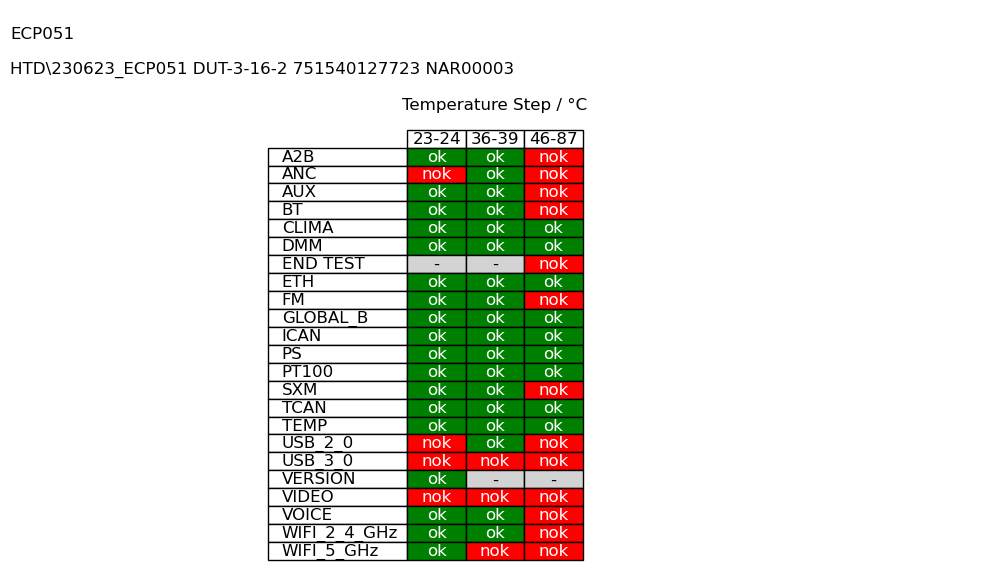

In [36]:
import pandas as pd

# Read the Excel file into a DataFrame
df = pd.read_excel('work.xlsx')

# Sort the DataFrame by the Timestamp column in ascending order
df = df.sort_values('Timestamp')

# Round the values in the temp column to zero decimal places and convert to integers
df['temp'] = df['temp'].round(0).astype(int)

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

# Initialize variables
first_recurring_values = []

# Iterate over the filtered temp column values
for value in filtered_df['temp']:
    # Check if the value is not the same as the previous value
    if len(first_recurring_values) == 0 or value != first_recurring_values[-1]:
        first_recurring_values.append(value)

# Calculate differences between consecutive values in the first_recurring_values list
differences = []
for i in range(len(first_recurring_values) - 1):
    diff = first_recurring_values[i+1] - first_recurring_values[i]
    differences.append(abs(diff))

# Print the list of first recurring values
print(first_recurring_values)
print()
# Print the list of differences
print(differences)
print()

def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if lst[i + 1] - lst[i] == 1:
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                result.append((start, lst[i]))
                start = None
    if start is not None:
        result.append((start, lst[-1]))
    return result

# Example usage:

pairs = create_tuple_pairs(first_recurring_values)
print(pairs)


print()

#----------------------------------------------------------------------------------------------------------------------------#



import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Create a new column for temperature range
df['TemperatureRange'] = pd.cut(df['temp'], bins=[start-1 for start, _ in pairs] + [pairs[-1][-1]], 
                                labels=[f'{start}-{end}' for start, end in pairs])

# Pivot the DataFrame to get the desired structure
result_df = df.pivot_table(index='Legend', columns='TemperatureRange', 
                           values='StepStatus', aggfunc=lambda x: 'nok' if (x == 0).any() else 'ok')

# Fill missing values with "-"
result_df = result_df.fillna('-')

# Set the titles
title1 = 'ECP051'
title2 = 'HTD\\230623_ECP051 DUT-3-16-2 751540127723 NAR00003'
title3 = 'Temperature Step / °C'

# Remove the legend column name
result_df.columns.name = None

# Remove the temperature ranges column name
result_df.index.name = None

# Define a colormap for colors
cmap = ListedColormap(['green', 'red'])

# Plot the DataFrame with colors
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table = ax.table(cellText=result_df.values, colLabels=result_df.columns, rowLabels=result_df.index, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)
table.auto_set_column_width([0] + list(range(1, len(result_df.columns) + 1)))
for i, key in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    if cell.get_text().get_text() == 'nok':
        cell.set_facecolor('red')
        cell.get_text().set_color('white')
    elif cell.get_text().get_text() == 'ok':
        cell.set_facecolor('green')
        cell.get_text().set_color('white')
    elif cell.get_text().get_text() == '-':
        cell.set_facecolor('lightgrey')
plt.gca().set_title(f'\n{title1}\n\n{title2}\n\n', pad=50, loc='left')
plt.gca().set_title(f'\n\n{title3}', pad=50, loc='center')
plt.tight_layout()
plt.show()




In [5]:
def sort_tuples(list_of_tuples, index):
    # Sort the list of tuples based on the element at the specified index
    sorted_list = sorted(list_of_tuples, key=lambda x: x[index])
    return sorted_list

# Example usage
my_list = [(4, 9), (2, 7), (1, 5), (3, 8),(1,1),(7,2)]
sorted_list = sort_tuples(my_list, 1)
print(sorted_list)


[(1, 1), (7, 2), (1, 5), (2, 7), (3, 8), (4, 9)]


In [8]:
my_list = [(4, 9), (2, 7), (1, 5), (3, 8), (1, 1), (7, 2)]

# Iterate over the list and swap the elements if the first value is greater than the second value
updated_list = [(b, a) if a > b else (a, b) for a, b in my_list]

# Print the updated list
print(updated_list)

my_list = [(4, 9), (2, 7), (1, 5), (3, 8), (1, 1), (2, 7)]

# Convert the list to a set to remove duplicates, and then convert it back to a list
unique_list = list(set(my_list))

# Print the unique list
print(unique_list)

def sort_tuples(list_of_tuples, index):
    # Sort the list of tuples based on the element at the specified index
    sorted_list = sorted(list_of_tuples, key=lambda x: x[index])
    return sorted_list

sorted_list = sort_tuples(unique_list, 1)
print(sorted_list)


[(4, 9), (2, 7), (1, 5), (3, 8), (1, 1), (2, 7)]
[(3, 8), (2, 7), (1, 5), (4, 9), (1, 1)]
[(1, 1), (1, 5), (2, 7), (3, 8), (4, 9)]


[23.44, 23.54, 26.95, 30.96, 34.18, 35.94, 37.01, 37.5, 37.99, 38.28, 38.48, 38.57, 38.77, 38.87, 38.96, 39.06, 39.16, 39.26, 41.31, 44.24, 45.51, 46.58, 47.17, 47.66, 47.95, 48.14, 48.24, 48.34, 48.44, 48.54, 48.63, 49.32, 50.0, 50.59, 50.88, 51.07, 51.27, 51.37, 51.46, 51.56, 52.05, 52.93, 53.32, 53.71, 54.0, 54.1, 54.2, 54.3, 54.39, 54.49, 54.79, 55.66, 56.35, 56.64, 56.84, 56.93, 57.03, 57.13, 57.23, 57.32, 57.42, 57.71, 58.4, 59.08, 59.47, 59.77, 59.86, 59.96, 60.06, 60.16, 60.25, 60.74, 61.82, 62.3, 62.79, 63.09, 63.28, 63.48, 63.57, 63.67, 63.77, 64.16, 65.04, 65.53, 65.82, 66.02, 66.21, 66.31, 66.41, 66.5, 66.6, 66.8, 67.68, 68.16, 68.65, 68.85, 68.95, 69.14, 69.24, 69.34, 69.43, 69.63, 70.31, 71.0, 71.29, 71.58, 71.78, 71.88, 71.97, 72.07, 72.17, 72.27, 72.36, 73.14, 73.83, 74.12, 74.41, 74.61, 74.71, 74.8, 74.9, 75.0, 75.1, 75.2, 75.78, 76.46, 76.95, 77.25, 77.44, 77.54, 77.64, 77.73, 77.83, 78.42, 79.0, 79.59, 79.98, 80.18, 80.27, 80.47, 80.57, 80.66, 80.76, 81.05, 81.64, 82

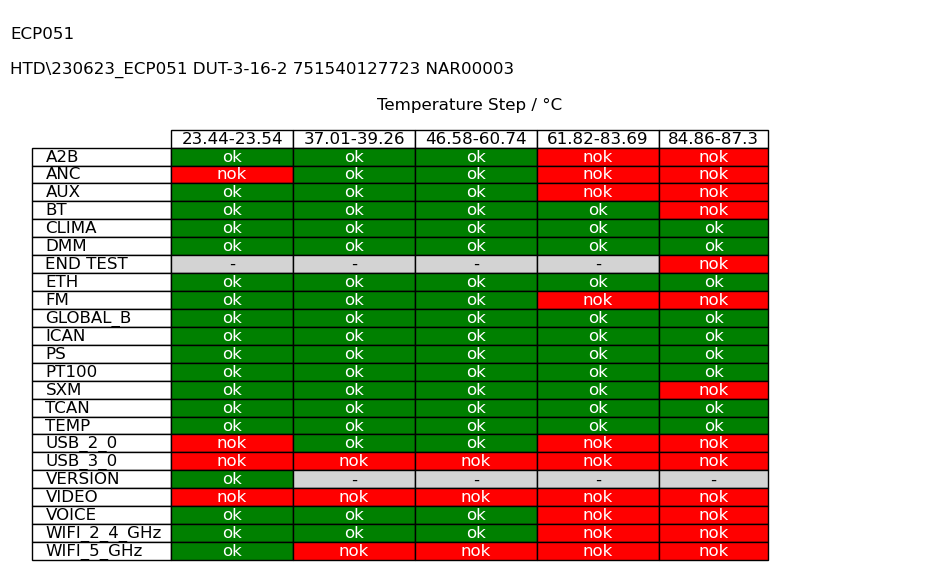

In [3]:
import pandas as pd

# Read the Excel file into a DataFrame
df = pd.read_excel('analog_data.xlsx')

# # Sort the DataFrame by the Timestamp column in ascending order
# df = df.sort_values('Timestamp')

# # Round the values in the temp column to zero decimal places and convert to integers
# df['temp'] = df['temp'].round(0).astype(int)

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

# Initialize variables
first_recurring_values = []

# Iterate over the filtered temp column values
for value in filtered_df['temp']:
    # Check if the value is not the same as the previous value
    if len(first_recurring_values) == 0 or value != first_recurring_values[-1]:
        first_recurring_values.append(value)

# Calculate differences between consecutive values in the first_recurring_values list
differences = []
for i in range(len(first_recurring_values) - 1):
    diff = first_recurring_values[i+1] - first_recurring_values[i]
    differences.append(abs(diff))

# Print the list of first recurring values
print(first_recurring_values)
print()
# Print the list of differences
print(differences)
print()

def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if lst[i + 1] - lst[i] <= 1:
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                result.append((start, lst[i]))
                start = None
    if start is not None:
        result.append((start, lst[-1]))

    return result


# Example usage:

pairs = create_tuple_pairs(first_recurring_values)
print(pairs)

# Find missing values between tuple pairs
missing_values = []
for i in range(len(pairs) - 1):
    start = int(pairs[i][1]) + 1
    end = int(pairs[i+1][0]) - 1
    if end >= start:
        missing_values.extend(range(start, end+1))

# Remove values from missing_values list that are not present in first_recurring_values
missing_values = [value for value in missing_values if value in first_recurring_values]

print("Missing values between tuple pairs:", missing_values)

# Check if missing values occur more than 10 times in filtered_df[temp] column
missing_values_more_than_10 = [value for value in missing_values if filtered_df['temp'].value_counts().get(value, 0) > 10]

print("Missing values that occur more than 10 times:", missing_values_more_than_10)

# Include missing values more than 10 times as tuple pairs
for value in missing_values_more_than_10:
    pairs.append((value, value))

# Sort the tuple pairs
pairs.sort()

print("Updated tuple pairs:", pairs)

#----------------------------------------------------------------------------------------------------------------------------#



import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Create a new column for temperature range
df['TemperatureRange'] = pd.cut(df['temp'], bins=[start-1 for start, _ in pairs] + [pairs[-1][-1]], 
                                labels=[f'{start}-{end}' for start, end in pairs])

# Pivot the DataFrame to get the desired structure
result_df = df.pivot_table(index='Legend', columns='TemperatureRange', 
                           values='StepStatus', aggfunc=lambda x: 'nok' if (x == 0).any() else 'ok')

# Fill missing values with "-"
result_df = result_df.fillna('-')

# Set the titles
title1 = 'ECP051'
title2 = 'HTD\\230623_ECP051 DUT-3-16-2 751540127723 NAR00003'
title3 = 'Temperature Step / °C'

# Remove the legend column name
result_df.columns.name = None

# Remove the temperature ranges column name
result_df.index.name = None

# Define a colormap for colors
cmap = ListedColormap(['green', 'red'])

# Plot the DataFrame with colors
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table = ax.table(cellText=result_df.values, colLabels=result_df.columns, rowLabels=result_df.index, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)
table.auto_set_column_width([0] + list(range(1, len(result_df.columns) + 1)))
for i, key in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    if cell.get_text().get_text() == 'nok':
        cell.set_facecolor('red')
        cell.get_text().set_color('white')
    elif cell.get_text().get_text() == 'ok':
        cell.set_facecolor('green')
        cell.get_text().set_color('white')
    elif cell.get_text().get_text() == '-':
        cell.set_facecolor('lightgrey')
plt.gca().set_title(f'\n{title1}\n\n{title2}\n\n', pad=50, loc='left')
plt.gca().set_title(f'\n\n{title3}', pad=50, loc='center')
plt.tight_layout()
plt.show()



Normal order in graph:
 [(26.27, 23.54), (37.01, 39.45), (46.78, 48.93), (49.9, 52.05), (52.93, 54.59), (56.05, 57.71), (59.08, 60.74), (62.5, 63.87), (65.33, 66.99), (67.87, 70.02), (70.9, 72.36), (73.14, 75.29), (76.17, 78.03), (78.91, 80.86), (81.64, 83.59), (86.13, 87.21)]

Sorted Order for Visualizing range:
 [(23.54, 26.27), (37.01, 39.45), (46.78, 48.93), (49.9, 52.05), (52.93, 54.59), (56.05, 57.71), (59.08, 60.74), (62.5, 63.87), (65.33, 66.99), (67.87, 70.02), (70.9, 72.36), (73.14, 75.29), (76.17, 78.03), (78.91, 80.86), (81.64, 83.59), (86.13, 87.21)]



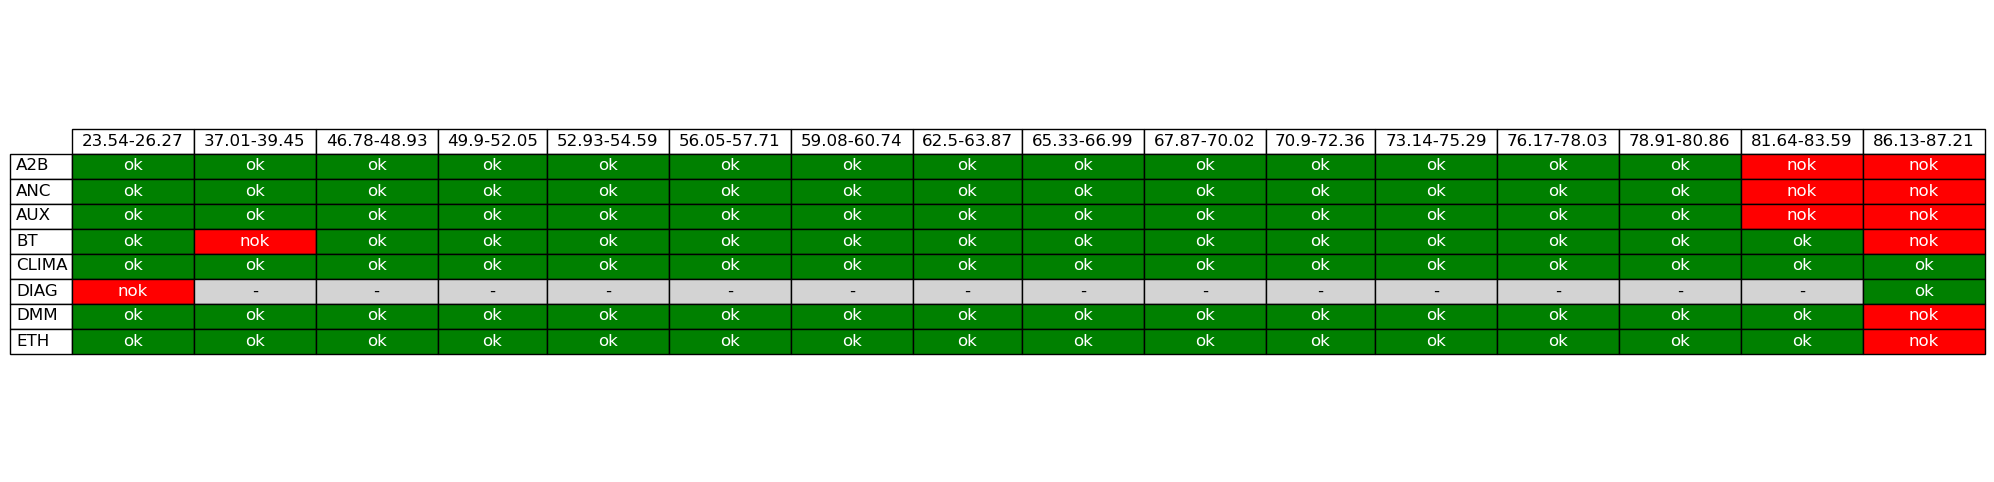

In [6]:
import pandas as pd

df = pd.read_excel('A2B.xlsx')

# print(df.head())

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

# Initialize variables
first_recurring_values = []

# Iterate over the filtered temp column values
for value in filtered_df['Temp']:
    # Check if the value is not the same as the previous value
    if len(first_recurring_values) == 0 or value != first_recurring_values[-1]:
        first_recurring_values.append(value)

# print(first_recurring_values)
print() 

def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if (lst[i + 1] - lst[i] < 0.6) or (lst[i + 1] - lst[i] <= 0 and lst[i + 1] - lst[i] > -0.6):
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                result.append((start, lst[i]))
                start = None
    if start is not None:
        result.append((start, lst[-1]))

    return result


pairs = create_tuple_pairs(first_recurring_values)
print("Normal order in graph:\n",pairs)
print()

# Iterate over the list and swap the elements if the first value is greater than the second value
updated_list = [(b, a) if a > b else (a, b) for a, b in pairs]

# Convert the list to a set to remove duplicates, and then convert it back to a list
unique_list = list(set(updated_list))

def sort_tuples(list_of_tuples, index):
    # Sort the list of tuples based on the element at the specified index
    sorted_list = sorted(list_of_tuples, key=lambda x: x[index])
    return sorted_list

sorted_list = sort_tuples(unique_list, 1)
print("Sorted Order for Visualizing range:\n",sorted_list)

print()

#---------------------------------------------------------------------------------------------------------------------------#

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Create a new column for temperature range
df['TemperatureRange'] = pd.cut(df['Temp'], bins=[start-1 for start, _ in sorted_list] + [sorted_list[-1][-1]], 
                                labels=[f'{start}-{end}' for start, end in sorted_list])

# Pivot the DataFrame to get the desired structure
result_df = df.pivot_table(index='Legend', columns='TemperatureRange', 
                           values='StepStatus', aggfunc=lambda x: 'nok' if (x == 0).any() else 'ok')

# Fill missing values with "-"
result_df = result_df.fillna('-')

# # Set the titles
# title1 = 'ECP051'
# title2 = 'HTD\\230623_ECP051 DUT-3-16-2 751540127723 NAR00003'
# title3 = 'Temperature Step / °C'

#  Remove the legend column name
result_df.columns.name = None

 # Remove the temperature ranges column name
result_df.index.name = None

# Define a colormap for colors
cmap = ListedColormap(['green', 'red'])

# Plot the DataFrame with colors
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table = ax.table(cellText=result_df.values, colLabels=result_df.columns, rowLabels=result_df.index, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)
table.auto_set_column_width([0] + list(range(1, len(result_df.columns) + 1)))
for i, key in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    if cell.get_text().get_text() == 'nok':
        cell.set_facecolor('red')
        cell.get_text().set_color('white')
    elif cell.get_text().get_text() == 'ok':
        cell.set_facecolor('green')
        cell.get_text().set_color('white')
    elif cell.get_text().get_text() == '-':
        cell.set_facecolor('lightgrey')
# plt.gca().set_title(f'\n{title1}\n\n{title2}\n\n', pad=50, loc='left')
# plt.gca().set_title(f'\n\n{title3}', pad=50, loc='center')
# plt.tight_layout()
# plt.show()



In [8]:
def filter_tuples(tuples_list):
    sorted_tuples = sorted(tuples_list)
    result = []
    max_value = float('-inf')
    
    for tuple_item in sorted_tuples:
        if tuple_item[0] > max_value:
            result.append(tuple_item)
            max_value = tuple_item[1]
        elif tuple_item[1] > max_value:
            result[-1] = (result[-1][0], tuple_item[1])
    
    return result

# Example usage
tuples_list = [(19, 24), (25, 29.8), (20, 21),(11,24),(20.7,33)]
filtered_tuples = filter_tuples(tuples_list)
print(filtered_tuples)


[(11, 33), (25, 29.8)]


In [14]:
def filter_tuples(tuples_list):
    sorted_tuples = sorted(tuples_list)
    result = []
    max_value = float('-inf')
    
    for tuple_item in sorted_tuples:
        if tuple_item[0] > max_value:
            result.append(tuple_item)
            max_value = tuple_item[1]
        elif tuple_item[1] > max_value:
            result[-1] = (result[-1][0], tuple_item[1])
            max_value = tuple_item[1]  # Update max_value to the new merged end value
    
    return result

# Example usage
tuples_list = [(19, 24),(10,34.5), (25, 29.8), (20, 21), (11, 24), (20.7, 33)]
filtered_tuples = filter_tuples(tuples_list)
print(filtered_tuples)


[(10, 34.5)]


In [2]:
import pandas as pd

df = pd.read_excel('ptc.xlsx')

# print(df.head())

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

# Initialize variables
first_recurring_values = []

# Iterate over the filtered temp column values
for value in filtered_df['Temp']:
    # Check if the value is not the same as the previous value
    if len(first_recurring_values) == 0 or value != first_recurring_values[-1]:
        first_recurring_values.append(value)

# print(first_recurring_values)
print() 

def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if (lst[i + 1] - lst[i] < 0.6) or (lst[i + 1] - lst[i] <= 0 and lst[i + 1] - lst[i] > -0.6):
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                result.append((start, lst[i]))
                start = None
    if start is not None:
        result.append((start, lst[-1]))

    return result


pairs = create_tuple_pairs(first_recurring_values)
print("Normal order in graph:\n",pairs)
print()

# Iterate over the list and swap the elements if the first value is greater than the second value
updated_list = [(b, a) if a > b else (a, b) for a, b in pairs]

# Convert the list to a set to remove duplicates, and then convert it back to a list
unique_list = list(set(updated_list))

def sort_tuples(list_of_tuples, index):
    # Sort the list of tuples based on the element at the specified index
    sorted_list = sorted(list_of_tuples, key=lambda x: x[index])
    return sorted_list

sorted_list = sort_tuples(unique_list, 1)
print("Sorted Order for Visualizing range:\n",sorted_list)

print()

#---------------------------------------------------------------------------------------------------------------------------#

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Create a new column for temperature range
df['TemperatureRange'] = pd.cut(df['Temp'], bins=[start-1 for start, _ in sorted_list] + [sorted_list[-1][-1]], 
                                labels=[f'{start}-{end}' for start, end in sorted_list])

# Pivot the DataFrame to get the desired structure
result_df = df.pivot_table(index='Legend', columns='TemperatureRange', 
                           values='StepStatus', aggfunc=lambda x: 'nok' if (x == 0).any() else 'ok')

# Fill missing values with "-"
result_df = result_df.fillna('-')

# # Set the titles
# title1 = 'ECP051'
# title2 = 'HTD\\230623_ECP051 DUT-3-16-2 751540127723 NAR00003'
# title3 = 'Temperature Step / °C'

#  Remove the legend column name
result_df.columns.name = None

 # Remove the temperature ranges column name
result_df.index.name = None

# Define a colormap for colors
cmap = ListedColormap(['green', 'red'])

# Plot the DataFrame with colors
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table = ax.table(cellText=result_df.values, colLabels=result_df.columns, rowLabels=result_df.index, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)
table.auto_set_column_width([0] + list(range(1, len(result_df.columns) + 1)))
for i, key in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    if cell.get_text().get_text() == 'nok':
        cell.set_facecolor('red')
        cell.get_text().set_color('white')
    elif cell.get_text().get_text() == 'ok':
        cell.set_facecolor('green')
        cell.get_text().set_color('white')
    elif cell.get_text().get_text() == '-':
        cell.set_facecolor('lightgrey')
# plt.gca().set_title(f'\n{title1}\n\n{title2}\n\n', pad=50, loc='left')
# plt.gca().set_title(f'\n\n{title3}', pad=50, loc='center')
# plt.tight_layout()
# plt.show()




Normal order in graph:
 [(22.46, 22.07), (72.56, -39.75), (71.19, -39.84), (72.17, -39.75), (72.95, -39.75), (72.46, -39.65), (71.68, -39.75), (71.58, -39.16), (71.58, -39.75), (71.58, -39.55), (71.78, -36.72), (71.19, -38.67), (70.7, -39.06), (71.09, -39.06), (71.19, -38.96), (70.9, -38.96), (71.0, -39.06), (71.09, -39.75), (71.88, -39.75), (72.07, -39.36), (72.07, -39.75), (72.36, -39.75), (71.88, -39.75), (72.07, -39.75), (72.07, -39.65), (71.68, -39.75), (72.17, -39.75), (68.75, 69.73), (71.97, -39.75), (71.97, -39.65), (71.97, -39.45), (71.88, -38.87), (72.85, -38.96), (71.19, -38.96), (71.19, -38.77), (71.29, -38.96), (70.7, -38.96), (71.39, -38.96), (71.0, -39.36), (70.61, -39.26), (71.39, -39.26), (71.58, -39.26), (70.8, 71.39), (72.07, -39.16), (71.39, -39.16), (71.39, -39.16), (71.29, -39.16), (71.97, -38.57), (72.27, -8.79), (73.14, -39.75), (72.17, -39.75), (72.17, -39.75), (72.27, -39.06), (72.17, -39.16), (71.68, -38.96), (71.97, -37.7), (33.59, -39.36), (72.27, -39.75),

ValueError: bins must increase monotonically.

In [19]:
# Given list
data_list = [(22.46, 22.07), (72.56, -39.75), (71.19, -39.84)]

# Function to round up the values in the list
def round_up_tuple(tuple_data):
    rounded_tuple = (round(tuple_data[0]), round(tuple_data[1]))
    return rounded_tuple

# Applying the rounding function to each element in the list
rounded_list = [round_up_tuple(item) for item in data_list]

# Printing the rounded list
print(rounded_list)


[(22, 22), (73, -40), (71, -40)]


In [25]:
import pandas as pd

df = pd.read_excel('ptc.xlsx')

# print(df.head())

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

# Initialize variables
first_recurring_values = []

# Iterate over the filtered temp column values
for value in filtered_df['Temp']:
    # Check if the value is not the same as the previous value
    if len(first_recurring_values) == 0 or value != first_recurring_values[-1]:
        first_recurring_values.append(value)

# print(first_recurring_values)
print() 

def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if (lst[i + 1] - lst[i] < 0.6) or (lst[i + 1] - lst[i] <= 0 and lst[i + 1] - lst[i] > -0.6):
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                result.append((start, lst[i]))
                start = None
    if start is not None:
        result.append((start, lst[-1]))

    return result


pairs = create_tuple_pairs(first_recurring_values)
print("Normal order in graph:\n",pairs)
print()

# Iterate over the list and swap the elements if the first value is greater than the second value
updated_list = [(b, a) if a > b else (a, b) for a, b in pairs]

# Convert the list to a set to remove duplicates, and then convert it back to a list
unique_list = list(set(updated_list))

def sort_tuples(list_of_tuples, index):
    # Sort the list of tuples based on the element at the specified index
    sorted_list = sorted(list_of_tuples, key=lambda x: x[index])
    return sorted_list

sorted_list = sort_tuples(unique_list, 1)
print("Sorted Order for Visualizing range:\n",sorted_list)

print()

#---------------------------------------------------------------------------------------------------------------------------#









def filter_tuples(tuples_list):
    sorted_tuples = sorted(tuples_list)
    result = []
    max_value = float('-inf')
    
    for tuple_item in sorted_tuples:
        if tuple_item[0] > max_value:
            result.append(tuple_item)
            max_value = tuple_item[1]
        elif tuple_item[1] > max_value:
            result[-1] = (result[-1][0], tuple_item[1])
    
    return result

# Example usage
filtered_tuples = filter_tuples(sorted_list)
print(filtered_tuples)



Normal order in graph:
 [(22.46, 22.07), (72.56, -39.75), (71.19, -39.84), (72.17, -39.75), (72.95, -39.75), (72.46, -39.65), (71.68, -39.75), (71.58, -39.16), (71.58, -39.75), (71.58, -39.55), (71.78, -36.72), (71.19, -38.67), (70.7, -39.06), (71.09, -39.06), (71.19, -38.96), (70.9, -38.96), (71.0, -39.06), (71.09, -39.75), (71.88, -39.75), (72.07, -39.36), (72.07, -39.75), (72.36, -39.75), (71.88, -39.75), (72.07, -39.75), (72.07, -39.65), (71.68, -39.75), (72.17, -39.75), (68.75, 69.73), (71.97, -39.75), (71.97, -39.65), (71.97, -39.45), (71.88, -38.87), (72.85, -38.96), (71.19, -38.96), (71.19, -38.77), (71.29, -38.96), (70.7, -38.96), (71.39, -38.96), (71.0, -39.36), (70.61, -39.26), (71.39, -39.26), (71.58, -39.26), (70.8, 71.39), (72.07, -39.16), (71.39, -39.16), (71.39, -39.16), (71.29, -39.16), (71.97, -38.57), (72.27, -8.79), (73.14, -39.75), (72.17, -39.75), (72.17, -39.75), (72.27, -39.06), (72.17, -39.16), (71.68, -38.96), (71.97, -37.7), (33.59, -39.36), (72.27, -39.75),

In [ ]:
def filter_tuples(tuples_list):
    sorted_tuples = sorted(tuples_list)
    result = []
    max_value = float('-inf')
    
    for tuple_item in sorted_tuples:
        if tuple_item[0] > max_value:
            result.append(tuple_item)
            max_value = tuple_item[1]
        elif tuple_item[1] > max_value:
            result[-1] = (result[-1][0], tuple_item[1])
    
    return result



# Example usage
filtered_tuples = filter_tuples(sorted_list)
print(filtered_tuples)

In [5]:
import pandas as pd

df = pd.read_excel('A2B.xlsx')

# print(df.head())

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

# Initialize variables
first_recurring_values = []

# Iterate over the filtered temp column values
for value in filtered_df['Temp']:
    # Check if the value is not the same as the previous value
    if len(first_recurring_values) == 0 or value != first_recurring_values[-1]:
        first_recurring_values.append(value)

# print(first_recurring_values)
print() 

def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if (lst[i + 1] - lst[i] < 0.6) or (lst[i + 1] - lst[i] <= 0 and lst[i + 1] - lst[i] > -0.6):
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                result.append((start, lst[i]))
                start = None
    if start is not None:
        result.append((start, lst[-1]))

    return result


pairs = create_tuple_pairs(first_recurring_values)
print("Normal order in graph:\n",pairs)
print()

# Iterate over the list and swap the elements if the first value is greater than the second value
updated_list = [(b, a) if a > b else (a, b) for a, b in pairs]

# Convert the list to a set to remove duplicates, and then convert it back to a list
unique_list = list(set(updated_list))

def sort_tuples(list_of_tuples, index):
    # Sort the list of tuples based on the element at the specified index
    sorted_list = sorted(list_of_tuples, key=lambda x: x[index])
    return sorted_list

sorted_list = sort_tuples(unique_list, 1)
# print("Sorted Order for Visualizing range:\n",sorted_list)

print()
print("Sorted Order for Visualizing range:\n")
#---------------------------------------------------------------------------------------------------------------------------#

def merge_ranges(ranges):
    sorted_ranges = sorted(ranges, key=lambda x: x[0])
    merged_ranges = []
    
    for start, end in sorted_ranges:
        if not merged_ranges or start > merged_ranges[-1][1]:
            merged_ranges.append((start, end))
        else:
            merged_ranges[-1] = (merged_ranges[-1][0], max(merged_ranges[-1][1], end))
    
    return merged_ranges

filtered_tuples = merge_ranges(sorted_list)
print(filtered_tuples)

#--------------------------------------------------------------------------------------------------------------------------------



Normal order in graph:
 [(26.27, 23.54), (37.01, 39.45), (46.78, 48.93), (49.9, 52.05), (52.93, 54.59), (56.05, 57.71), (59.08, 60.74), (62.5, 63.87), (65.33, 66.99), (67.87, 70.02), (70.9, 72.36), (73.14, 75.29), (76.17, 78.03), (78.91, 80.86), (81.64, 83.59), (86.13, 87.21)]


Sorted Order for Visualizing range:

[(23.54, 26.27), (37.01, 39.45), (46.78, 48.93), (49.9, 52.05), (52.93, 54.59), (56.05, 57.71), (59.08, 60.74), (62.5, 63.87), (65.33, 66.99), (67.87, 70.02), (70.9, 72.36), (73.14, 75.29), (76.17, 78.03), (78.91, 80.86), (81.64, 83.59), (86.13, 87.21)]


In [11]:
import pandas as pd

df = pd.read_excel('PTC_A.xlsx')

# print(df.head())

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

# Initialize variables
first_recurring_values = []

# Iterate over the filtered temp column values
for value in filtered_df['Temp']:
    # Check if the value is not the same as the previous value
    if len(first_recurring_values) == 0 or value != first_recurring_values[-1]:
        first_recurring_values.append(value)

# print(first_recurring_values)
print() 

def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if (lst[i + 1] - lst[i] < 0.6) or (lst[i + 1] - lst[i] <= 0 and lst[i + 1] - lst[i] > -0.6):
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                result.append((start, lst[i]))
                start = None
    if start is not None:
        result.append((start, lst[-1]))

    return result


pairs = create_tuple_pairs(first_recurring_values)
print("Normal order in graph:\n",pairs)
print()

# Iterate over the list and swap the elements if the first value is greater than the second value
updated_list = [(b, a) if a > b else (a, b) for a, b in pairs]

# Convert the list to a set to remove duplicates, and then convert it back to a list
unique_list = list(set(updated_list))

def sort_tuples(list_of_tuples, index):
    # Sort the list of tuples based on the element at the specified index
    sorted_list = sorted(list_of_tuples, key=lambda x: x[index])
    return sorted_list

sorted_list = sort_tuples(unique_list, 1)
# print("Sorted Order for Visualizing range:\n",sorted_list)

print()
print("Sorted Order for Visualizing range:\n")
#---------------------------------------------------------------------------------------------------------------------------#

def merge_ranges(ranges):
    sorted_ranges = sorted(ranges, key=lambda x: x[0])
    merged_ranges = []
    
    for start, end in sorted_ranges:
        if not merged_ranges or start > merged_ranges[-1][1]:
            merged_ranges.append((start, end))
        else:
            merged_ranges[-1] = (merged_ranges[-1][0], max(merged_ranges[-1][1], end))
    
    return merged_ranges

filtered_tuples = merge_ranges(sorted_list)
print(filtered_tuples)



Normal order in graph:
 [(22.46, 22.07), (72.56, -39.75), (71.19, -39.84), (72.17, -39.75), (72.95, -39.75), (72.46, -39.65), (71.68, -39.75), (71.58, -39.16), (71.58, -39.75), (71.58, -39.55), (71.78, -36.72), (71.19, -38.67), (70.7, -39.06), (71.09, -39.06), (71.19, -38.96), (70.9, -38.96), (71.0, -39.06), (71.09, -39.75), (71.88, -39.75), (72.07, -39.36), (72.07, -39.75), (72.36, -39.75), (71.88, -39.75), (72.07, -39.75), (72.07, -39.65), (71.68, -39.75), (72.17, -39.75), (68.75, 69.73), (71.97, -39.75), (71.97, -39.65), (71.97, -39.45), (71.88, -38.87), (72.85, -38.96), (71.19, -38.96), (71.19, -38.77), (71.29, -38.96), (70.7, -38.96), (71.39, -38.96), (71.0, -39.36), (70.61, -39.26), (71.39, -39.26), (71.58, -39.26), (70.8, 71.39), (72.07, -39.16), (71.39, -39.16), (71.39, -39.16), (71.29, -39.16), (71.97, -38.57), (72.27, -8.79), (73.14, -39.75), (72.17, -39.75), (72.17, -39.75), (72.27, -39.06), (72.17, -39.16), (71.68, -38.96), (71.97, -37.7), (33.59, -39.36), (72.27, -39.75),

In [6]:
import pandas as pd

df = pd.read_excel('TPD.xlsx')

# print(df.head())

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

# Initialize variables
first_recurring_values = []

# Iterate over the filtered temp column values
for value in filtered_df['Temp']:
    # Check if the value is not the same as the previous value
    if len(first_recurring_values) == 0 or value != first_recurring_values[-1]:
        first_recurring_values.append(value)

# print(first_recurring_values)
print() 

def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if (lst[i + 1] - lst[i] < 0.6) or (lst[i + 1] - lst[i] <= 0 and lst[i + 1] - lst[i] > -0.6):
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                result.append((start, lst[i]))
                start = None
    if start is not None:
        result.append((start, lst[-1]))

    return result


pairs = create_tuple_pairs(first_recurring_values)
print("Normal order in graph:\n",pairs)
print()

# Iterate over the list and swap the elements if the first value is greater than the second value
updated_list = [(b, a) if a > b else (a, b) for a, b in pairs]

# Convert the list to a set to remove duplicates, and then convert it back to a list
unique_list = list(set(updated_list))

def sort_tuples(list_of_tuples, index):
    # Sort the list of tuples based on the element at the specified index
    sorted_list = sorted(list_of_tuples, key=lambda x: x[index])
    return sorted_list

sorted_list = sort_tuples(unique_list, 1)
print("Sorted Order for Visualizing range:\n",sorted_list)

print()
print("Sorted Order for Visualizing range:\n")
#---------------------------------------------------------------------------------------------------------------------------#

def merge_ranges(ranges):
    sorted_ranges = sorted(ranges, key=lambda x: x[0])
    merged_ranges = []
    
    for start, end in sorted_ranges:
        if not merged_ranges or start > merged_ranges[-1][1]:
            merged_ranges.append((start, end))
        else:
            merged_ranges[-1] = (merged_ranges[-1][0], max(merged_ranges[-1][1], end))
    
    return merged_ranges

filtered_tuples = merge_ranges(sorted_list)
print(filtered_tuples)



Normal order in graph:
 [(75.49, 23.83), (25.2, -40.23), (-39.55, -39.75), (75.68, -39.65), (75.49, -40.33), (-39.65, -39.75), (74.9, 75.49)]

Sorted Order for Visualizing range:
 [(-39.75, -39.65), (-39.75, -39.55), (-40.23, 25.2), (-40.33, 75.49), (74.9, 75.49), (23.83, 75.49), (-39.65, 75.68)]

Sorted Order for Visualizing range:

[(-40.33, 75.68)]


In [17]:
import pandas as pd

df = pd.read_excel('TPD.xlsx')

# print(df.head())

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

# Initialize variables
first_recurring_values = []

# Iterate over the filtered temp column values
for value in filtered_df['Temp']:
    # Check if the value is not the same as the previous value
    if len(first_recurring_values) == 0 or value != first_recurring_values[-1]:
        first_recurring_values.append(value)

# print(first_recurring_values)
print() 

def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if (lst[i + 1] - lst[i] < 0.6) or (lst[i + 1] - lst[i] <= 0 and lst[i + 1] - lst[i] > -0.6):
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                result.append((start, lst[i]))
                start = None
    if start is not None:
        result.append((start, lst[-1]))

    return result


pairs = create_tuple_pairs(first_recurring_values)
print("Normal order in graph:\n",pairs)
print()

# Iterate over the list and swap the elements if the first value is greater than the second value
updated_list = [(b, a) if a > b else (a, b) for a, b in pairs]

# Convert the list to a set to remove duplicates, and then convert it back to a list
unique_list = list(set(updated_list))

def sort_tuples(list_of_tuples, index):
    # Sort the list of tuples based on the element at the specified index
    sorted_list = sorted(list_of_tuples, key=lambda x: x[index])
    return sorted_list

sorted_list = sort_tuples(unique_list, 1)
# print("Sorted Order for Visualizing range:\n",sorted_list)

print()
print("Sorted Order for Visualizing range:\n")
#---------------------------------------------------------------------------------------------------------------------------#

def merge_ranges(ranges):
    sorted_ranges = sorted(ranges, key=lambda x: x[0])
    merged_ranges = []
    
    for start, end in sorted_ranges:
        if not merged_ranges or start > merged_ranges[-1][1]:
            merged_ranges.append((start, end))
        else:
            merged_ranges[-1] = (merged_ranges[-1][0], max(merged_ranges[-1][1], end))
    
    return merged_ranges

filtered_tuples = merge_ranges(sorted_list)
print(filtered_tuples)



Normal order in graph:
 [(75.49, 23.83), (25.2, -40.23), (-39.55, -39.75), (75.68, -39.65), (75.49, -40.33), (-39.65, -39.75), (74.9, 75.49)]


Sorted Order for Visualizing range:

[(-40.33, 75.68)]


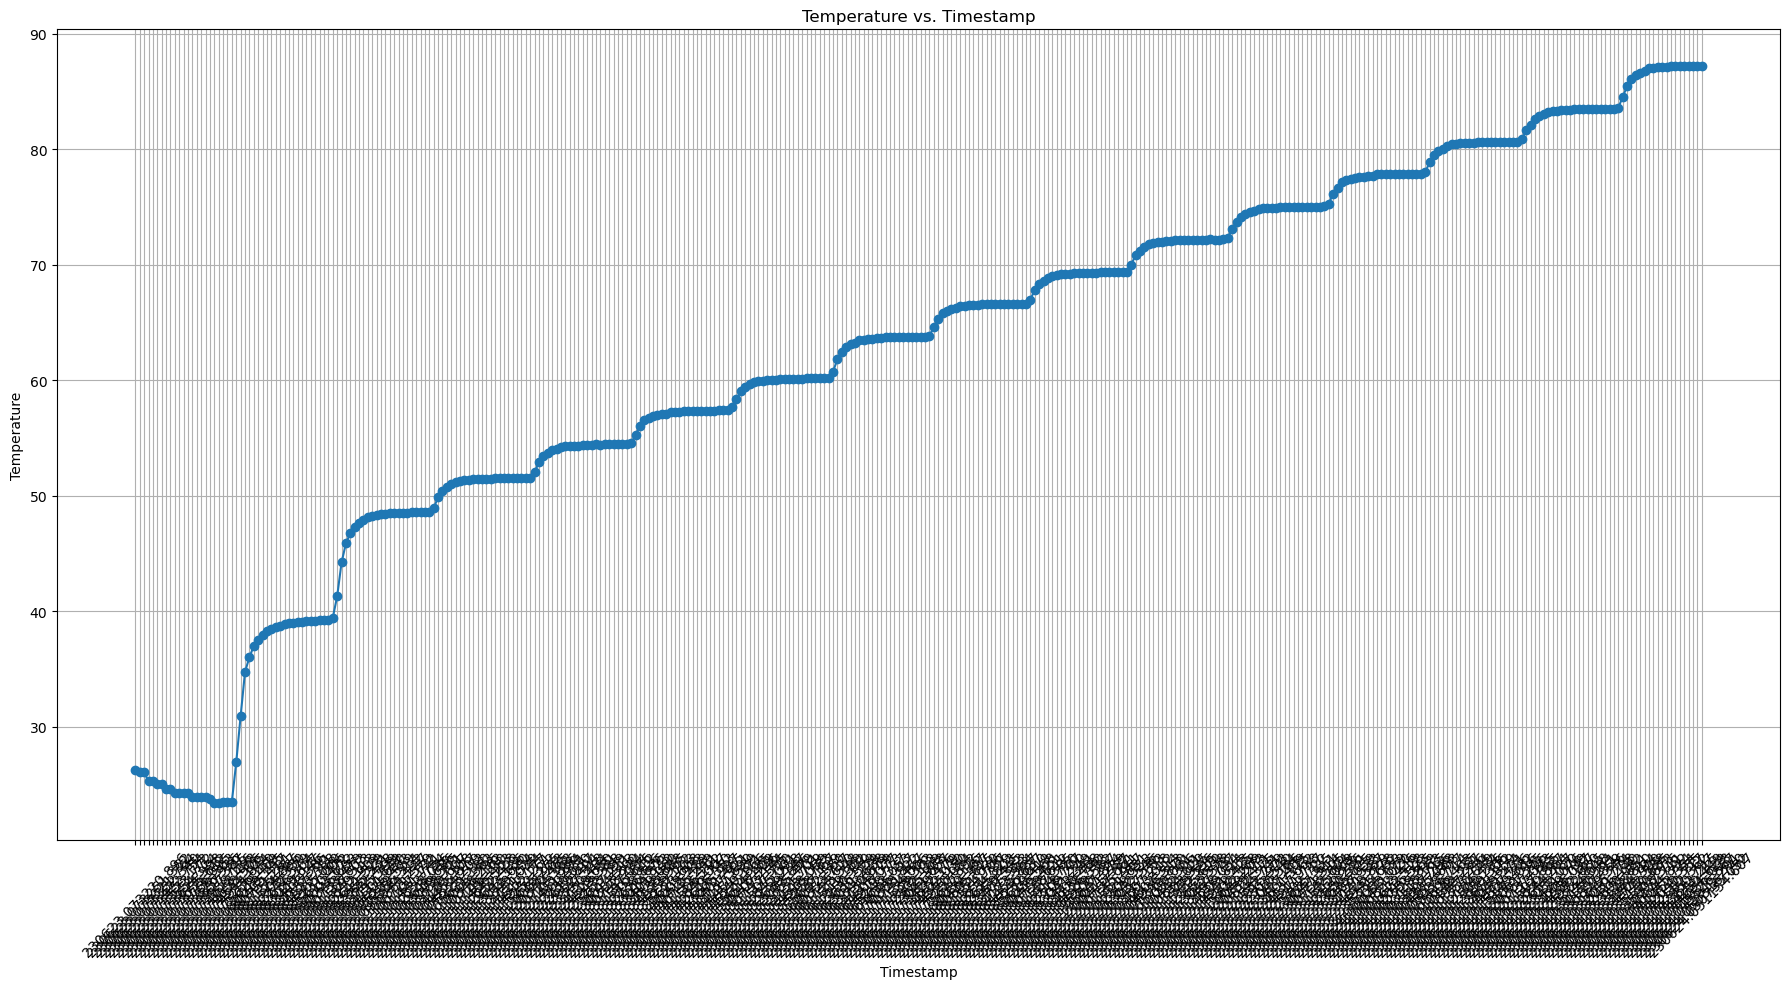

In [4]:

import matplotlib.pyplot as plt

import pandas as pd

df = pd.read_excel('A2B.xlsx')

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]


# Extract the Timestamp and Temp columns as strings
timestamps = filtered_df['Timestamp'].astype(str)
temperatures = filtered_df['Temp']

# Create the line plot
plt.figure(figsize=(18, 10))
plt.plot(timestamps, temperatures, marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Temperature vs. Timestamp')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()



Normal order in graph:
 [(26.27, 23.54), (37.01, 39.45), (46.78, 48.93), (49.9, 52.05), (52.93, 54.59), (56.05, 57.71), (59.08, 60.74), (62.5, 63.87), (65.33, 66.99), (67.87, 70.02), (70.9, 72.36), (73.14, 75.29), (76.17, 78.03), (78.91, 80.86), (81.64, 83.59), (86.13, 87.21)]

[23.54, 39.45, 48.93, 52.05, 54.59, 57.71, 60.74, 63.87, 66.99, 70.02, 72.36, 75.29, 78.03, 80.86, 83.59, 87.21]


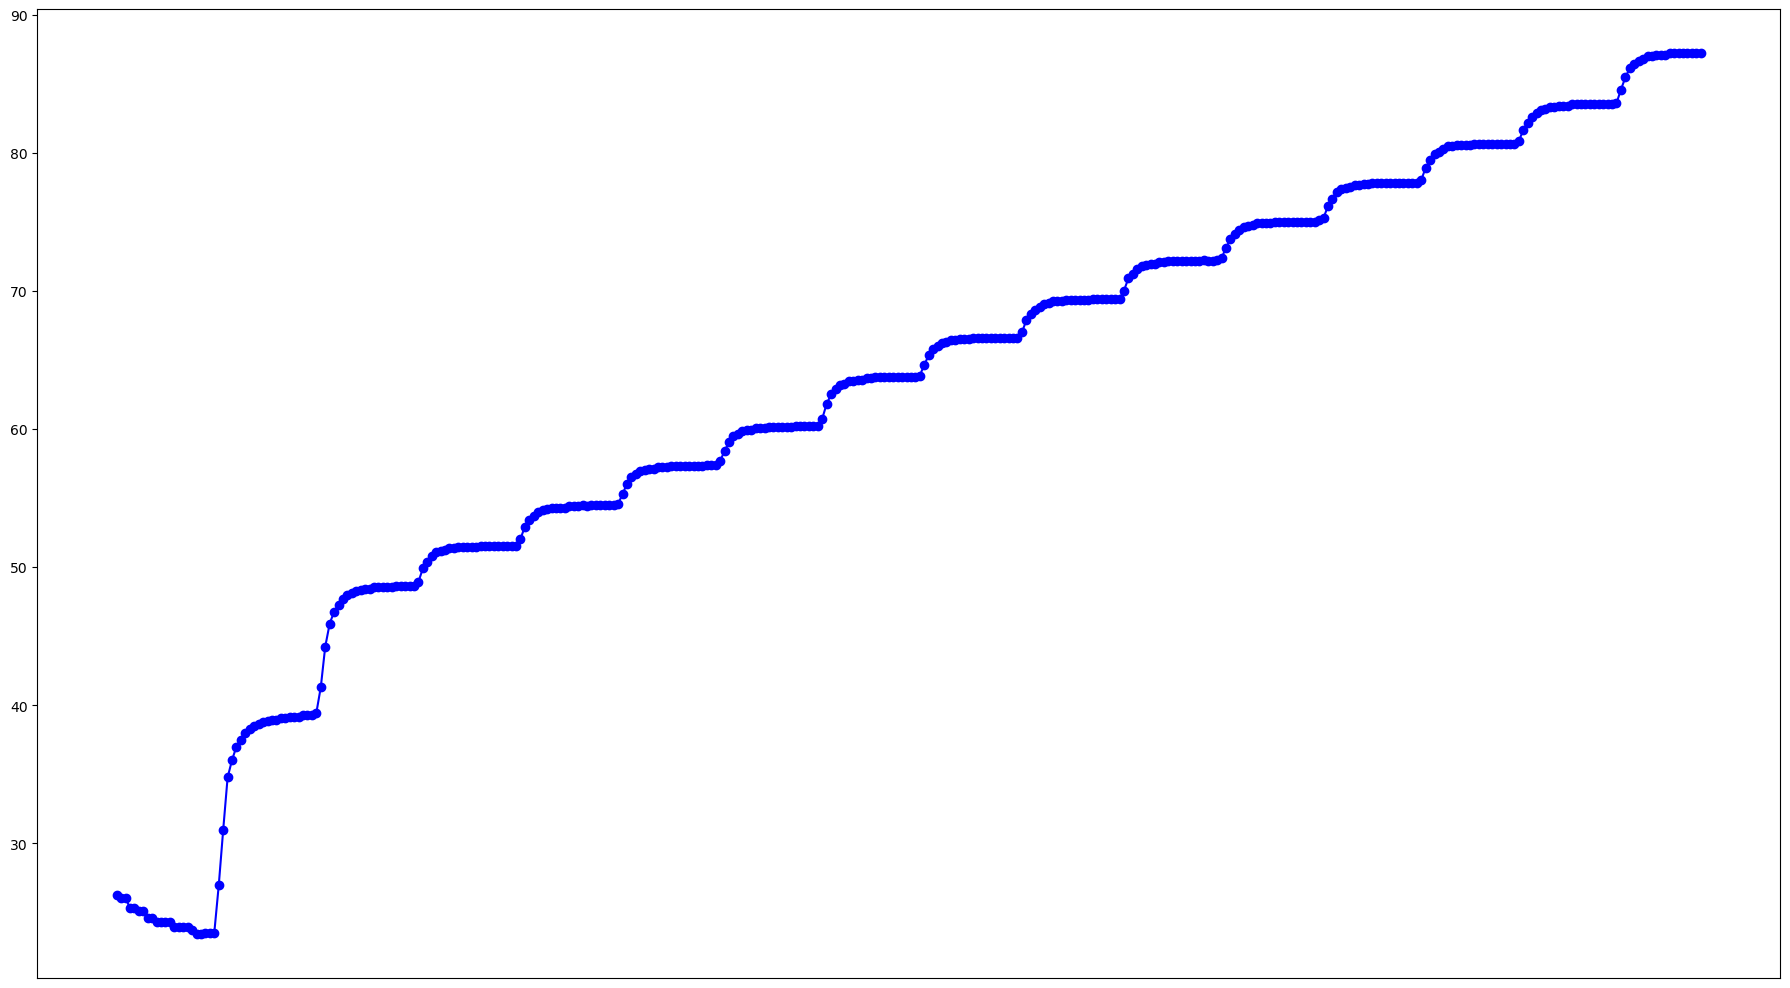

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('A2B.xlsx')

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

# Initialize variables
first_recurring_values = []

# Iterate over the filtered temp column values
for value in filtered_df['Temp']:
    # Check if the value is not the same as the previous value
    if len(first_recurring_values) == 0 or value != first_recurring_values[-1]:
        first_recurring_values.append(value)

# print(first_recurring_values)
print() 

def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if (lst[i + 1] - lst[i] < 0.6) or (lst[i + 1] - lst[i] <= 0 and lst[i + 1] - lst[i] > -0.6):
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                result.append((start, lst[i]))
                start = None
    if start is not None:
        result.append((start, lst[-1]))

    return result


pairs = create_tuple_pairs(first_recurring_values)
print("Normal order in graph:\n",pairs)
print()

# Extract the first and second elements (timestamps and temperature values) from each tuple and create separate lists
demo = [t[1] for t in pairs]
print(demo)

# Extract the Timestamp and Temp columns as strings
df_timestamps = filtered_df['Timestamp'].astype(str)
df_temperatures = filtered_df['Temp']

plt.figure(figsize=(18, 10))
plt.plot(df_timestamps, df_temperatures, marker='o', linestyle='-', color='blue', label='demo')  # Original data in blue



plt.xticks([])


plt.tight_layout()

# Show the plot
plt.show()



Normal order in graph:
 [(22.46, 22.07), (72.56, -39.75), (71.19, -39.84), (72.17, -39.75), (72.95, -39.75), (72.46, -39.65), (71.68, -39.75), (71.58, -39.16), (71.58, -39.75), (71.58, -39.55), (71.78, -36.72), (71.19, -38.67), (70.7, -39.06), (71.09, -39.06), (71.19, -38.96), (70.9, -38.96), (71.0, -39.06), (71.09, -39.75), (71.88, -39.75), (72.07, -39.36), (72.07, -39.75), (72.36, -39.75), (71.88, -39.75), (72.07, -39.75), (72.07, -39.65), (71.68, -39.75), (72.17, -39.75), (68.75, 69.73), (71.97, -39.75), (71.97, -39.65), (71.97, -39.45), (71.88, -38.87), (72.85, -38.96), (71.19, -38.96), (71.19, -38.77), (71.29, -38.96), (70.7, -38.96), (71.39, -38.96), (71.0, -39.36), (70.61, -39.26), (71.39, -39.26), (71.58, -39.26), (70.8, 71.39), (72.07, -39.16), (71.39, -39.16), (71.39, -39.16), (71.29, -39.16), (71.97, -38.57), (72.27, -8.79), (73.14, -39.75), (72.17, -39.75), (72.17, -39.75), (72.27, -39.06), (72.17, -39.16), (71.68, -38.96), (71.97, -37.7), (33.59, -39.36), (72.27, -39.75),

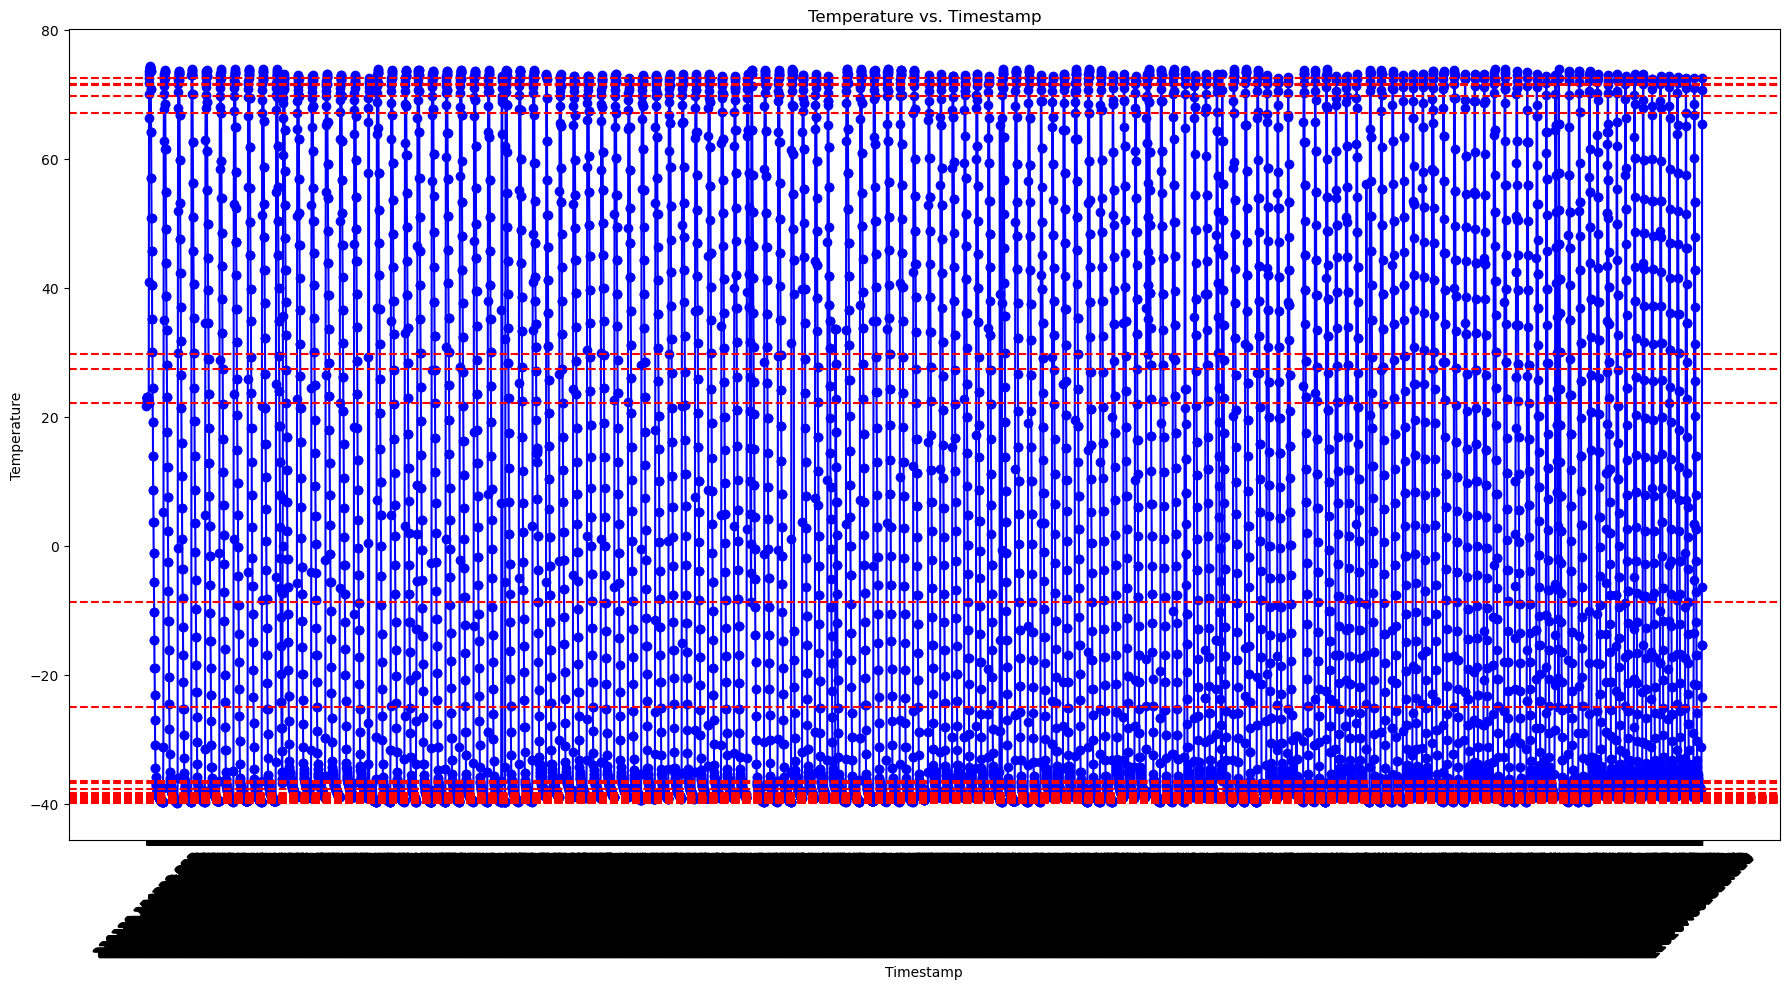

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('ptc.xlsx')

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

# Initialize variables
first_recurring_values = []

# Iterate over the filtered temp column values
for value in filtered_df['Temp']:
    # Check if the value is not the same as the previous value
    if len(first_recurring_values) == 0 or value != first_recurring_values[-1]:
        first_recurring_values.append(value)

# print(first_recurring_values)
print() 

def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if (lst[i + 1] - lst[i] < 0.6) or (lst[i + 1] - lst[i] <= 0 and lst[i + 1] - lst[i] > -0.6):
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                result.append((start, lst[i]))
                start = None
    if start is not None:
        result.append((start, lst[-1]))

    return result


pairs = create_tuple_pairs(first_recurring_values)
print("Normal order in graph:\n",pairs)
print()

# Extract the first and second elements (timestamps and temperature values) from each tuple and create separate lists
timestamps = [t[0] for t in pairs]
temperatures = [t[1] for t in pairs]
print()
print(temperatures)

# # Sample DataFrame
# df = pd.read_excel('A2B.xlsx')

# # Get the first unique value from the 'Legend' column
# first_legend_value = df['Legend'].iloc[0]

# # Filter the DataFrame based on the first unique 'Legend' value
# filtered_df = df[df['Legend'] == first_legend_value]

# Extract the Timestamp and Temp columns as strings
df_timestamps = filtered_df['Timestamp'].astype(str)
df_temperatures = filtered_df['Temp']

# Create the line plot with red points for the matching temperature values
plt.figure(figsize=(18, 10))
plt.plot(df_timestamps, df_temperatures, marker='o', linestyle='-', color='blue', label='Temperature')  # Original data in blue

# Add vertical lines for each temperature value
for temp in temperatures:
    plt.axhline(y=temp, color='r', linestyle='--', label='Specific Temperature')

plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Temperature vs. Timestamp')
plt.xticks(rotation=45)
plt.tight_layout()


# Show the plot
plt.show()



Normal order in graph:
 [(75.49, 23.83), (25.2, -40.23), (-39.55, -39.75), (75.68, -39.65), (75.49, -40.33), (-39.65, -39.75), (74.9, 75.49)]


[23.83, -40.23, -39.75, -39.65, -40.33, -39.75, 75.49]


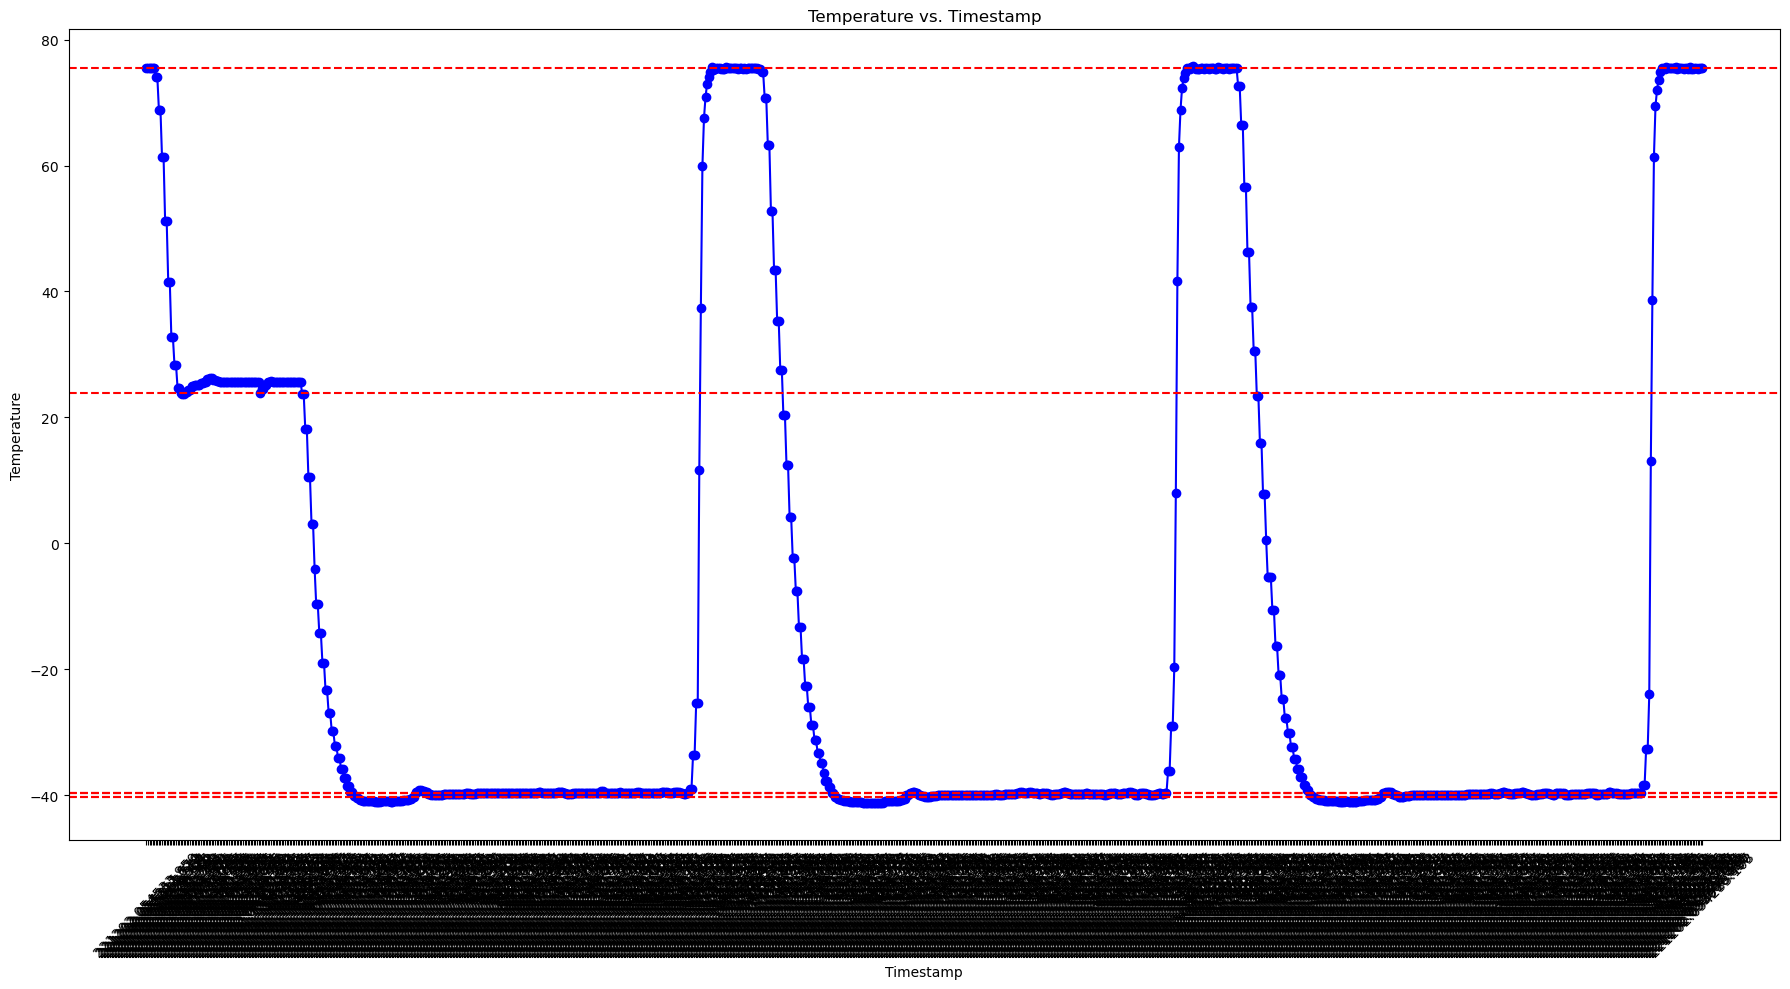

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('TPD.xlsx')

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

# Initialize variables
first_recurring_values = []

# Iterate over the filtered temp column values
for value in filtered_df['Temp']:
    # Check if the value is not the same as the previous value
    if len(first_recurring_values) == 0 or value != first_recurring_values[-1]:
        first_recurring_values.append(value)

# print(first_recurring_values)
print() 

def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if (lst[i + 1] - lst[i] < 0.6) or (lst[i + 1] - lst[i] <= 0 and lst[i + 1] - lst[i] > -0.6):
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                result.append((start, lst[i]))
                start = None
    if start is not None:
        result.append((start, lst[-1]))

    return result


pairs = create_tuple_pairs(first_recurring_values)
print("Normal order in graph:\n",pairs)
print()

# Extract the first and second elements (timestamps and temperature values) from each tuple and create separate lists
timestamps = [t[0] for t in pairs]
temperatures = [t[1] for t in pairs]
print()
print(temperatures)

# # Sample DataFrame
# df = pd.read_excel('A2B.xlsx')

# # Get the first unique value from the 'Legend' column
# first_legend_value = df['Legend'].iloc[0]

# # Filter the DataFrame based on the first unique 'Legend' value
# filtered_df = df[df['Legend'] == first_legend_value]

# Extract the Timestamp and Temp columns as strings
df_timestamps = filtered_df['Timestamp'].astype(str)
df_temperatures = filtered_df['Temp']

# Create the line plot with red points for the matching temperature values
plt.figure(figsize=(18, 10))
plt.plot(df_timestamps, df_temperatures, marker='o', linestyle='-', color='blue', label='Temperature')  # Original data in blue

# Add vertical lines for each temperature value
for temp in temperatures:
    plt.axhline(y=temp, color='r', linestyle='--', label='Specific Temperature')

plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Temperature vs. Timestamp')
plt.xticks(rotation=45)
plt.tight_layout()


# Show the plot
plt.show()


Normal order in graph:
 [(26.27, 23.54), (37.01, 39.45), (46.78, 48.93), (49.9, 52.05), (52.93, 54.59), (56.05, 57.71), (59.08, 60.74), (62.5, 63.87), (65.33, 66.99), (67.87, 70.02), (70.9, 72.36), (73.14, 75.29), (76.17, 78.03), (78.91, 80.86), (81.64, 83.59), (86.13, 87.21)]



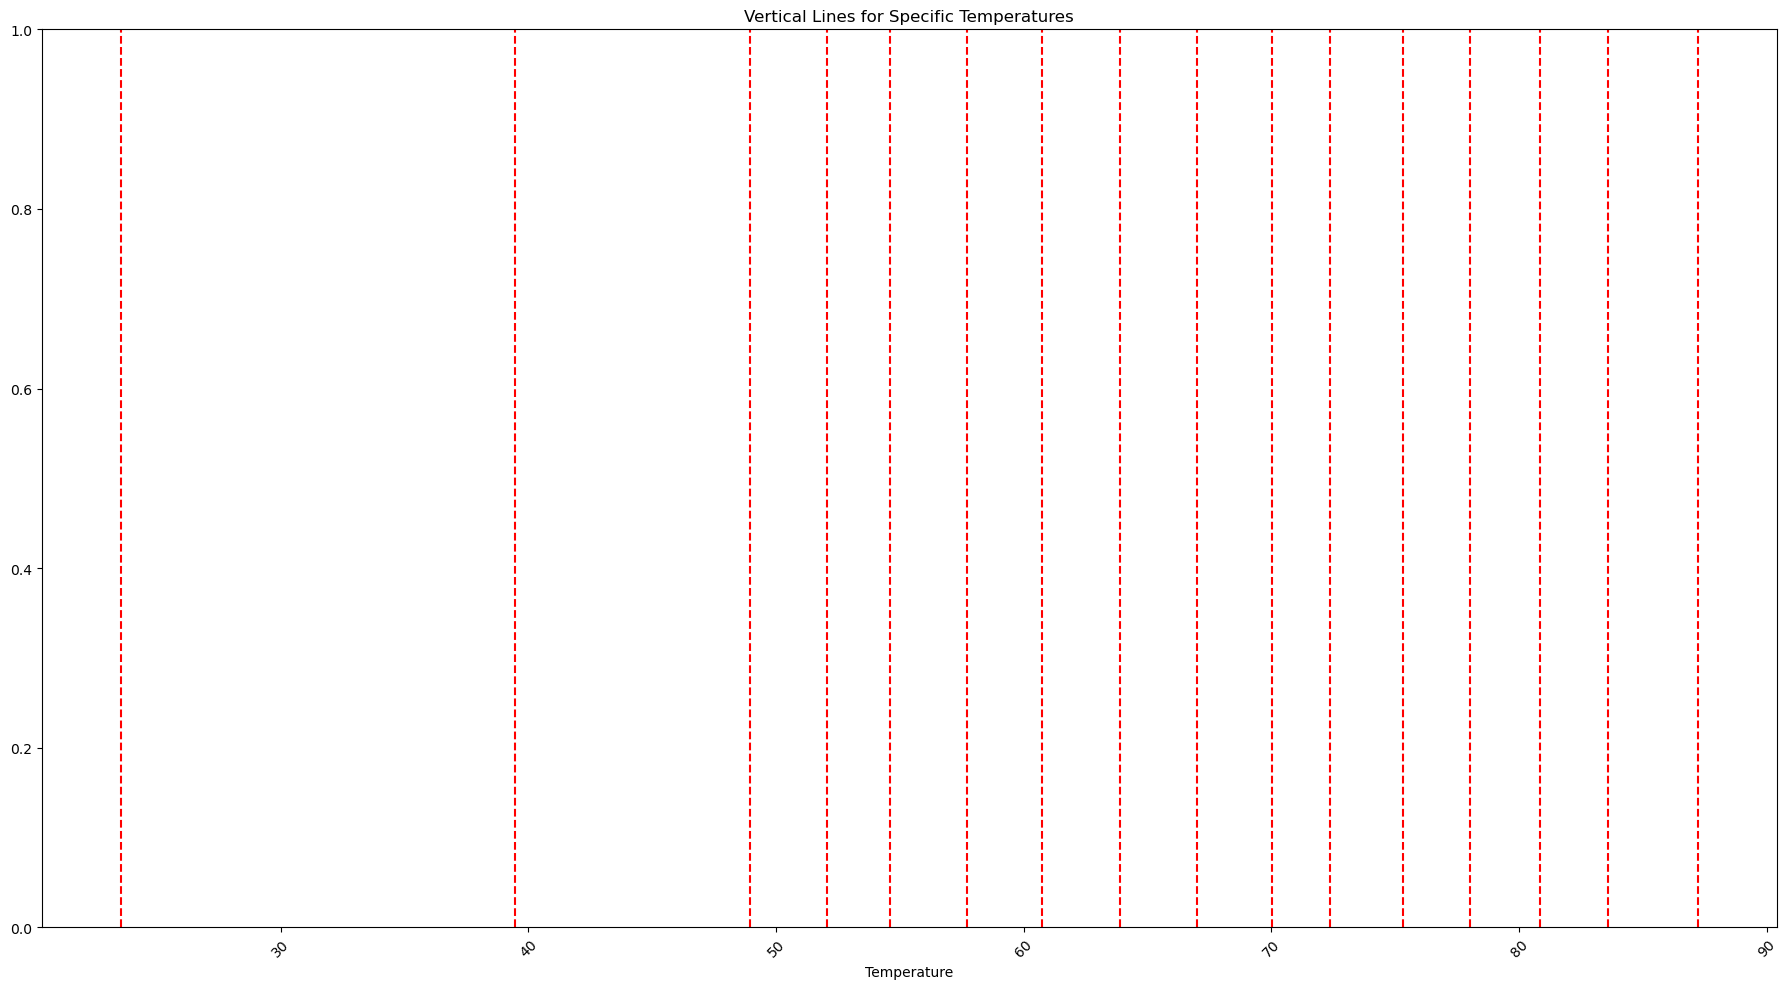

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('A2B.xlsx')

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

# Initialize variables
first_recurring_values = []

# Iterate over the filtered temp column values
for value in filtered_df['Temp']:
    # Check if the value is not the same as the previous value
    if len(first_recurring_values) == 0 or value != first_recurring_values[-1]:
        first_recurring_values.append(value)

def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if (lst[i + 1] - lst[i] < 0.6) or (lst[i + 1] - lst[i] <= 0 and lst[i + 1] - lst[i] > -0.6):
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                result.append((start, lst[i]))
                start = None
    if start is not None:
        result.append((start, lst[-1]))

    return result

pairs = create_tuple_pairs(first_recurring_values)
print("Normal order in graph:\n", pairs)
print()

# Extract the first and second elements (timestamps and temperature values) from each tuple and create separate lists
timestamps = [t[0] for t in pairs]
temperatures = [t[1] for t in pairs]

# Create the line plot with red points for the matching temperature values
plt.figure(figsize=(18, 10))

# Add vertical lines for each temperature value
for temp in temperatures:
    plt.axvline(x=temp, color='r', linestyle='--', label='Specific Temperature')

plt.xlabel('Temperature')
plt.title('Vertical Lines for Specific Temperatures')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Normal order in graph:
 [(26.27, 23.54), (37.01, 39.45), (46.78, 48.93), (49.9, 52.05), (52.93, 54.59), (56.05, 57.71), (59.08, 60.74), (62.5, 63.87), (65.33, 66.99), (67.87, 70.02), (70.9, 72.36), (73.14, 75.29), (76.17, 78.03), (78.91, 80.86), (81.64, 83.59), (86.13, 87.21)]



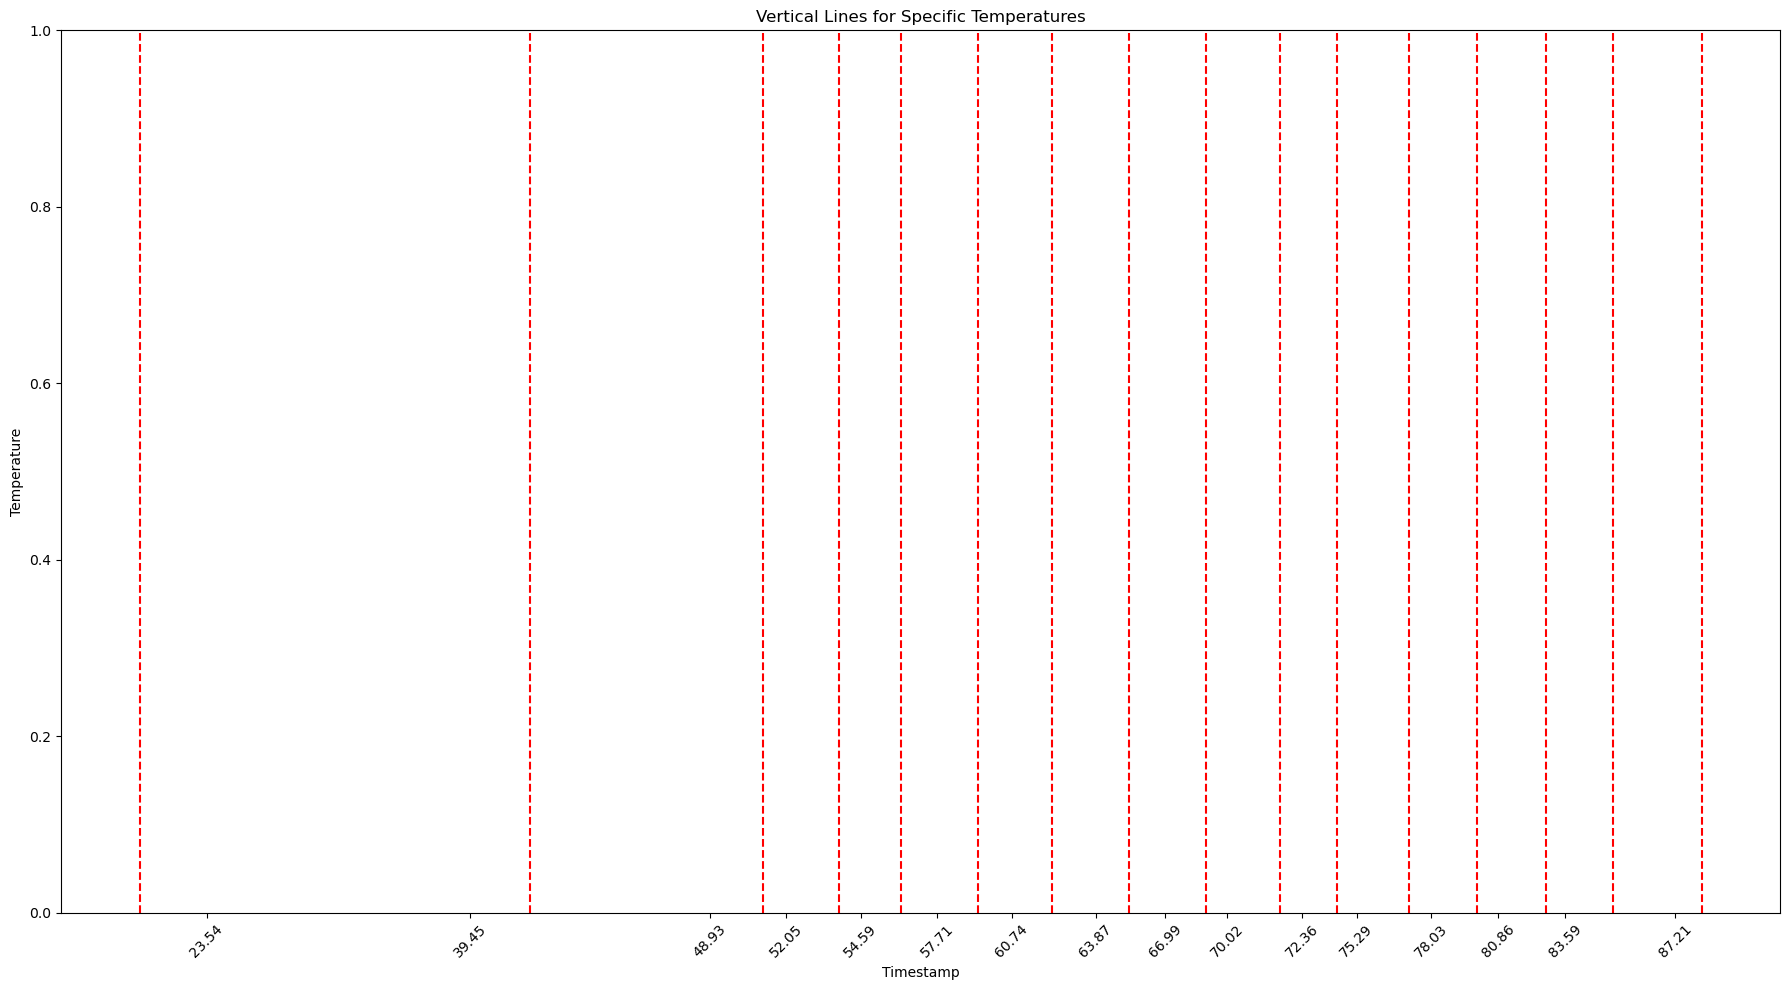

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('A2B.xlsx')

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

# Initialize variables
first_recurring_values = []

# Iterate over the filtered temp column values
for value in filtered_df['Temp']:
    # Check if the value is not the same as the previous value
    if len(first_recurring_values) == 0 or value != first_recurring_values[-1]:
        first_recurring_values.append(value)

def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if (lst[i + 1] - lst[i] < 0.6) or (lst[i + 1] - lst[i] <= 0 and lst[i + 1] - lst[i] > -0.6):
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                result.append((start, lst[i]))
                start = None
    if start is not None:
        result.append((start, lst[-1]))

    return result

pairs = create_tuple_pairs(first_recurring_values)
print("Normal order in graph:\n", pairs)
print()

# Extract the first and second elements (timestamps and temperature values) from each tuple and create separate lists
timestamps = [t[0] for t in pairs]
temperatures = [t[1] for t in pairs]

# Create the line plot with red points for the matching temperature values
plt.figure(figsize=(18, 10))

# Add vertical lines for each temperature value
for temp in temperatures:
    plt.axvline(x=temp, color='r', linestyle='--')  # Only draw the vertical lines without labels

# Set the x-axis tick labels as the temperature values
plt.xticks(timestamps, temperatures, rotation=45)

plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Vertical Lines for Specific Temperatures')
plt.tight_layout()

# Show the plot
plt.show()


In [47]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('A2B.xlsx')

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

# Initialize variables
first_recurring_values = []

# Iterate over the filtered temp column values
for value in filtered_df['Temp']:
    # Check if the value is not the same as the previous value
    if len(first_recurring_values) == 0 or value != first_recurring_values[-1]:
        first_recurring_values.append(value)

def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if (lst[i + 1] - lst[i] < 0.6) or (lst[i + 1] - lst[i] <= 0 and lst[i + 1] - lst[i] > -0.6):
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                result.append((start, lst[i]))
                start = None
    if start is not None:
        result.append((start, lst[-1]))

    return result

pairs = create_tuple_pairs(first_recurring_values)
print("Normal order in graph:\n", pairs)
print()

# Extract the first and second elements (timestamps and temperature values) from each tuple and create separate lists
temperatures = [t[1] for t in pairs]
print(temperatures)

filtered_timestamps = filtered_df['Timestamp'].tolist()

# Display the lists
print("Filtered Timestamps List:")
print(filtered_timestamps)

print("\nFiltered Temperatures List:")
print(temperatures)



Normal order in graph:
 [(26.27, 23.54), (37.01, 39.45), (46.78, 48.93), (49.9, 52.05), (52.93, 54.59), (56.05, 57.71), (59.08, 60.74), (62.5, 63.87), (65.33, 66.99), (67.87, 70.02), (70.9, 72.36), (73.14, 75.29), (76.17, 78.03), (78.91, 80.86), (81.64, 83.59), (86.13, 87.21)]

[23.54, 39.45, 48.93, 52.05, 54.59, 57.71, 60.74, 63.87, 66.99, 70.02, 72.36, 75.29, 78.03, 80.86, 83.59, 87.21]
Filtered Timestamps List:
['230623.073220.896', '230623.073251.352', '230623.073321.764', '230623.073352.340', '230623.073422.754', '230623.073453.172', '230623.073523.772', '230623.073554.324', '230623.073624.998', '230623.073655.612', '230623.073726.095', '230623.073756.503', '230623.073826.936', '230623.073857.387', '230623.073927.745', '230623.073958.136', '230623.074028.498', '230623.074058.906', '230623.074544.105', '230623.074914.844', '230623.075256.130', '230623.075629.469', '230623.080019.145', '230623.080405.417', '230623.080751.281', '230623.081155.267', '230623.081524.866', '230623.081909


Normal order in graph:
 [(26.27, 23.54), (37.01, 39.45), (46.78, 48.93), (49.9, 52.05), (52.93, 54.59), (56.05, 57.71), (59.08, 60.74), (62.5, 63.87), (65.33, 66.99), (67.87, 70.02), (70.9, 72.36), (73.14, 75.29), (76.17, 78.03), (78.91, 80.86), (81.64, 83.59), (86.13, 87.21)]

[23.54, 39.45, 48.93, 52.05, 54.59, 57.71, 60.74, 63.87, 66.99, 70.02, 72.36, 75.29, 78.03, 80.86, 83.59, 87.21]

Timestamp values:
 ['230623.075256.130', '230623.092611.529', '230623.105223.553', '230623.121900.931', '230623.134138.688', '230623.150743.144', '230623.163343.688', '230623.175642.126', '230623.192318.707', '230623.204936.513', '230623.221144.741', '230623.233757.533', '230624.010148.335', '230624.022654.787', '230624.035140.685', '230624.044250.449']
<bound method NDFrame.head of 0      230623.073220.896
1      230623.073251.352
2      230623.073321.764
3      230623.073352.340
4      230623.073422.754
             ...        
353    230624.045526.867
354    230624.045915.291
355    230624.050316

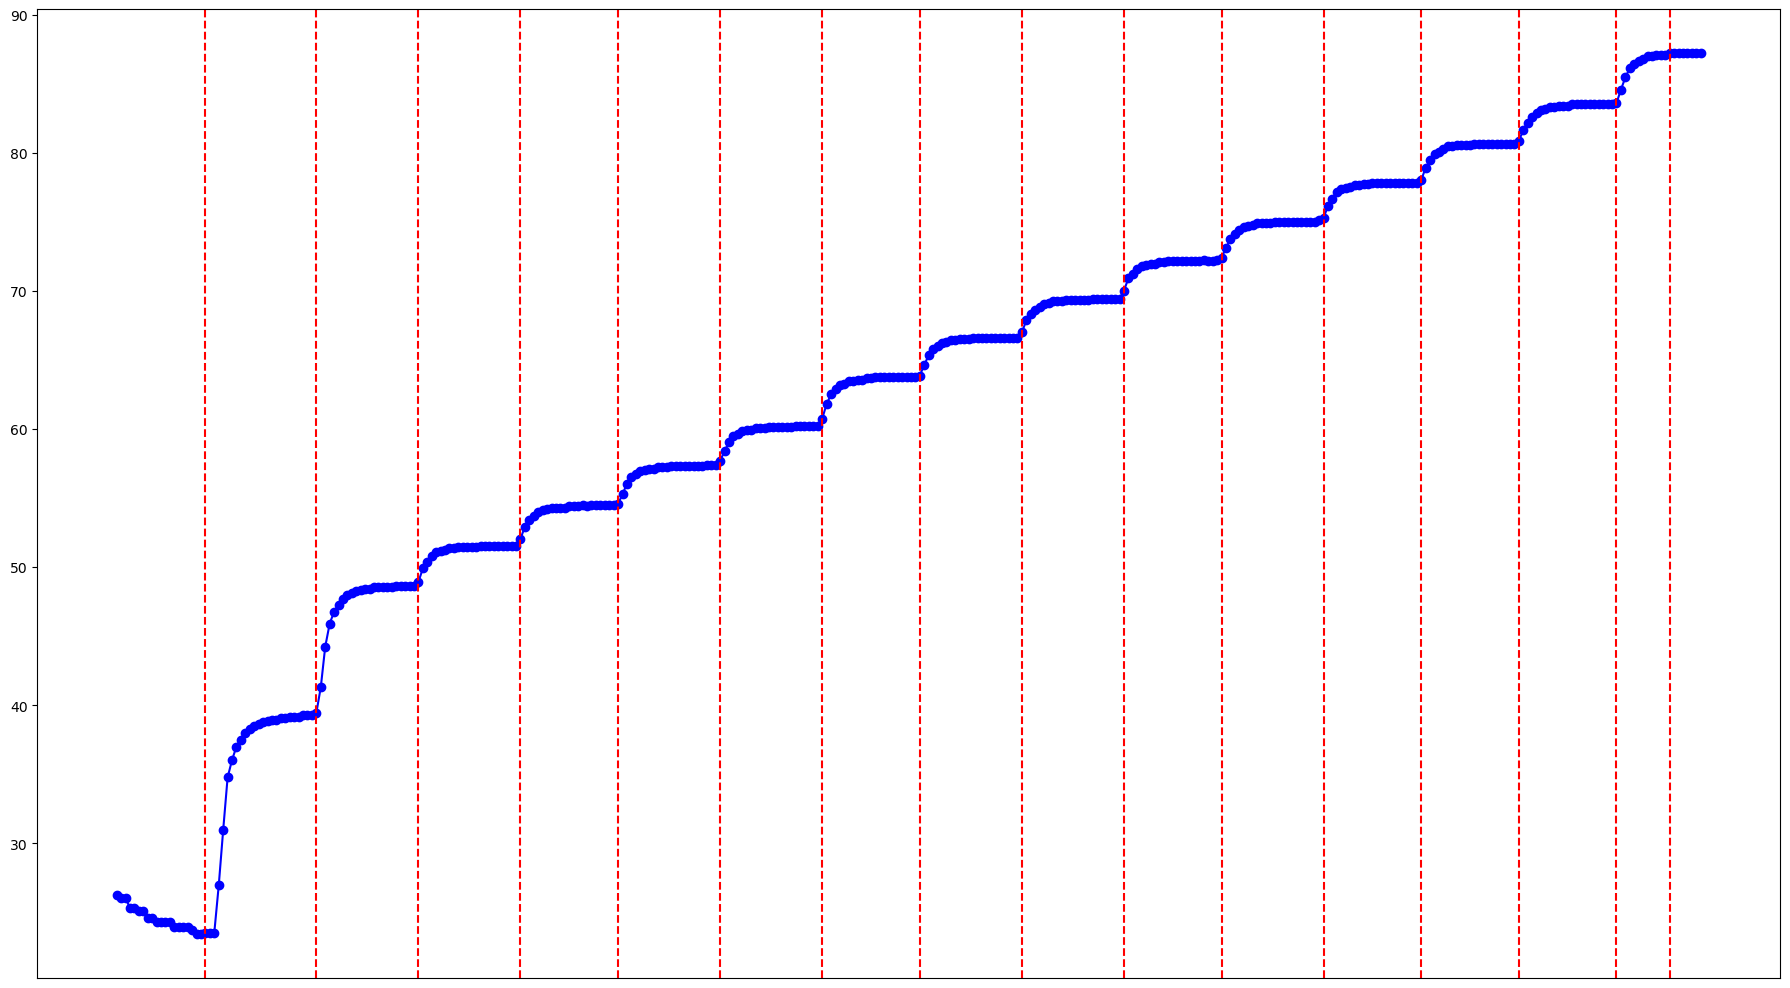

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('A2B.xlsx')

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

# Initialize variables
first_recurring_values = []

# Iterate over the filtered temp column values
for value in filtered_df['Temp']:
    # Check if the value is not the same as the previous value
    if len(first_recurring_values) == 0 or value != first_recurring_values[-1]:
        first_recurring_values.append(value)

print()

def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if (lst[i + 1] - lst[i] < 0.6) or (lst[i + 1] - lst[i] <= 0 and lst[i + 1] - lst[i] > -0.6):
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                result.append((start, lst[i]))
                start = None
    if start is not None:
        result.append((start, lst[-1]))

    return result

pairs = create_tuple_pairs(first_recurring_values)
print("Normal order in graph:\n", pairs)
print()

# Extract the first and second elements (timestamps and temperature values) from each tuple and create separate lists
demo = [t[1] for t in pairs]
print(demo)
print()

timestamp_value = []
for value in demo:
    # Extract the first timestamp from the concatenated string
    recurring_timestamp = df[df['Temp'] == value]['Timestamp'].iloc[0].split()[0]
    timestamp_value.append(recurring_timestamp)

print("Timestamp values:\n", timestamp_value)


# Extract the Timestamp and Temp columns as strings
df_timestamps = filtered_df['Timestamp'].astype(str)
df_temperatures = filtered_df['Temp']
print(df_timestamps.head)

plt.figure(figsize=(18, 10))
plt.plot(df_timestamps, df_temperatures, marker='o', linestyle='-', color='blue', label='demo')  # Original data in blue
for ts in timestamp_value:
    plt.axvline(x=ts, color='r', linestyle='--')

plt.xticks([])

plt.tight_layout()

# Show the plot
plt.show()



Normal order in graph:
 [(75.49, 23.83), (25.2, -40.23), (-39.55, -39.75), (75.68, -39.65), (75.49, -40.33), (-39.65, -39.75), (74.9, 75.49)]

[23.83, -40.23, -39.75, -39.65, -40.33, -39.75, 75.49]

Timestamp values:
 ['221202.060634.976', '221202.022918.642', '221202.034643.794', '221202.034543.129', '221202.022213.150', '221202.034643.794', '221202.055757.964']


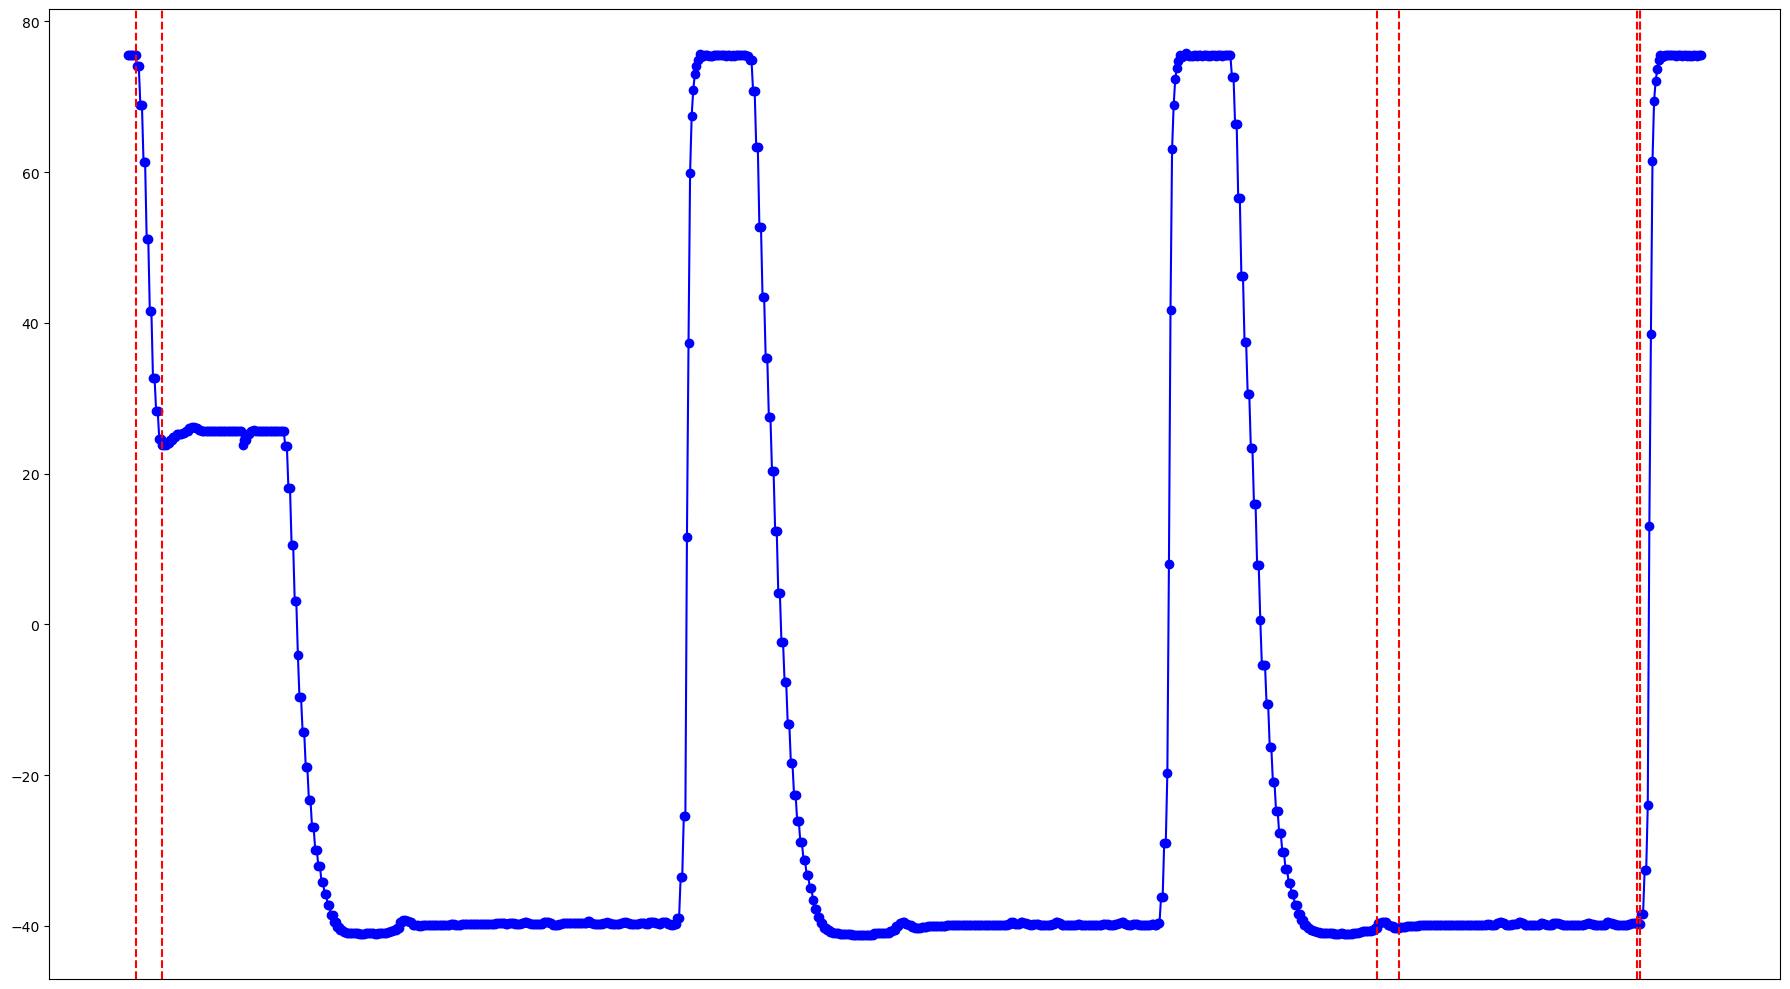

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('TPD.xlsx')

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

# Initialize variables
first_recurring_values = []

# Iterate over the filtered temp column values
for value in filtered_df['Temp']:
    # Check if the value is not the same as the previous value
    if len(first_recurring_values) == 0 or value != first_recurring_values[-1]:
        first_recurring_values.append(value)

print()

def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if (lst[i + 1] - lst[i] < 0.6) or (lst[i + 1] - lst[i] <= 0 and lst[i + 1] - lst[i] > -0.6):
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                result.append((start, lst[i]))
                start = None
    if start is not None:
        result.append((start, lst[-1]))

    return result

pairs = create_tuple_pairs(first_recurring_values)
print("Normal order in graph:\n", pairs)
print()

# Extract the first and second elements (timestamps and temperature values) from each tuple and create separate lists
demo = [t[1] for t in pairs]
print(demo)
print()

timestamp_value = []
for value in demo:
    # Filter rows for the current temperature value
    temp_rows = filtered_df[filtered_df['Temp'] == value].copy()  # Make a copy of the filtered DataFrame
    # Convert the Timestamp column to a categorical variable using codes
    temp_rows['Update'] = temp_rows['Timestamp'].astype('category').cat.codes
    # Find the row with the maximum timestamp using the categorical code
    max_timestamp_row = temp_rows.loc[temp_rows['Update'].idxmax()]
    timestamp_value.append(max_timestamp_row['Timestamp'])

print("Timestamp values:\n", timestamp_value)

# Extract the Timestamp and Temp columns as strings
df_timestamps = filtered_df['Timestamp'].astype(str)
df_temperatures = filtered_df['Temp']

plt.figure(figsize=(18, 10))
plt.plot(df_timestamps, df_temperatures, marker='o', linestyle='-', color='blue', label='demo')  # Original data in blue
for ts in timestamp_value:
    plt.axvline(x=ts, color='r', linestyle='--')

plt.xticks([])

plt.tight_layout()

# Show the plot
plt.show()




24   23.83
60   -40.23
106   -39.75
212   -39.65
280   -40.33
322   -39.75
347   75.39
Normal order in graph:
 [(75.49, 23.83), (25.2, -40.23), (-39.55, -39.75), (75.68, -39.65), (75.49, -40.33), (-39.65, -39.75), (74.9, 75.49)]

 [23.83, -40.23, -39.75, -39.65, -40.33, -39.75, 75.49]

 [-40.33, -40.23, -39.75, -39.75, -39.65, 23.83, 75.49]
Timestamp values:
 ['221202.022213.150', '221202.022918.642', '221202.034643.794', '221202.034643.794', '221202.034543.129', '221202.060634.976', '221202.055757.964']


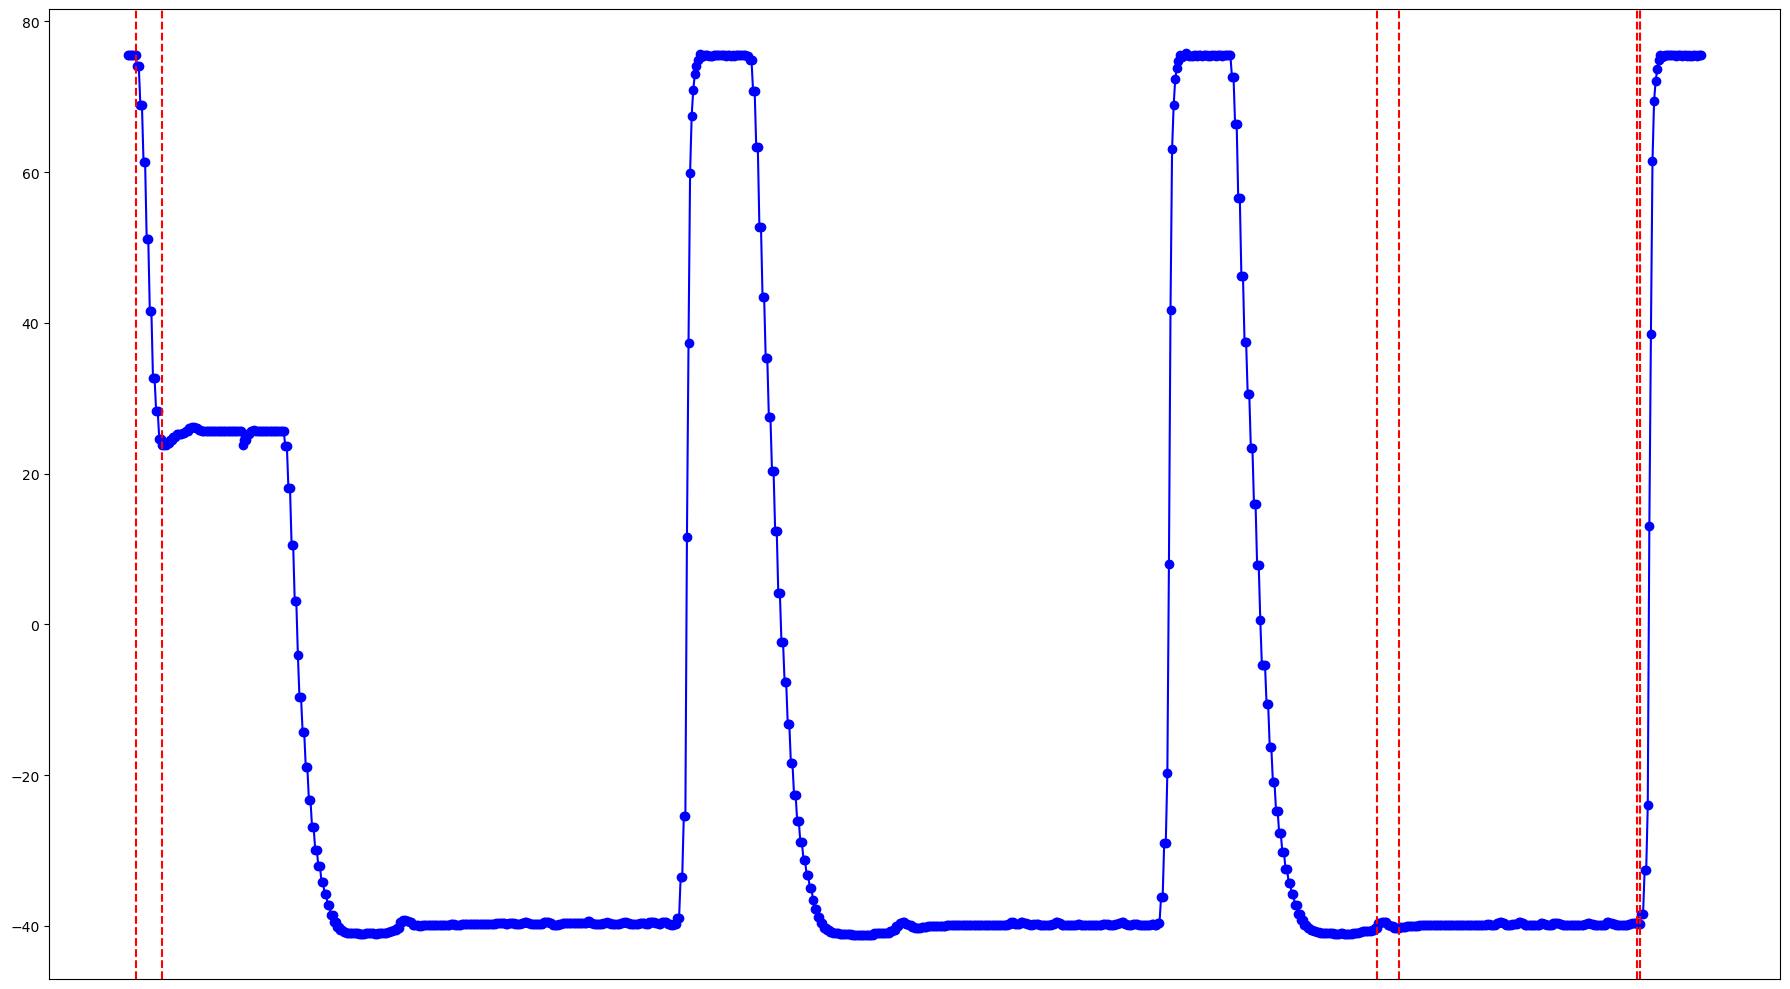

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('TPD.xlsx')

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

# Initialize variables
first_recurring_values = []

# Iterate over the filtered temp column values
for value in filtered_df['Temp']:
    # Check if the value is not the same as the previous value
    if len(first_recurring_values) == 0 or value != first_recurring_values[-1]:
        first_recurring_values.append(value)

print()

def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if (lst[i + 1] - lst[i] < 0.6) or (lst[i + 1] - lst[i] <= 0 and lst[i + 1] - lst[i] > -0.6):
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                result.append((start, lst[i]))
                print(i,' ',lst[i])
                start = None
    if start is not None:
        result.append((start, lst[-1]))
        print(i,' ',lst[i])

    return result

pairs = create_tuple_pairs(first_recurring_values)
print("Normal order in graph:\n",pairs)
print()

# Extract the first and second elements (timestamps and temperature values) from each tuple and create separate lists
demo = [t[1] for t in pairs]

print('',demo)
demo.sort()
print("\n",demo)

# Initialize the timestamp_value list to store the latest timestamp for each temperature value
timestamp_value = []

# Iterate over the temperature values and find the latest timestamp for each value
for value in demo:
    max_timestamp = filtered_df[filtered_df['Temp'] == value]['Timestamp'].max()
    timestamp_value.append(max_timestamp)

print("Timestamp values:\n", timestamp_value)

# Extract the Timestamp and Temp columns as strings
df_timestamps = filtered_df['Timestamp'].astype(str)
df_temperatures = filtered_df['Temp']

plt.figure(figsize=(18, 10))
plt.plot(df_timestamps, df_temperatures, marker='o', linestyle='-', color='blue', label='demo')  # Original data in blue
for ts in timestamp_value:
    plt.axvline(x=ts, color='r', linestyle='--')

plt.xticks([])

plt.tight_layout()

# Show the plot
plt.show()



73   23.83   221201.155439.302
75   24.51   221201.155540.178
172   -40.23   221201.173111.480
348   -39.75   221201.190017.089
350   -38.96   221201.190117.969
352   -33.59   221201.190218.820
354   -25.39   221201.190319.625
655   -39.65   221201.232345.313
657   -36.23   221201.232446.008
659   -29.0   221201.232546.723
793   -40.33   221202.022213.150
960   -39.75   221202.034643.794
962   -38.48   221202.034744.446
964   -32.62   221202.034845.147
998   75.49   221202.053918.490
Normal order in graph:
 [(75.49, 23.83), (24.51, 24.51), (25.2, -40.23), (-39.55, -39.75), (-38.96, -38.96), (-33.59, -33.59), (-25.39, -25.39), (75.68, -39.65), (-36.23, -36.23), (-29.0, -29.0), (75.49, -40.33), (-39.65, -39.75), (-38.48, -38.48), (-32.62, -32.62), (74.9, 75.49)]

 [23.83, 24.51, -40.23, -39.75, -38.96, -33.59, -25.39, -39.65, -36.23, -29.0, -40.33, -39.75, -38.48, -32.62, 75.49]

 [-40.33, -40.23, -39.75, -39.65, -38.96, -38.48, -36.23, -33.59, -32.62, -29.0, -25.39, 23.83, 24.51, 75.49

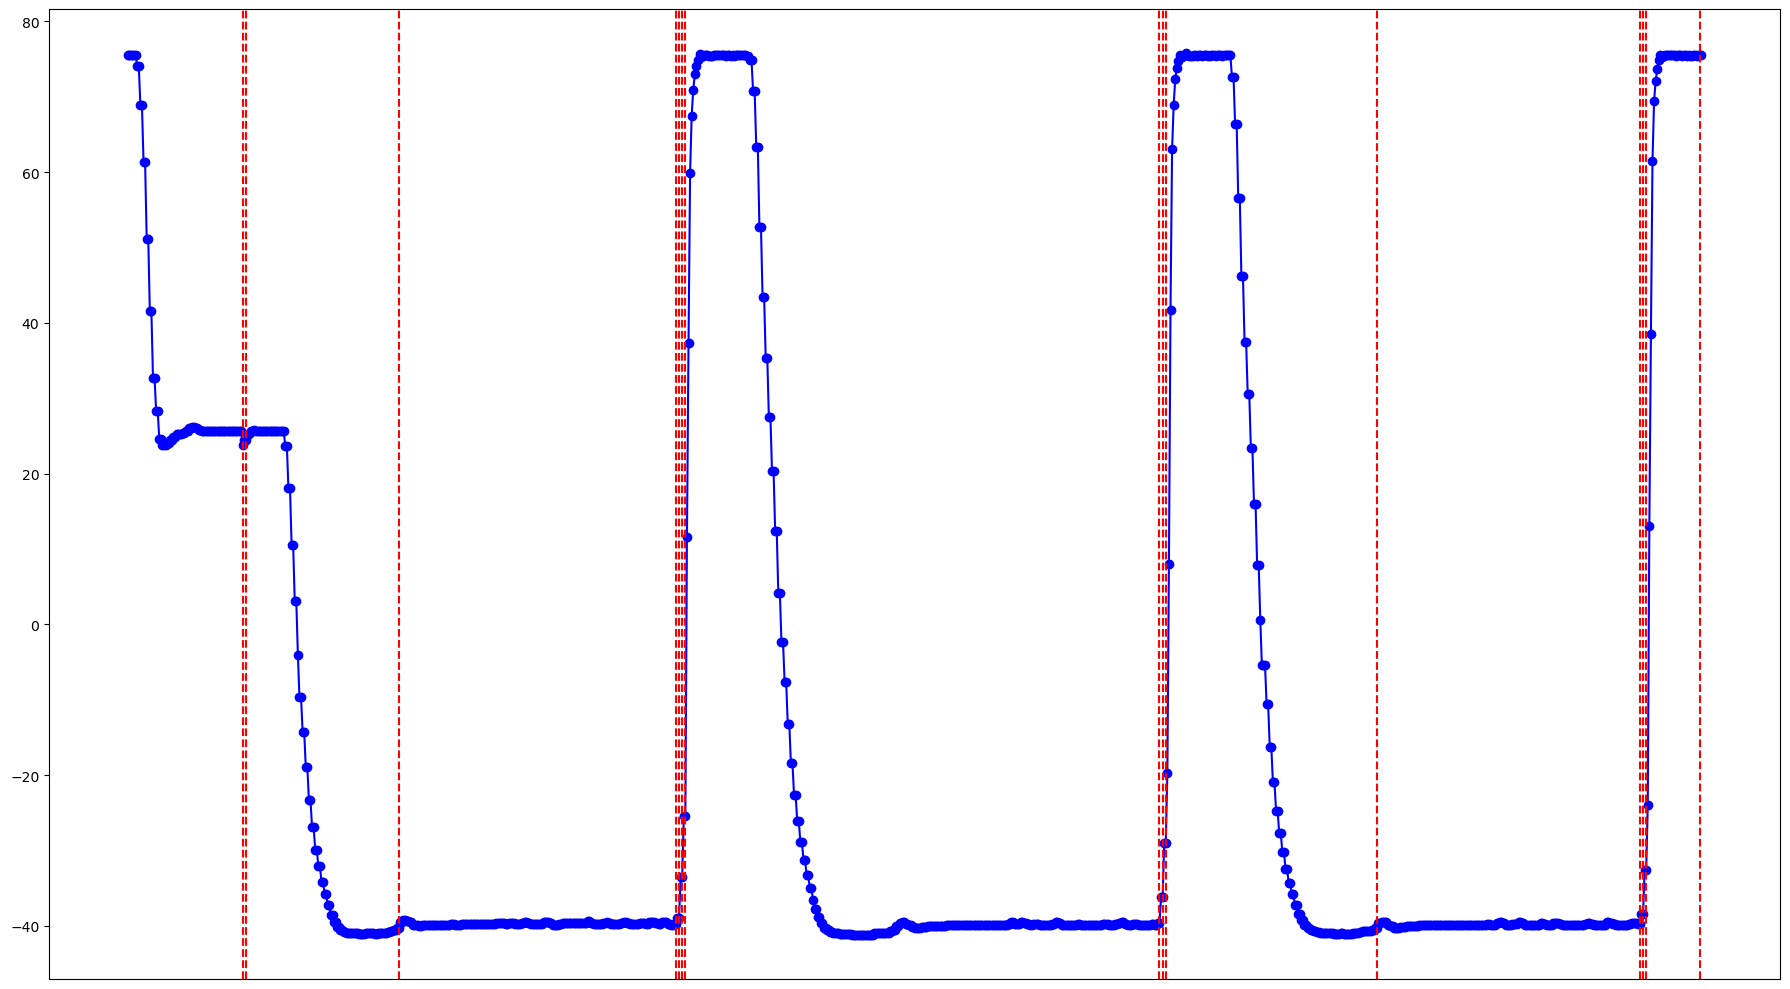

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('TPD.xlsx')

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

# Initialize variables
Temp_values = filtered_df['Temp'].tolist()



print()

# Initialize the timestamp_value list to store the latest timestamp for each temperature value
timestamp_value = []

def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if (lst[i + 1] - lst[i] < 0.6) or (lst[i + 1] - lst[i] <= 0 and lst[i + 1] - lst[i] > -0.6):
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                result.append((start, lst[i]))
                print(i,' ',lst[i],' ',filtered_df['Timestamp'].astype(str).iloc[i])
                timestamp_value.append(filtered_df['Timestamp'].astype(str).iloc[i])
                start = None
    if start is not None:
        result.append((start, lst[-1]))
        print(i,' ',lst[i],' ',filtered_df['Timestamp'].astype(str).iloc[i])
        timestamp_value.append(filtered_df['Timestamp'].astype(str).iloc[i])

    return result

pairs = create_tuple_pairs(Temp_values)
print("Normal order in graph:\n",pairs)
print()

# def merge_ranges(ranges):
#     sorted_ranges = sorted(ranges, key=lambda x: x[0])
#     merged_ranges = []
    
#     for start, end in sorted_ranges:
#         if not merged_ranges or start > merged_ranges[-1][1]:
#             merged_ranges.append((start, end))
#         else:
#             merged_ranges[-1] = (merged_ranges[-1][0], max(merged_ranges[-1][1], end))
    
#     return merged_ranges

# filtered_tuples = merge_ranges(sorted_list)
# print(filtered_tuples)

# Extract the first and second elements (timestamps and temperature values) from each tuple and create separate lists
demo = [t[1] for t in pairs]


print('',demo)
demo = list(set(demo))


demo.sort()
print("\n",demo)



# # Iterate over the temperature values and find the latest timestamp for each value
# for value in demo:
#     max_timestamp = filtered_df[filtered_df['Temp'] == value]['Timestamp'].max()
#     timestamp_value.append(max_timestamp)

print("Timestamp values:\n", timestamp_value)

# Extract the Timestamp and Temp columns as strings
df_timestamps = filtered_df['Timestamp'].astype(str)
df_temperatures = filtered_df['Temp']

plt.figure(figsize=(18, 10))
plt.plot(df_timestamps, df_temperatures, marker='o', linestyle='-', color='blue', label='demo')  # Original data in blue
for ts in timestamp_value:
    plt.axvline(x=ts, color='r', linestyle='--')

plt.xticks([])

plt.tight_layout()

# Show the plot
plt.show()


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

data_df = pd.read_excel('A2B.xlsx')

# Get the first unique value from the 'Legend' column
first_legend_value = data_df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
a2b_df = data_df[data_df['Legend'] == first_legend_value]


def change_point_detection_v1(signal,temp_l):
        
        try:
        
            algo_python = rpt.Pelt(model="l2",jump=1,min_size=2).fit(signal)
    
            penalty_value = 50
            my_bkps = algo_python.predict(penalty_value)
    
            temp_list =[]
            for item in my_bkps:
                if item == len(temp_l):
                   temp_list.append(round(temp_l[item-1],0))
                else:
                    temp_list.append(round(temp_l[item],0))
            
            change_point_list = sorted(set(temp_list))
            max_limit = max(temp_l)
            last_value = change_point_list[-1]
            
            if abs(max_limit-last_value) >= 2:
                change_point_list.append(max_limit)
            else:
                change_point_list.pop()
                change_point_list.append(max_limit)
            
            
            return change_point_list
        
        except Exception as e:
             print(e)
             func = inspect.currentframe().f_code.co_name
             errorobj.log_error(func, e, "")
             return (" ")
			 

# a2b_df = data_df[data_df['Legend']==legend_list[0]]
temp_l = a2b_df['Temp'].to_list()
temp_list = self.change_point_detection(temp_l)    
print("temp_list",temp_list)
# graph_signal = np.array(sorted(a2b_df['temp'].to_list()))
# temp_list = self.change_point_detection_v1(graph_signal,temp_l)

NameError: name 'legend_list' is not defined

In [19]:
import time
import pandas as pd


start = time.time()

data = pd.read_excel('A2B.xlsx')
data.head()

end = time.time()

print("{:.6f}".format(end-start))

3.342297



2   23.63   230327.135042.708
97   20.7   230327.154905.343
309   -40.14   230327.182709.361
361   49.41   230327.201242.627
409   59.67   230327.214733.062
438   64.94   230327.225845.802
514   63.77   230328.002026.966
Normal order in graph:
 [(23.93, 23.63), (22.66, 20.7), (-37.01, -40.14), (47.56, 49.41), (58.69, 59.67), (64.06, 64.94), (64.16, 63.77)]

[23.63, 20.7, -40.14, 49.41, 59.67, 64.94, 63.77]



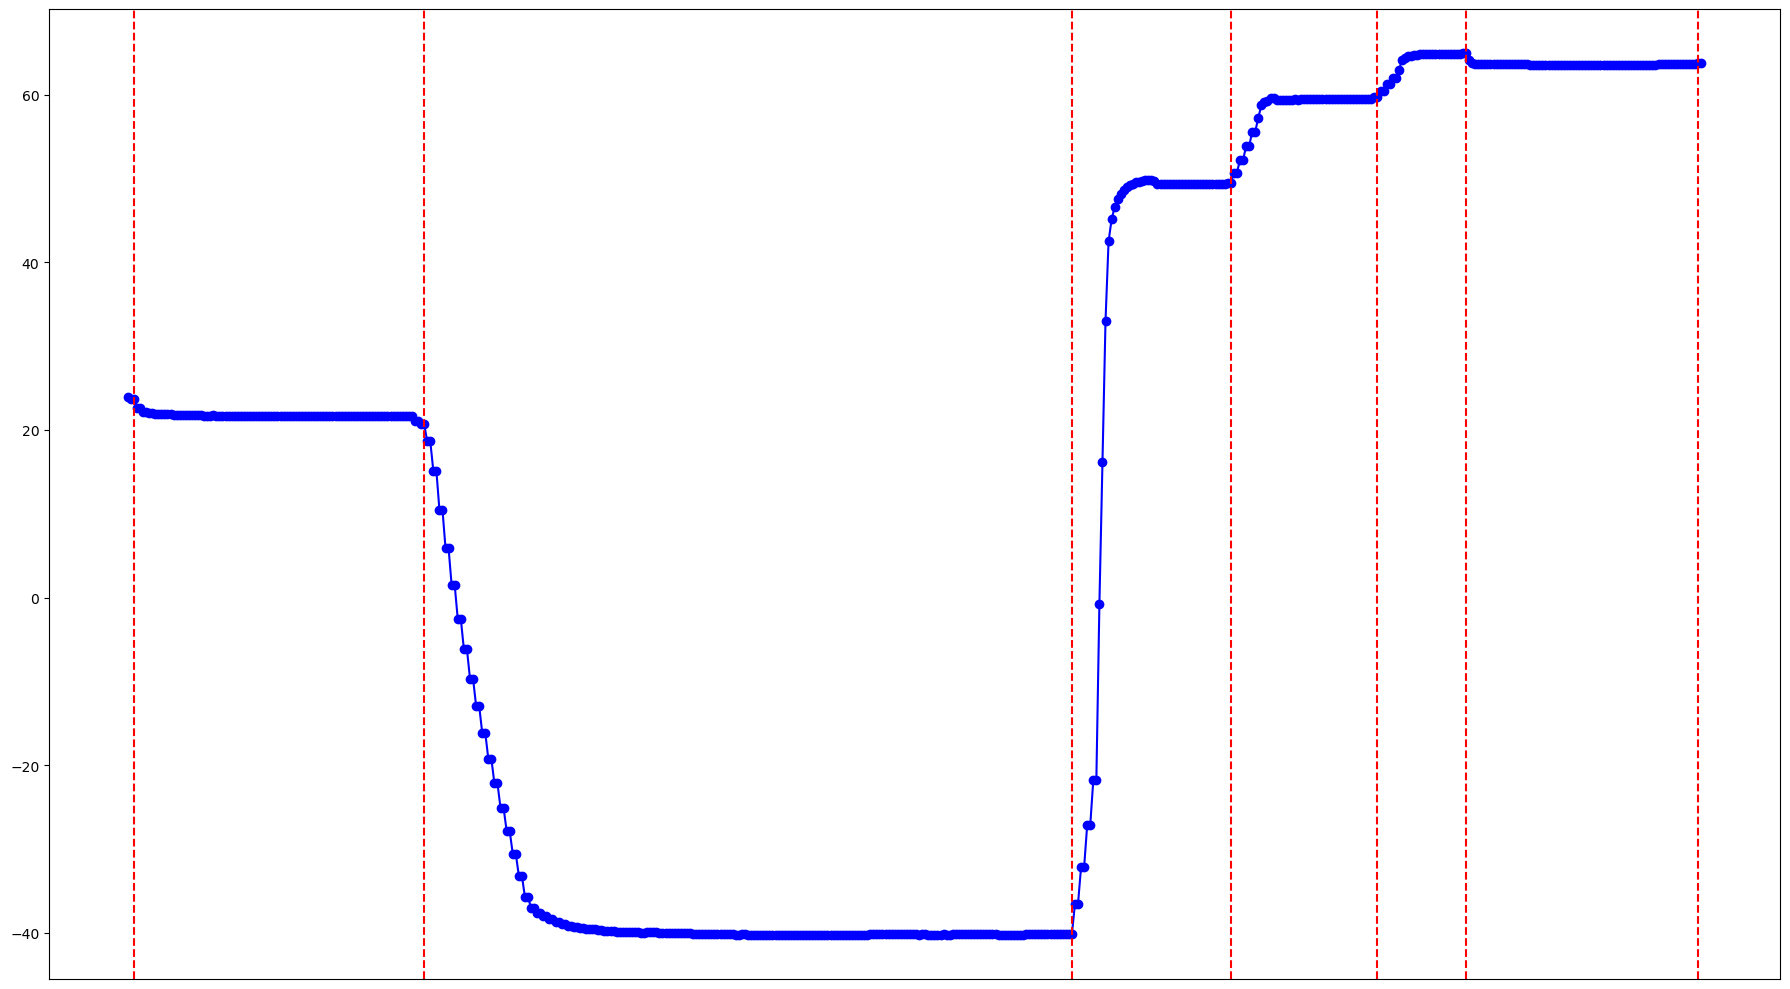

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('Leg10.xlsx')

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

print()


timestamp_value = []

def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if (lst[i + 1] - lst[i] < 0.6 and lst[i+1] - lst[i] > -0.6):
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                if(start == lst[i]):
                    pass
                else:
                    result.append((start, lst[i]))
                    print(i,' ',lst[i],' ',filtered_df['Timestamp'].astype(str).iloc[i])
                    timestamp_value.append(filtered_df['Timestamp'].astype(str).iloc[i])
                start = None
    if start is not None:
        result.append((start, lst[-1]))
        print(i,' ',lst[i],' ',filtered_df['Timestamp'].astype(str).iloc[i])
        timestamp_value.append(filtered_df['Timestamp'].astype(str).iloc[i])

    return result

temp = filtered_df['Temp'].tolist()

pairs = create_tuple_pairs(temp)
print("Normal order in graph:\n", pairs)
print()

# Extract the first and second elements (timestamps and temperature values) from each tuple and create separate lists
demo = [t[1] for t in pairs]
print(demo)
print()

# for value in demo:
#     # Filter rows for the current temperature value
#     temp_rows = filtered_df[filtered_df['Temp'] == value].copy()  # Make a copy of the filtered DataFrame
#     # Convert the Timestamp column to a categorical variable using codes
#     temp_rows['Update'] = temp_rows['Timestamp'].astype('category').cat.codes
#     # Find the row with the maximum timestamp using the categorical code
#     max_timestamp_row = temp_rows.loc[temp_rows['Update'].idxmax()]
#     timestamp_value.append(max_timestamp_row['Timestamp'])

# print("Timestamp values:\n", timestamp_value)

# Extract the Timestamp and Temp columns as strings
df_timestamps = filtered_df['Timestamp'].astype(str)
df_temperatures = filtered_df['Temp']

plt.figure(figsize=(18, 10))
plt.plot(df_timestamps, df_temperatures, marker='o', linestyle='-', color='blue', label='demo')  # Original data in blue
for ts in timestamp_value:
    plt.axvline(x=ts, color='r', linestyle='--')

plt.xticks([])

plt.tight_layout()

# Show the plot
plt.show()




21   22.07   220128.161129.392
37   74.22   220128.165919.359
152   -39.75   220128.175727.378
170   73.44   220128.185235.116
285   -39.84   220128.195053.917
302   73.24   220128.204545.310
413   -39.75   220128.214212.752
421   73.73   220201.131601.372
536   -39.75   220201.141403.375
554   73.63   220201.150919.726
669   -39.65   220201.160728.614
684   73.83   220201.165930.864
799   -39.75   220201.180034.883
816   73.24   220201.185541.935
931   -39.16   220201.195412.815
946   73.73   220201.204813.208
1060   -39.75   220201.214628.816
1075   73.34   220201.224124.904
1189   -39.55   220201.233955.203
1203   73.83   220202.003220.188
1251   -36.72   220202.005848.287
1269   72.46   220207.083840.805
1384   -38.67   220207.093643.483
1400   72.36   220207.103204.263
1513   -39.06   220207.112913.653
1529   72.95   220207.122208.043
1643   -39.06   220207.132202.190
1663   72.66   220207.141715.093
1778   -38.96   220207.151547.572
1795   72.36   220207.161102.124
1907   -38.96

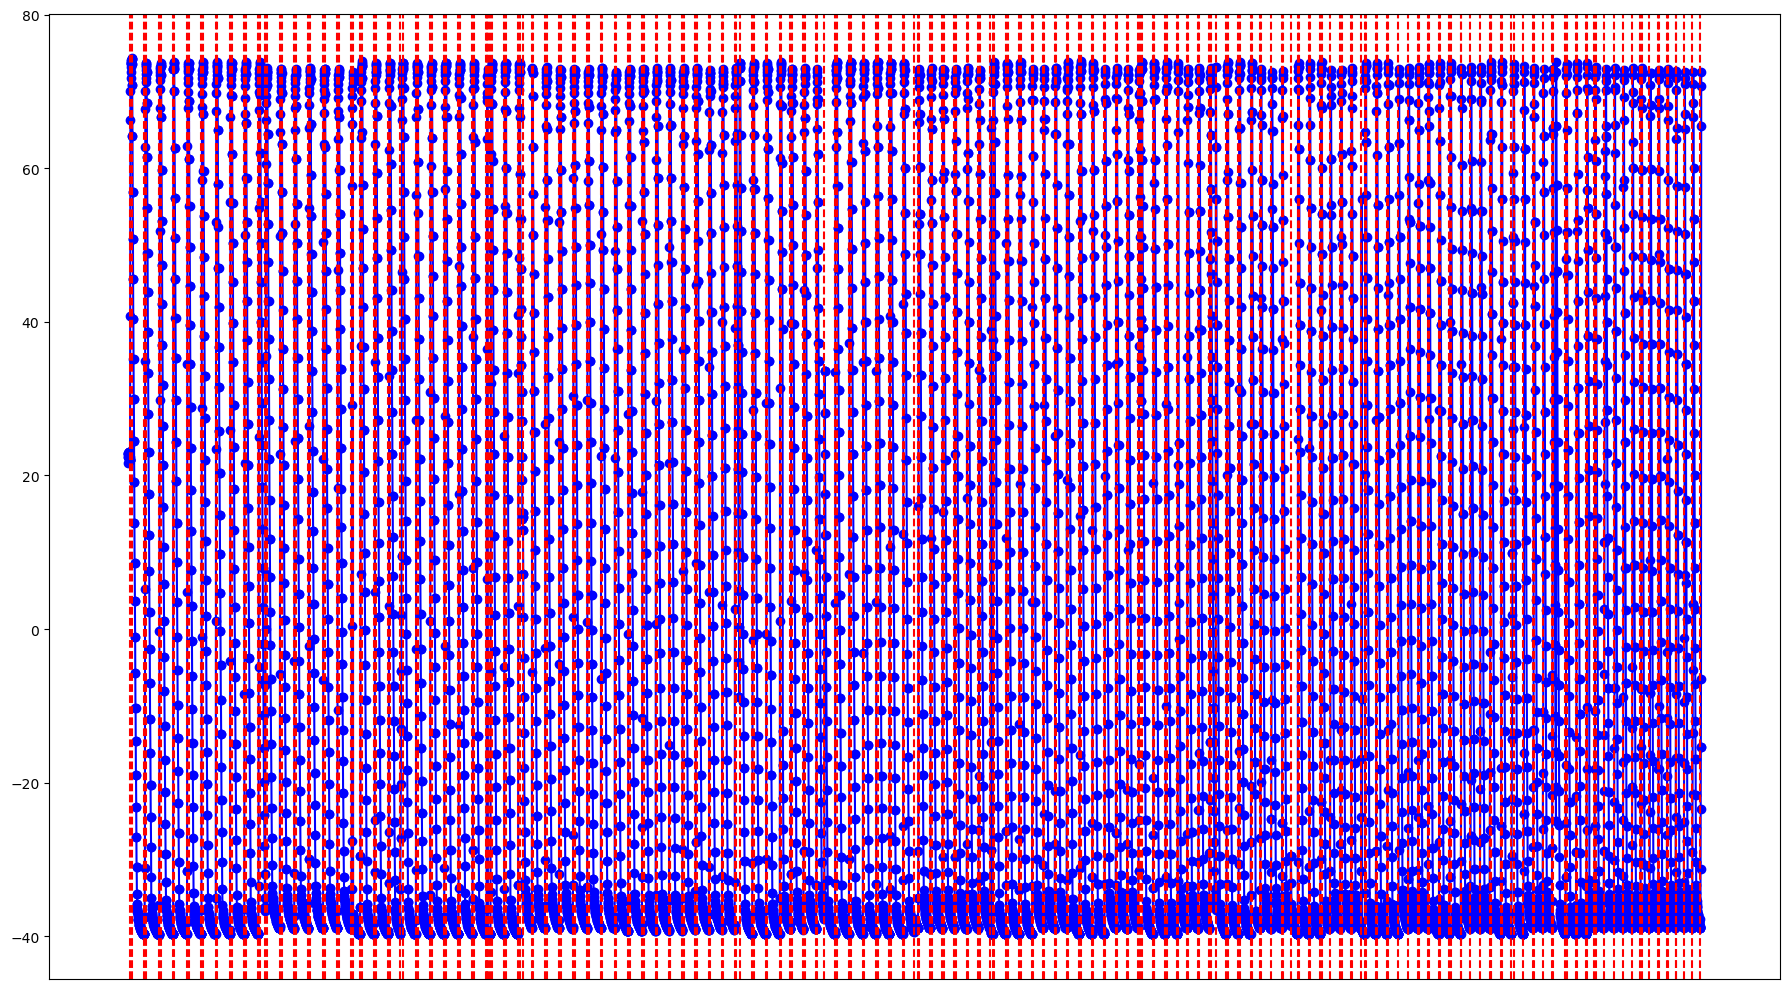

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('curv.xlsx')

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

print()


timestamp_value = []

def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if (lst[i + 1] - lst[i] < 0.6 and lst[i+1] - lst[i] > -0.6):
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                if(start == lst[i]):
                    pass
                else:
                    result.append((start, lst[i]))
                    print(i,' ',lst[i],' ',filtered_df['Timestamp'].astype(str).iloc[i])
                    timestamp_value.append(filtered_df['Timestamp'].astype(str).iloc[i])
                start = None
    if start is not None:
        result.append((start, lst[-1]))
        print(i,' ',lst[i],' ',filtered_df['Timestamp'].astype(str).iloc[i])
        timestamp_value.append(filtered_df['Timestamp'].astype(str).iloc[i])

    return result

temp = filtered_df['Temp'].tolist()

pairs = create_tuple_pairs(temp)
print("Normal order in graph:\n", pairs)
print()

# Extract the first and second elements (timestamps and temperature values) from each tuple and create separate lists
demo = [t[1] for t in pairs]
print(demo)
print()

# for value in demo:
#     # Filter rows for the current temperature value
#     temp_rows = filtered_df[filtered_df['Temp'] == value].copy()  # Make a copy of the filtered DataFrame
#     # Convert the Timestamp column to a categorical variable using codes
#     temp_rows['Update'] = temp_rows['Timestamp'].astype('category').cat.codes
#     # Find the row with the maximum timestamp using the categorical code
#     max_timestamp_row = temp_rows.loc[temp_rows['Update'].idxmax()]
#     timestamp_value.append(max_timestamp_row['Timestamp'])

# print("Timestamp values:\n", timestamp_value)

# Extract the Timestamp and Temp columns as strings
df_timestamps = filtered_df['Timestamp'].astype(str)
df_temperatures = filtered_df['Temp']

plt.figure(figsize=(18, 10))
plt.plot(df_timestamps, df_temperatures, marker='o', linestyle='-', color='blue', label='demo')  # Original data in blue
for ts in timestamp_value:
    plt.axvline(x=ts, color='r', linestyle='--')

plt.xticks([])

plt.tight_layout()

# Show the plot
plt.show()



In [15]:
def merge_ranges(ranges):
    sorted_ranges = sorted(ranges, key=lambda x: x[0])
    merged_ranges = []
    
    for start, end in sorted_ranges:
        if not merged_ranges or start > merged_ranges[-1][1]:
            merged_ranges.append((start, end))
        else:
            merged_ranges[-1] = (merged_ranges[-1][0], max(merged_ranges[-1][1], end))
    
    return merged_ranges

filtered_tuples = [(22.46, 22.07), (72.56, 74.22), (-35.84, -39.75), (71.19, 73.44), (-36.04, -39.84), (72.17, 73.24), (-36.04, -39.75), (72.95, 73.73), (-36.62, -39.75), (72.46, 73.63), (-36.04, -39.65), (71.68, 73.83), (-36.23, -39.75), (71.58, 73.24), (-36.62, -39.16), (71.58, 73.73), (-36.13, -39.75), (71.58, 73.34), (-36.33, -39.55), (71.78, 73.83), (-36.23, -36.72), (71.19, 72.46), (-35.06, -38.67), (70.7, 72.36), (-34.57, -39.06), (71.09, 72.95), (-34.67, -39.06), (71.19, 72.66), (-34.38, -38.96), (70.9, 72.36), (-34.47, -38.96), (71.0, 72.66), (-34.77, -39.06), (71.09, 72.56), (-37.11, -39.75), (71.88, 73.93), (-36.52, -39.75), (72.07, 73.44), (-36.23, -39.36), (72.07, 73.63), (-36.43, -39.75), (72.36, 73.73), (-36.33, -39.75), (71.88, 73.24), (-35.94, -39.75), (72.07, 73.63), (-36.33, -39.75), (72.07, 73.34), (-36.13, -39.65), (71.68, 73.54), (-35.84, -39.75), (72.17, 73.73), (-36.33, -39.75), (68.75, 69.73), (71.97, 72.85), (-39.36, -39.75), (71.97, 73.54), (-36.33, -39.65), (71.97, 73.54), (-36.33, -39.45), (71.88, 73.44), (14.36, 15.14), (-34.57, -38.87), (72.85, 72.36), (-34.67, -38.96), (71.19, 72.56), (-35.16, -38.96), (71.19, 72.75), (-35.06, -38.77), (71.29, 72.75), (-34.77, -38.96), (70.7, 72.95), (-34.86, -38.96), (71.39, 73.05), (-35.06, -38.96), (71.0, 72.17), (-35.55, -39.36), (70.61, 72.66), (-35.35, -39.26), (71.39, 72.36), (-35.45, -39.26), (71.58, 72.56), (-35.35, -39.26), (70.8, 71.39), (72.07, 72.56), (-35.35, -39.16), (71.39, 72.46), (-35.55, -39.16), (71.39, 72.27), (-35.06, -39.16), (71.29, 72.36), (-35.35, -39.16), (71.97, 72.46), (-35.35, -38.57), (72.27, 72.56), (73.14, 73.73), (-36.52, -39.75), (72.17, 73.14), (-36.43, -39.75), (72.17, 73.73), (-36.52, -39.75), (72.27, 73.54), (-35.45, -39.06), (72.17, 72.95), (-35.16, -39.16), (71.68, 73.05), (-35.35, -38.96), (71.97, 72.85), (-35.16, -37.7), (-36.13, -39.36), (72.27, 73.83), (-36.43, -39.75), (70.9, 71.48), (72.36, 73.63), (-36.23, -39.65), (72.36, 73.73), (-36.04, -39.45), (72.46, 73.83), (-35.94, -39.65), (71.78, 73.73), (-36.72, -39.16), (72.17, 73.54), (-36.33, -39.45), (-37.79, -38.96), (72.07, 72.95), (-34.77, -38.96), (71.68, 73.05), (-34.86, -39.06), (71.88, 72.75), (-34.86, -39.06), (72.56, 72.46), (-35.06, -39.06), (72.07, 73.05), (-35.16, -38.67), (71.58, 72.66), (-34.86, -39.06), (-39.55, -39.75), (72.07, 73.83), (-35.94, -39.55), (72.27, 73.44), (-36.43, -39.75), (72.46, 73.44), (-36.43, -39.65), (72.46, 72.95), (-35.16, -38.96), (72.27, 72.85), (-34.86, -39.06), (72.36, 72.56), (-35.06, -38.67), (72.95, 73.83), (-36.23, -39.75), (73.14, 73.54), (-36.52, -39.75), (72.56, 73.73), (-36.52, -39.45), (72.07, 72.95), (-35.06, -38.96), (72.66, 73.05), (-35.06, -39.06), (72.27, 72.85), (-35.06, -38.96), (72.17, 72.46), (72.75, 73.73), (-36.33, -39.65), (71.88, 72.46), (73.14, 73.73), (-36.52, -39.65), (72.56, 73.83), (-36.43, -39.26), (73.14, 73.73), (-34.86, -38.96), (72.85, 72.95), (-34.57, -39.06), (72.46, 72.85), (-34.57, -39.06), (72.46, 72.56), (-34.77, -36.52), (-36.52, -39.55), (72.75, 73.83), (-36.62, -39.75), (73.24, 73.44), (-36.33, -39.75), (72.66, 73.63), (-36.72, -38.96), (72.36, 72.95), (-35.35, -39.06), (-35.35, -38.57), (72.66, 72.07), (-34.57, -38.67), (-36.52, -39.75), (72.66, 73.14), (-36.43, -39.65), (72.85, 73.73), (-36.04, -39.75), (72.95, 73.83), (-36.33, -38.96), (-35.16, -39.06), (72.07, 72.75), (-35.25, -39.06), (72.56, 73.05), (-35.25, -39.06), (-39.16, -39.75), (73.44, 73.24), (-36.52, -39.75), (72.85, 73.73), (-36.13, -39.75), (73.05, 73.14), (-36.52, -39.75), (-35.45, -38.87), (-34.86, -39.06), (73.05, 72.85), (-35.06, -39.06), (73.05, 73.54), (-36.43, -39.75), (73.05, 73.24), (-36.62, -39.75), (73.34, 73.73), (-36.13, -39.75), (72.46, 73.05), (-34.86, -39.06), (-34.86, -39.06), (-34.86, -39.06), (72.85, 72.66), (73.44, 73.83), (-36.52, -39.45), (73.34, 73.83), (-36.13, -39.75), (72.95, 73.54), (-36.04, -39.75), (-34.57, -38.96), (72.46, 73.05), (-34.96, -38.96), (-35.06, -38.96), (72.95, 72.85), (-36.52, -39.75), (72.95, 73.44), (-36.13, -39.75), (73.05, 73.63), (-36.52, -39.65), (73.14, 73.63), (-35.06, -38.96), (72.95, 73.14), (-34.86, -38.96), (-34.47, -38.96), (-34.86, -38.57), (-35.06, -38.96), (-34.57, -38.96), (72.75, 73.05), (-34.67, -38.96), (-34.38, -38.87), (72.75, 72.17), (-34.77, -38.87), (72.56, 72.85), (-34.28, -38.38), (72.17, 72.66), (-34.28, -38.77), (-34.67, -38.96), (-35.06, -38.96)]
print(filtered_tuples)

[(22.46, 22.07), (72.56, 74.22), (-35.84, -39.75), (71.19, 73.44), (-36.04, -39.84), (72.17, 73.24), (-36.04, -39.75), (72.95, 73.73), (-36.62, -39.75), (72.46, 73.63), (-36.04, -39.65), (71.68, 73.83), (-36.23, -39.75), (71.58, 73.24), (-36.62, -39.16), (71.58, 73.73), (-36.13, -39.75), (71.58, 73.34), (-36.33, -39.55), (71.78, 73.83), (-36.23, -36.72), (71.19, 72.46), (-35.06, -38.67), (70.7, 72.36), (-34.57, -39.06), (71.09, 72.95), (-34.67, -39.06), (71.19, 72.66), (-34.38, -38.96), (70.9, 72.36), (-34.47, -38.96), (71.0, 72.66), (-34.77, -39.06), (71.09, 72.56), (-37.11, -39.75), (71.88, 73.93), (-36.52, -39.75), (72.07, 73.44), (-36.23, -39.36), (72.07, 73.63), (-36.43, -39.75), (72.36, 73.73), (-36.33, -39.75), (71.88, 73.24), (-35.94, -39.75), (72.07, 73.63), (-36.33, -39.75), (72.07, 73.34), (-36.13, -39.65), (71.68, 73.54), (-35.84, -39.75), (72.17, 73.73), (-36.33, -39.75), (68.75, 69.73), (71.97, 72.85), (-39.36, -39.75), (71.97, 73.54), (-36.33, -39.65), (71.97, 73.54), (-


23.83
72   25.68   221202.063153.894
25.2
99   25.68   221201.165414.734
-40.14
172   -40.23   221201.173111.480
-39.55
348   -39.75   221201.190017.089
75.68
396   74.8   221201.211240.455
-39.94
793   -40.33   221202.022213.150
-39.65
960   -39.75   221202.034643.794
74.9
998   75.49   221202.053918.490
Normal order in graph:
 [(23.83, 25.68), (25.2, 25.68), (-40.14, -40.23), (-39.55, -39.75), (75.68, 74.8), (-39.94, -40.33), (-39.65, -39.75), (74.9, 75.49)]

[25.68, 25.68, -40.23, -39.75, 74.8, -40.33, -39.75, 75.49]



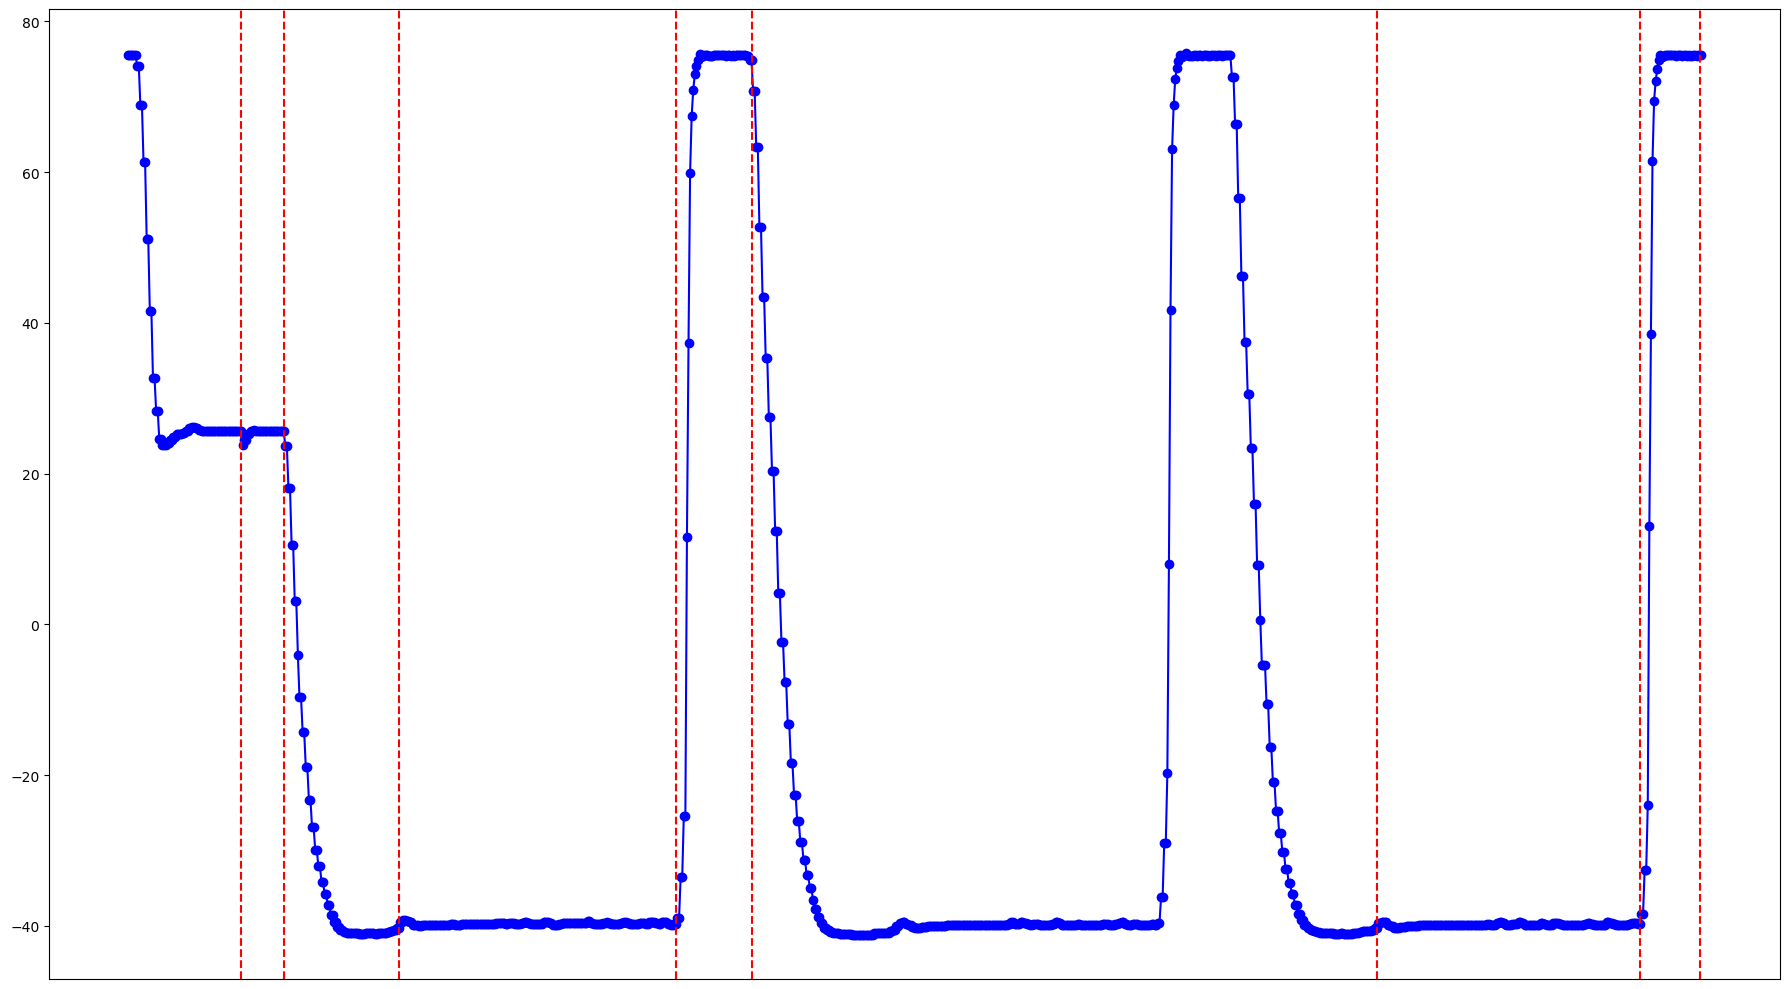

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('sh_curv.xlsx')

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

print()


timestamp_value = []

def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if ((lst[i+1] - lst[i] > -0.6) and (lst[i + 1] - lst[i] < 0.6)):
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                if(start == lst[i]):
                    pass
                else:
                    print(start)
                    result.append((start, lst[i]))
                    print(i,' ',lst[i],' ',filtered_df['Timestamp'].astype(str).iloc[i])
                    timestamp_value.append(filtered_df['Timestamp'].astype(str).iloc[i])
                start = None
    if start is not None:
        print(start)
        result.append((start, lst[-1]))
        print(i,' ',lst[i],' ',filtered_df['Timestamp'].astype(str).iloc[i])
        timestamp_value.append(filtered_df['Timestamp'].astype(str).iloc[i])

    return result

temp = filtered_df['Temp'].tolist()

pairs = create_tuple_pairs(temp)
print("Normal order in graph:\n", pairs)
print()

# Extract the first and second elements (timestamps and temperature values) from each tuple and create separate lists
demo = [t[1] for t in pairs]
print(demo)
print()

# for value in demo:
#     # Filter rows for the current temperature value
#     temp_rows = filtered_df[filtered_df['Temp'] == value].copy()  # Make a copy of the filtered DataFrame
#     # Convert the Timestamp column to a categorical variable using codes
#     temp_rows['Update'] = temp_rows['Timestamp'].astype('category').cat.codes
#     # Find the row with the maximum timestamp using the categorical code
#     max_timestamp_row = temp_rows.loc[temp_rows['Update'].idxmax()]
#     timestamp_value.append(max_timestamp_row['Timestamp'])

# print("Timestamp values:\n", timestamp_value)

# Extract the Timestamp and Temp columns as strings
df_timestamps = filtered_df['Timestamp'].astype(str)
df_temperatures = filtered_df['Temp']

plt.figure(figsize=(18, 10))
plt.plot(df_timestamps, df_temperatures, marker='o', linestyle='-', color='blue', label='demo')  # Original data in blue
for ts in timestamp_value:
    plt.axvline(x=ts, color='r', linestyle='--')

plt.xticks([])

plt.tight_layout()

# Show the plot
plt.show()




94   69.14   220318.170555.080
251   69.04   220313.120822.003
357   69.14   220309.111005.158
449   64.65   220309.122013.655
463   61.62   220309.122717.731
475   58.89   220309.123321.230
486   56.25   220309.123854.566
508   29.98   220309.134100.136
516   29.59   220309.134502.423
520   68.46   220317.162235.106
622   64.36   220318.180419.385
636   61.23   220318.181123.413
649   57.91   220318.181757.165
657   55.66   220318.182159.375
673   31.05   220318.192111.669
794   28.03   220318.202216.675
858   63.18   220318.214511.095
863   68.95   220311.111227.654
954   64.75   220311.122001.612
967   61.52   220311.122635.289
981   58.2   220311.123339.390
1000   53.71   220311.124315.031
1030   29.59   220311.134539.552
1134   68.36   220311.110016.669
1241   28.12   220309.143904.293
1276   56.54   220309.154726.790
1388   69.14   220309.172025.545
1390   68.07   220309.172845.885
1455   61.82   220317.180913.645
1467   59.08   220317.181517.125
1489   54.39   220317.182623.596

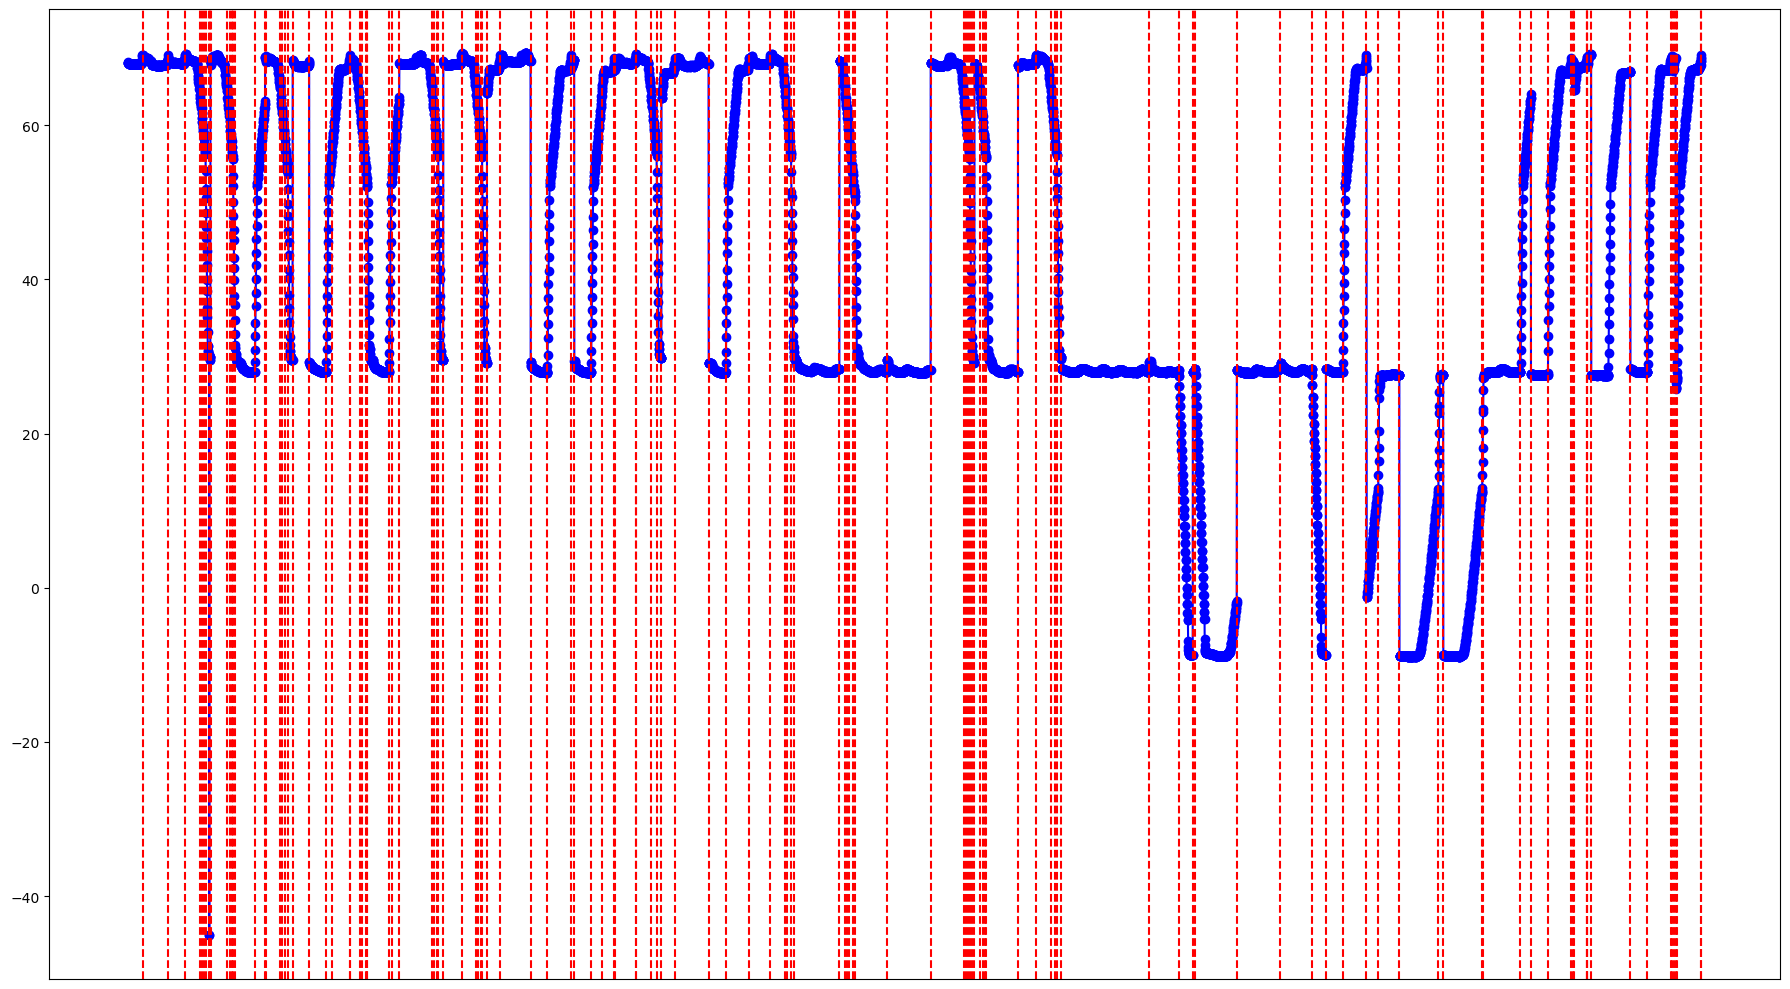

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('hhc.xlsx')

# Get the first unique value from the 'Legend' column
first_legend_value = df['Legend'].iloc[0]

# Filter the DataFrame based on the first unique 'Legend' value
filtered_df = df[df['Legend'] == first_legend_value]

print()


timestamp_value = []
def create_tuple_pairs(lst):
    result = []
    start = None
    threshold = 0.6  # Adjust this threshold value as needed
    for i in range(len(lst) - 1):
        diff = abs(lst[i + 1] - lst[i])
        if diff <= threshold:
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                if start == lst[i]:
                    pass
                else:
                    result.append((start, lst[i]))
                    print(i, ' ', lst[i], ' ', filtered_df['Timestamp'].astype(str).iloc[i])
                    timestamp_value.append(filtered_df['Timestamp'].astype(str).iloc[i])
                start = None
    if start is not None:
        result.append((start, lst[-1]))
        print(i, ' ', lst[i], ' ', filtered_df['Timestamp'].astype(str).iloc[i])
        timestamp_value.append(filtered_df['Timestamp'].astype(str).iloc[i])

    return result




temp = filtered_df['Temp'].tolist()

pairs = create_tuple_pairs(temp)
print("Normal order in graph:\n", pairs)
print()

# Extract the first and second elements (timestamps and temperature values) from each tuple and create separate lists
demo = [t[1] for t in pairs]
print(demo)
print()

# for value in demo:
#     # Filter rows for the current temperature value
#     temp_rows = filtered_df[filtered_df['Temp'] == value].copy()  # Make a copy of the filtered DataFrame
#     # Convert the Timestamp column to a categorical variable using codes
#     temp_rows['Update'] = temp_rows['Timestamp'].astype('category').cat.codes
#     # Find the row with the maximum timestamp using the categorical code
#     max_timestamp_row = temp_rows.loc[temp_rows['Update'].idxmax()]
#     timestamp_value.append(max_timestamp_row['Timestamp'])

# print("Timestamp values:\n", timestamp_value)

# Extract the Timestamp and Temp columns as strings
df_timestamps = filtered_df['Timestamp'].astype(str)
df_temperatures = filtered_df['Temp']

plt.figure(figsize=(18, 10))
plt.plot(df_timestamps, df_temperatures, marker='o', linestyle='-', color='blue', label='demo')  # Original data in blue
for ts in timestamp_value:
    plt.axvline(x=ts, color='r', linestyle='--')

plt.xticks([])

plt.tight_layout()

# Show the plot
plt.show()



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ruptures as rpt
import time

start = time.time()

data_df = pd.read_excel('A2B.xlsx')

first_legend_value = data_df['Legend'].iloc[0]


def change_point_detection_v1(signal,temp_l):
        
        try:
        
            algo_python = rpt.Pelt(model="l2",jump=1,min_size=2).fit(signal)
    
            penalty_value = 50
            my_bkps = algo_python.predict(penalty_value)
    
            temp_list =[]
            for item in my_bkps:
                if item == len(temp_l):
                   temp_list.append(round(temp_l[item-1],0))
                else:
                    temp_list.append(round(temp_l[item],0))
            
            change_point_list = sorted(set(temp_list))
            max_limit = max(temp_l)
            last_value = change_point_list[-1]
            
            if abs(max_limit-last_value) >= 2:
                change_point_list.append(max_limit)
            else:
                change_point_list.pop()
                change_point_list.append(max_limit)
            
            
            return change_point_list
        
        except Exception as e:
             print(e)
             func = inspect.currentframe().f_code.co_name
             errorobj.log_error(func, e, "")
             return (" ")
			 

a2b_df = data_df[data_df['Legend']==first_legend_value]
temp_l = a2b_df['Temp'].to_list()
#temp_list = self.change_point_detection(temp_l)    
#print("temp_list",temp_list)
graph_signal = np.array(sorted(a2b_df['Temp'].to_list()))
# graph_signal = np.sort(graph_signal)
temp_list = change_point_detection_v1(graph_signal,temp_l)

print(temp_list)
end = time.time()

print(end-start)

[35.0, 44.0, 50.0, 53.0, 56.0, 59.0, 62.0, 65.0, 68.0, 71.0, 74.0, 77.0, 79.0, 82.0, 85.0, 87.21]
4.10938835144043


[(75.49, 23.83), (24.51, -40.23), (-39.55, -39.75), (-38.96, -33.59), (-25.39, 11.62), (75.68, -39.65), (-36.23, -29.0), (75.49, -40.33), (-39.65, -39.75), (-38.48, -32.62), (74.9, 75.49)]
[-39.65, -32.62, -29.0, 11.62, 23.83, 75.78]

Running Time:
 0.09139728546142578


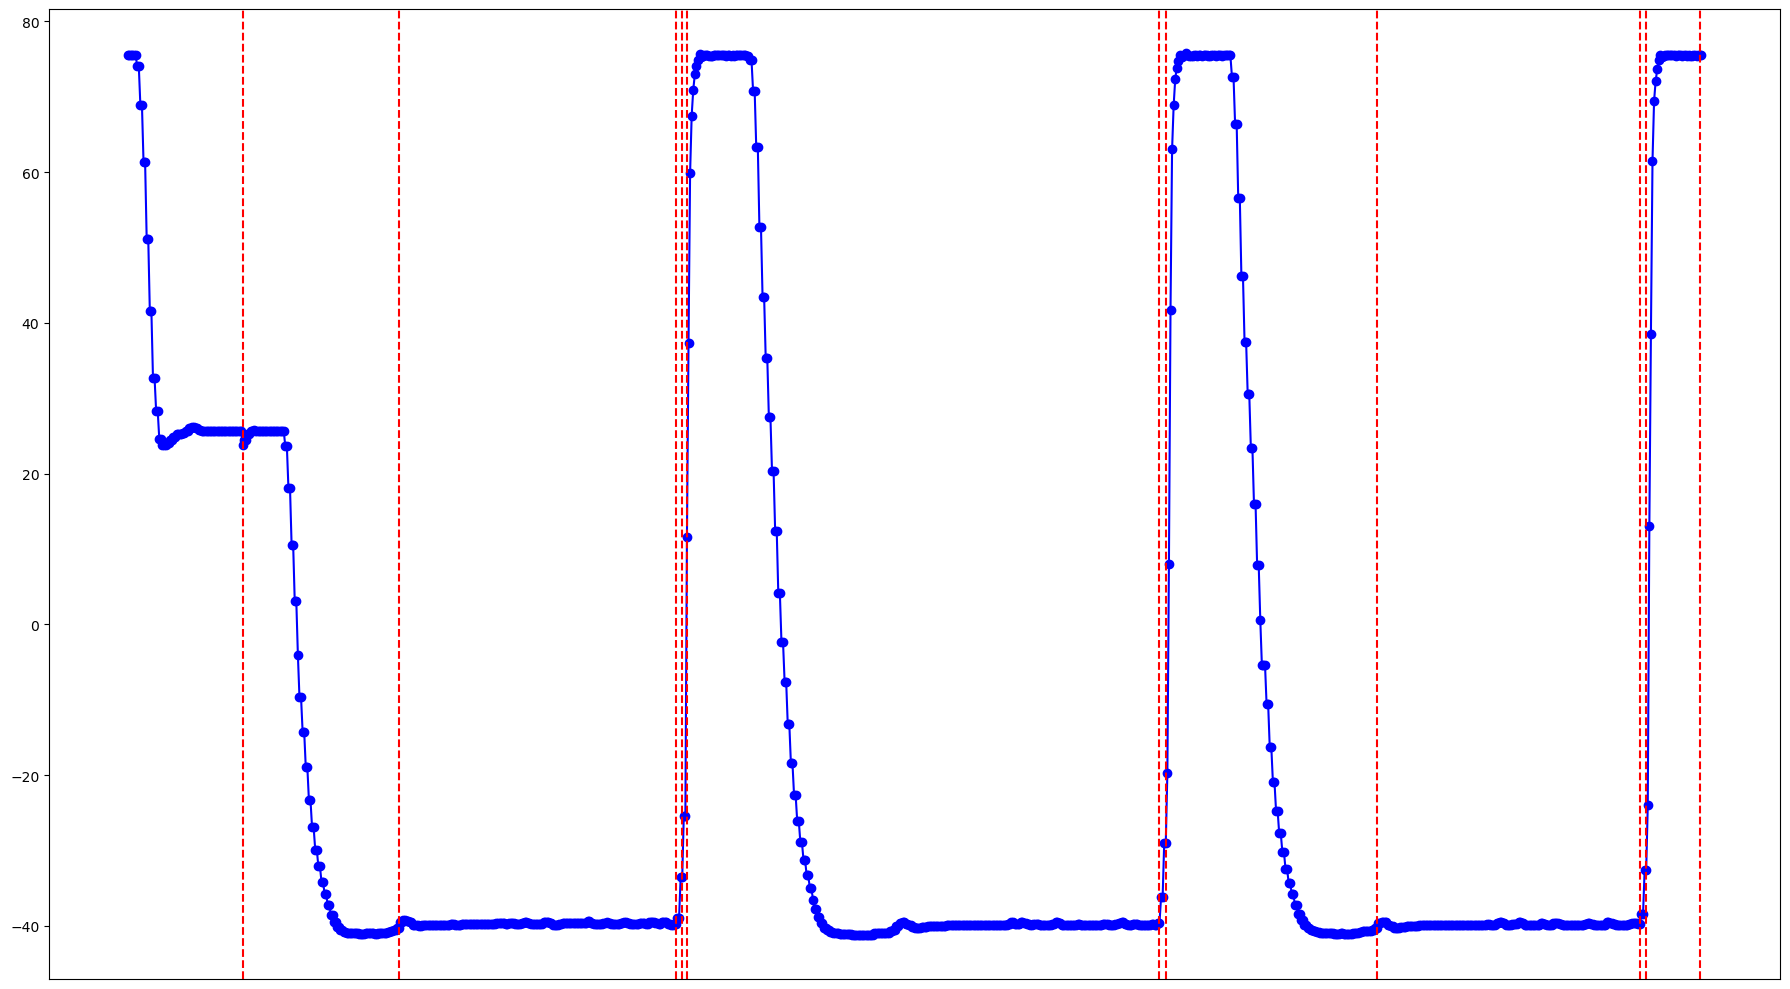

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import time

start = time.time()
df = pd.read_excel('sh_curv.xlsx')
first_legend_value = df['Legend'].iloc[0]
filtered_df = df[df['Legend'] == first_legend_value]


# Initialize variables
first_recurring_values = []

# Iterate over the filtered temp column values
for value in filtered_df['Temp']:
    # Check if the value is not the same as the previous value
    if len(first_recurring_values) == 0 or value != first_recurring_values[-1]:
        first_recurring_values.append(value)

timestamp_value = []

def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if (lst[i + 1] - lst[i] < 0.6) or (lst[i + 1] - lst[i] <= 0 and lst[i + 1] - lst[i] > -0.6):
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                if start == lst[i]:
                    pass
                else:
                    result.append((start, lst[i]))
                    timestamp_value.append(filtered_df['Timestamp'].astype(str).iloc[i])
                    start = None
    if start is not None:
        result.append((start, lst[-1]))
        timestamp_value.append(filtered_df['Timestamp'].astype(str).iloc[i])

    return result


temp = filtered_df['Temp'].tolist()
max1 = max(temp)

pairs = create_tuple_pairs(temp)
print(pairs)
demo = [t[1] for t in pairs]

if(max1 not in demo):
    demo.append(max1)

rounded_list = [round(value, 0) for value in demo]

unique = list(set(rounded_list))
unique.sort()

i = 0
j = 0
result = []

while j < len(unique) - 1:
    if abs(unique[j + 1] - unique[j]) == 1:
        j += 1
    else:
        i = j
        result.append(unique[i])
        j += 1

result.append(unique[-1]) 

new_list = []

for rounded_value in set(result):
    closest_value = None
    max_value = None
    
    for index, value in enumerate(demo):
        if rounded_value == round(value):
            if closest_value is None or abs(value - rounded_value) < abs(closest_value - rounded_value):
                closest_value = value
        
        if rounded_value == round(value) and (max_value is None or value > max_value):
            max_value = value
    
    if max_value is not None:
        new_list.append(max_value)

new_list.sort()
if(max1 not in new_list):
    new_list.append(max1)
print(new_list)


end = time.time()
print("\nRunning Time:\n",end-start)

df_timestamps = filtered_df['Timestamp'].astype(str)
df_temperatures = filtered_df['Temp']

plt.figure(figsize=(18, 10))
plt.plot(df_timestamps, df_temperatures, marker='o', linestyle='-', color='blue', label='demo')  # Original data in blue
for ts in timestamp_value:
    plt.axvline(x=ts, color='r', linestyle='--')

plt.xticks([])
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ruptures as rpt
import time

start = time.time()

data_df = pd.read_excel('ptc.xlsx')

first_legend_value = df['Legend'].iloc[0]


def change_point_detection_v1(signal,temp_l):
        
        try:
        
            algo_python = rpt.Pelt(model="l2",jump=1,min_size=2).fit(signal)
    
            penalty_value = 50
            my_bkps = algo_python.predict(penalty_value)
    
            temp_list =[]
            for item in my_bkps:
                if item == len(temp_l):
                   temp_list.append(round(temp_l[item-1],0))
                else:
                    temp_list.append(round(temp_l[item],0))
            
            change_point_list = sorted(set(temp_list))
            max_limit = max(temp_l)
            last_value = change_point_list[-1]
            
            if abs(max_limit-last_value) >= 2:
                change_point_list.append(max_limit)
            else:
                change_point_list.pop()
                change_point_list.append(max_limit)
            
            
            return change_point_list
        
        except Exception as e:
             print(e)
             func = inspect.currentframe().f_code.co_name
             errorobj.log_error(func, e, "")
             return (" ")
			 

a2b_df = data_df[data_df['Legend']==first_legend_value]
temp_l = a2b_df['Temp'].to_list()
#temp_list = self.change_point_detection(temp_l)    
#print("temp_list",temp_list)
graph_signal = np.array(sorted(a2b_df['Temp'].to_list()))

temp_list = change_point_detection_v1(graph_signal,temp_l)

print(temp_list)
end = time.time()

print(end-start)

[-40.0, -39.0, -38.0, -37.0, -36.0, -35.0, -34.0, -29.0, -28.0, -25.0, -22.0, -13.0, -9.0, -7.0, -1.0, 1.0, 2.0, 3.0, 4.0, 10.0, 15.0, 17.0, 30.0, 33.0, 34.0, 35.0, 41.0, 51.0, 57.0, 58.0, 61.0, 67.0, 69.0, 70.0, 72.0, 74.32]
451.2395918369293


[24.61]

Running Time:
 0.2850356101989746


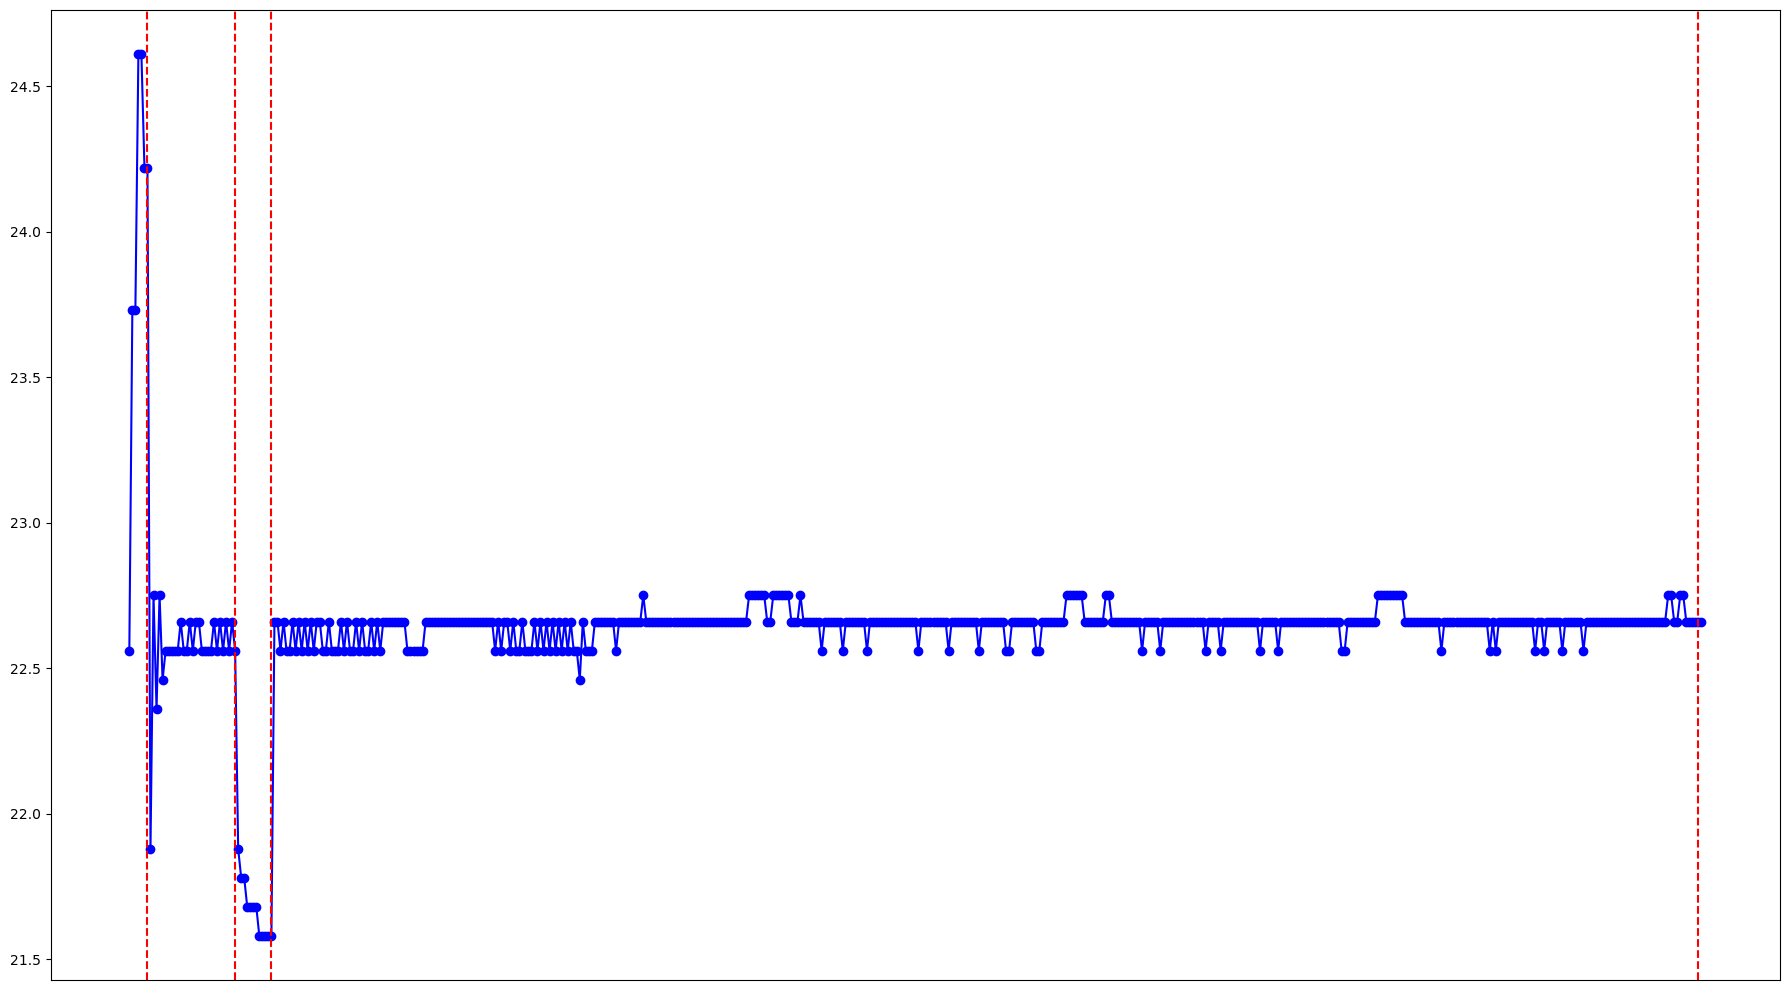

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import time

start = time.time()
df = pd.read_excel('htd.xlsx')
first_legend_value = df['Legend'].iloc[0]
filtered_df = df[df['Legend'] == first_legend_value]

timestamp_value=[]
def create_tuple_pairs(lst):
    result = []
    start = None
    for i in range(len(lst) - 1):
        if (lst[i+1] - lst[i] > -0.6 and lst[i + 1] - lst[i] < 0.6 ):
            if start is None:
                start = lst[i]
        else:
            if start is not None:
                if(start == lst[i]):
                    pass
                else:
                    result.append((start, lst[i]))
                    #print(i,' ',lst[i],' ',filtered_df['Timestamp'].astype(str).iloc[i])
                    timestamp_value.append(filtered_df['Timestamp'].astype(str).iloc[i])
                start = None
    if start is not None:
        result.append((start, lst[-1]))
        #print(i,' ',lst[i],' ',filtered_df['Timestamp'].astype(str).iloc[i])
        timestamp_value.append(filtered_df['Timestamp'].astype(str).iloc[i])

    return result

temp = filtered_df['Temp'].tolist()
max1 = max(temp)

pairs = create_tuple_pairs(temp)

demo = [t[1] for t in pairs]

if(max1 not in demo):
    demo.append(max1)

rounded_list = [round(value, 0) for value in demo]

unique = list(set(rounded_list))
unique.sort()

i = 0
j = 0
result = []

while j < len(unique) - 1:
    if abs(unique[j + 1] - unique[j]) == 1:
        j += 1
    else:
        i = j
        result.append(unique[i])
        j += 1

result.append(unique[-1]) 

new_list = []

for rounded_value in set(result):
    closest_value = None
    max_value = None
    
    for index, value in enumerate(demo):
        if rounded_value == round(value):
            if closest_value is None or abs(value - rounded_value) < abs(closest_value - rounded_value):
                closest_value = value
        
        if rounded_value == round(value) and (max_value is None or value > max_value):
            max_value = value
    
    if max_value is not None:
        new_list.append(max_value)

new_list.sort()
if(max1 not in new_list):
    new_list.append(max1)
print(new_list)

end = time.time()
print("\nRunning Time:\n",end-start)

df_timestamps = filtered_df['Timestamp'].astype(str)
df_temperatures = filtered_df['Temp']

plt.figure(figsize=(18, 10))
plt.plot(df_timestamps, df_temperatures, marker='o', linestyle='-', color='blue', label='demo')  # Original data in blue
for ts in timestamp_value:
    plt.axvline(x=ts, color='r', linestyle='--')

plt.xticks([])

plt.tight_layout()

# Show the plot
plt.show()



In [16]:
result = [-9.0, -2.0, 13.0, 23.0, 31.0, 50.0, 54.0, 65.0, 69.0]
demo_values = [-8.69, -8.69, -1.66, 12.79, 12.89, 12.89, 22.75, 27.54, 27.64, 27.83, 27.93, 27.93, 27.93, 27.93, 28.03, 28.03, 28.03, 28.03, 28.03, 28.12, 28.12,
               28.22, 28.22, 28.32, 28.32, 28.42, 29.2, 29.2, 29.49, 29.59, 29.69, 29.79, 29.98, 31.05, 31.25, 31.35, 50.2, 51.95, 52.64, 53.12, 53.52, 53.71, 54.39, 55.57, 55.66, 55.76, 55.86, 55.86, 55.96, 55.96, 56.15, 56.25, 56.54, 57.71, 57.91, 57.91, 58.11, 58.2, 58.2, 58.4, 58.5, 58.89, 59.08, 60.45, 61.13, 61.23, 61.43, 61.52, 61.62, 61.62, 61.62, 61.82, 61.91, 63.18, 63.67, 63.77, 64.06, 64.26, 64.26, 64.36, 64.36, 64.45, 64.55, 64.55, 64.65, 64.65, 64.75, 64.75, 66.99, 67.58, 67.77, 67.87, 68.07, 68.26, 68.36, 68.36, 68.36, 68.46, 68.46, 68.46, 68.55, 68.65, 68.65, 68.75, 68.75, 68.85, 68.95, 69.04, 69.04, 69.04, 69.04, 69.14, 69.14, 69.14, 69.14, 69.14, 69.24, 69.34]

new_list = []
demo_iter = iter(demo_values)
current_max = next(demo_iter)

for res in result:
    closest_max = None
    while current_max < res:
        closest_max = current_max
        current_max = next(demo_iter, None)
    if closest_max is None or (current_max is not None and (current_max - res) < (res - closest_max)):
        new_list.append(current_max)
    else:
        new_list.append(closest_max)

print(new_list)


[-8.69, -1.66, 12.89, 22.75, 31.05, 50.2, 53.71, 64.75, 69.04]
